<a href="https://colab.research.google.com/github/ffviana/NUTRECON/blob/main/NUTRECON/FractalPairing_Pilot/Data%20Analysis/Colab%20Notebooks/General_FlavorFractal_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import warnings
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install scikit-posthocs
import scikit_posthocs as sp
from matplotlib.patches import Rectangle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
DBfolder_path = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/2. Databases/'
figureFolder_path = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/3. Analyses/General Analyses Figures/'

# Flavour Ratings Exploratory analysis

## Data Processing

In [62]:
base_folder = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/'

subjectFigures_folder = base_folder + '3. Analyses/Subject_by_Subject_plots'
registery_fname = base_folder + '2. Databases/subjectFiles_registration.json'
sequenceFolder = base_folder + '1. DataAcquisition/ExperimentsRoom/SitmulusPresentationSequence'
AssTestFolder = base_folder + '1. DataAcquisition/ExperimentsRoom/AssociationTask_ExperimentsRoom'


with open(registery_fname) as json_file:
    registery = json.load(json_file)

subjectFile_Identification = pd.DataFrame.from_records(registery).T
sequenceFiles = subjectFile_Identification['sequence'].tolist()
subjectFile_Identification

sequence                     association_1  \
ercffa_001  ercffa_001_16-05-2022_08-49.npy  ercffa_001_16-05-2022_08-44.json   
ercffa_002  ercffa_002_19-05-2022_08-58.npy  ercffa_002_19-05-2022_08-50.json   
ercffa_004  ercffa_004_23-05-2022_08-32.npy  ercffa_004_23-05-2022_08-50.json   
ercffa_005  ercffa_005_24-05-2022_08-04.npy  ercffa_005_24-05-2022_08-12.json   
ercffa_007  ercffa_007_30-05-2022_08-47.npy  ercffa_007_30-05-2022_09-03.json   
ercffa_008  ercffa_008_02-06-2022_08-39.npy  ercffa_008_02-06-2022_10-27.json   
ercffa_009  ercffa_009_06-06-2022_08-30.npy  ercffa_009_06-06-2022_08-22.json   
ercffa_010  ercffa_010_07-06-2022_09-42.npy  ercffa_010_07-06-2022_09-42.json   
ercffa_012  ercffa_012_09-06-2022_06-40.npy  ercffa_012_09-06-2022_07-41.json   
ercffa_013  ercffa_013_23-06-2022_07-15.npy  ercffa_013_23-06-2022_08-13.json   
ercffa_014  ercffa_014_27-06-2022_08-12.npy  ercffa_014_27-06-2022_08-59.json   
ercffa_015  ercffa_015_28-06-2022_10-04.npy  ercffa_015_28-06-2022_11-19.json   
ercffa_016  ercffa_016_29-06-2022_09-14.npy  ercffa_016_29-06-2022_10-23.json   
ercffa_017  ercffa_017_30-06-2022_09-10.npy  ercffa_017_30-06-2022_09-23.json   
ercffa_018  ercffa_018_04-07-2022_08-35.npy  ercffa_018_04-07-2022_09-50.json   
ercffa_019  ercffa_019_05-07-2022_09-47.npy  ercffa_019_05-07-2022_11-47.json   
ercffa_020  ercffa_020_06-07-2022_08-43.npy  ercffa_020_06-07-2022_09-46.json   
ercffa_021  ercffa_021_11-07-2022_08-18.npy  ercffa_021_11-07-2022_09-17.json   
ercffa_022  ercffa_022_12-07-2022_09-41.npy  ercffa_022_12-07-2022_11-37.json   
ercffa_023  ercffa_023_26-07-2022_09-20.npy  ercffa_023_26-07-2022_11-37.json   
ercffa_024  ercffa_024_27-07-2022_08-30.npy  ercffa_024_27-07-2022_10-06.json   
ercffa_025  ercffa_025_28-07-2022_09-15.npy  ercffa_025_02-08-2022_09-23.json   
ercffa_026  ercffa_026_03-08-2022_16-38.npy  ercffa_026_04-08-2022_11-13.json   
ercffa_027  ercffa_027_04-08-2022_11-15.npy  ercffa_027_04-08-2022_12-42.json   
ercffa_028  ercffa_028_05-08-2022_08-12.npy  ercffa_028_05-08-2022_09-36.json   
ercffa_029  ercffa_029_08-08-2022_10-05.npy  ercffa_029_08-08-2022_12-21.json   
ercffa_030  ercffa_030_09-08-2022_08-59.npy  ercffa_030_09-08-2022_12-00.json   
ercffa_031  ercffa_031_11-08-2022_08-15.npy  ercffa_031_11-08-2022_10-18.json   
ercffa_032  ercffa_032_16-08-2022_08-10.npy  ercffa_032_16-08-2022_10-45.json   
ercffa_033  ercffa_033_17-08-2022_08-28.npy  ercffa_033_18-08-2022_11-14.json   

                               association_2                     association_3  
ercffa_001  ercffa_001_16-05-2022_10-59.json                               NaN  
ercffa_002  ercffa_002_19-05-2022_10-50.json                               NaN  
ercffa_004  ercffa_004_23-05-2022_10-33.json  ercffa_004_24-05-2022_07-41.json  
ercffa_005  ercffa_005_24-05-2022_10-25.json  ercffa_005_25-05-2022_17-32.json  
ercffa_007  ercffa_007_30-05-2022_11-17.json  ercffa_007_31-05-2022_07-37.json  
ercffa_008  ercffa_008_02-06-2022_09-49.json                               NaN  
ercffa_009  ercffa_009_06-06-2022_09-57.json                               NaN  
ercffa_010  ercffa_010_07-06-2022_11-25.json                               NaN  
ercffa_012  ercffa_012_09-06-2022_08-40.json                               NaN  
ercffa_013  ercffa_013_23-06-2022_09-52.json  ercffa_013_24-06-2022_08-24.json  
ercffa_014  ercffa_014_27-06-2022_10-51.json  ercffa_014_28-06-2022_10-14.json  
ercffa_015  ercffa_015_28-06-2022_12-54.json  ercffa_015_29-06-2022_09-43.json  
ercffa_016  ercffa_016_29-06-2022_12-00.json  ercffa_016_30-06-2022_10-09.json  
ercffa_017  ercffa_017_30-06-2022_10-23.json                               NaN  
ercffa_018  ercffa_018_04-07-2022_11-42.json  ercffa_018_05-07-2022_15-29.json  
ercffa_019  ercffa_019_05-07-2022_12-42.json  ercffa_019_06-07-2022_12-07.json  
ercffa_020  ercffa_020_06-07-2022_11-15.json  ercffa_020_07-07-2022_10-43.json  
ercffa_021  ercffa_021_11-07-2022_11-13.json                     

In [63]:
flavorRating_path = DBfolder_path + 'FlavorRatings.xlsx'

flavorRating_df_ = pd.read_excel(flavorRating_path,header = [0, 1], index_col = 0)
flavorRating_df_.dropna(how = 'all', inplace = True)
flavorRating_df_.tail()

Apple Cider             Black Currant             Cashew        \
subject_id           N     I     P             N     I     P      N     I   
ercffa_029         6.0  21.0   7.0          12.0  22.0  -9.0   70.0  41.0   
ercffa_030        24.0  14.0   4.0          85.0  45.0  -3.0   91.0  32.0   
ercffa_031        12.0  29.0 -25.0          20.0  37.0 -24.0   19.0  25.0   
ercffa_032         0.0  11.0  44.0         100.0  31.0  -6.0    0.0  23.0   
ercffa_033        75.0  25.0  25.0          90.0  19.0  12.0   90.0  26.0   

                 Lychee             Pomegranate             Tamarind        \
subject_id     P      N     I     P           N     I     P        N     I   
ercffa_029 -31.0    7.0  20.0  22.0        22.0   6.0  -3.0     20.0  17.0   
ercffa_030  -5.0    4.0  33.0  46.0        15.0  19.0   9.0     54.0  38.0   
ercffa_031  11.0   54.0  50.0 -51.0        66.0  44.0 -24.0      3.0   7.0   
ercffa_032  -1.0    0.0  17.0  49.0         0.0  35.0   0.0      9.0  17.0   
ercffa_033  -6.0    0.0  15.0  18.0        41.0  12.0  12.0     43.0  14.0   

                  
subject_id     P  
ercffa_029  12.0  
ercffa_030   9.0  
ercffa_031  23.0  
ercffa_032   6.0  
ercffa_033   9.0

In [64]:
flavorRating_dfLong = pd.melt(flavorRating_df_.reset_index(), id_vars='index' )
flavorRating_dfLong.columns = ['subject_id', 'flavor', 'scale', 'score']

flavorRating_dfLong['scale'] = flavorRating_dfLong['scale'].replace({'N':'Novelty', 'P':'Pleasantness', 'I':'Intensity'})
flavorRating_dfLong.head()

subject_id       flavor    scale  score
0  ercffa_001  Apple Cider  Novelty   19.0
1  ercffa_002  Apple Cider  Novelty    2.0
2  ercffa_003  Apple Cider  Novelty    0.0
3  ercffa_004  Apple Cider  Novelty   11.0
4  ercffa_005  Apple Cider  Novelty   81.0

In [65]:
for fname in sequenceFiles:
  subject_id = fname[:10]
  data = np.load('{}/{}'.format(sequenceFolder, fname), 
                        allow_pickle=True).item()
  learning_df_ = data['Learning Order']
  learning_df_['subject_id'] = subject_id
  learning_df_['experiment_id'] = data['Experiment ID']
  learning_df_.reset_index(inplace = True)
  learning_df_.drop(columns=['Flavor_code'], inplace = True)
  if fname == sequenceFiles[0]:
    learning_df = learning_df_
  else:
    learning_df = pd.concat([learning_df,learning_df_], axis = 0)
learning_df.tail()

Order Fractal         Flavor  subject_id          experiment_id
1      2      II       Tamarind  ercffa_033  FlavorFractal_pilot02
2      3     III  Black Currant  ercffa_033  FlavorFractal_pilot02
3      4       V         Lychee  ercffa_033  FlavorFractal_pilot02
4      5      VI    Apple Cider  ercffa_033  FlavorFractal_pilot02
5      6      IV         Cashew  ercffa_033  FlavorFractal_pilot02

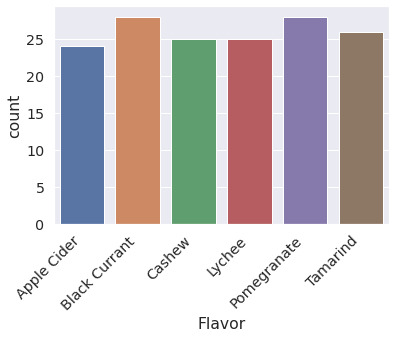

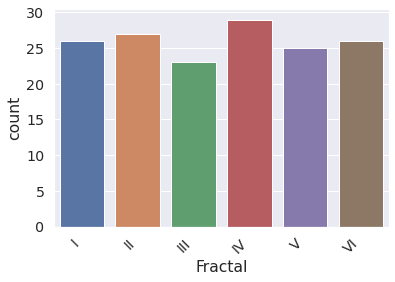

In [66]:
flavorRating_df = flavorRating_dfLong.pivot(index=['subject_id', 'flavor'], columns = ['scale'], values = ['score'])
flavorRating_df = flavorRating_df.droplevel(0, axis = 1)
flavorRating_df.reset_index(inplace=True)

selected_FlavorRatings_df = flavorRating_df.merge(learning_df, left_on=['subject_id', 'flavor'], right_on = ['subject_id', 'Flavor'])
selected_FlavorRatings_df = selected_FlavorRatings_df[['experiment_id', 'subject_id', 'Fractal', 'Flavor','Intensity', 'Novelty', 'Pleasantness']]
selected_FlavorRatings_df.to_excel('{}/selected_FlavorRatings.xlsx'.format(DBfolder_path), index = False)

def plot_FlavorFractalCount(df, cols = ['Flavor', 'Fractal']):
  df_flavor = df = df[df[cols[0]].notna()]
  g = sns.countplot(x=cols[0], data=df_flavor,
            order = sorted(df_flavor[cols[0]].unique().tolist()))
  g.set_xticklabels(g.get_xticklabels() ,rotation=45, ha= 'right');

  plt.figure()
  df_fractal = df = df[df[cols[1]].notna()]
  g = sns.countplot(x="Fractal", data=df_fractal,
                    order = ['I', 'II', 'III', 'IV', 'V', 'VI'])
  g.set_xticklabels(g.get_xticklabels() ,rotation=45, ha= 'right');

plot_FlavorFractalCount(selected_FlavorRatings_df)

In [67]:
for fname in sequenceFiles:
  subject_id = fname[:10]
  sequence_dic = np.load('{}/{}'.format(sequenceFolder, fname), 
                        allow_pickle=True).item()
  assoc1_correct_ = sequence_dic['Association Test 1']
  assoc1_correct_['subject_id'] = subject_id
  assoc2_correct_ = sequence_dic['Association Test 2']
  assoc2_correct_['subject_id'] = subject_id
  assoc3_correct_ = sequence_dic['Association Test 3']
  assoc3_correct_['subject_id'] = subject_id
  cols = [ 'subject_id', 'fractal']

  if fname == sequenceFiles[0]:
    assoc1_correct = assoc1_correct_[cols]
    assoc2_correct = assoc2_correct_[cols]
    assoc3_correct = assoc3_correct_[cols]
  else:
    assoc1_correct = pd.concat([assoc1_correct,assoc1_correct_[cols]], axis = 0)
    assoc2_correct = pd.concat([assoc2_correct,assoc2_correct_[cols]], axis = 0)
    assoc3_correct = pd.concat([assoc3_correct,assoc3_correct_[cols]], axis = 0)

assoc1_correct['Association test'] = 'Test 1'
assoc2_correct['Association test'] = 'Test 2'
assoc3_correct['Association test'] = 'Test 3'

assoc_correct = pd.concat([assoc1_correct, assoc2_correct, assoc3_correct], 
                          axis = 0)
assoc_correct.reset_index(inplace = True)

assoc1Files = subjectFile_Identification['association_1'].dropna().tolist()
assoc2Files = subjectFile_Identification['association_2'].dropna().tolist()
assoc3Files = subjectFile_Identification['association_3'].dropna().tolist()

for fname in assoc1Files:
  subject_id = fname[:10]

  AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, fname))
  AssTest_df['subject_id'] = subject_id
  cols = ['Trial','subject_id', 'Fractal ID']
  assoc1_ans_ = AssTest_df[cols]

  if fname == assoc1Files[0]:
    assoc1_ans = assoc1_ans_
  else:
    assoc1_ans = pd.concat([assoc1_ans, assoc1_ans_], axis = 0)

for fname in assoc2Files:
  subject_id = fname[:10]

  AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, fname))
  AssTest_df['subject_id'] = subject_id
  cols = ['Trial','subject_id', 'Fractal ID']
  assoc2_ans_ = AssTest_df[cols]

  if fname == assoc2Files[0]:
    assoc2_ans = assoc2_ans_
  else:
    assoc2_ans = pd.concat([assoc2_ans, assoc2_ans_], axis = 0)


for fname in assoc3Files:
  subject_id = fname[:10]

  AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, fname))
  AssTest_df['subject_id'] = subject_id
  cols = ['Trial','subject_id', 'Fractal ID']
  assoc3_ans_ = AssTest_df[cols]

  if fname == assoc3Files[0]:
    assoc3_ans = assoc3_ans_
  else:
    assoc3_ans = pd.concat([assoc3_ans, assoc3_ans_], axis = 0)

assoc1_ans['Association test'] = 'Test 1'
assoc2_ans['Association test'] = 'Test 2'
assoc3_ans['Association test'] = 'Test 3'

assoc_ans = pd.concat([assoc1_ans, assoc2_ans, assoc3_ans], axis = 0)
assoc_ans['Trial'] = assoc_ans['Trial'] + 1

assocTest = assoc_ans.merge(assoc_correct, left_on=['Trial', 'subject_id', 'Association test'], right_on=['Order','subject_id', 'Association test']).drop(columns=['Trial', 'Order'])
assocTest.columns = ['subject_id', 'Response' ,'Association test', 'Answer']


fractalDecoder = {0: 'Fractal I',
                  1: 'Fractal II',
                  2: 'Fractal III',
                  3: 'Fractal IV',
                  4: 'Fractal V',
                  5: 'Fractal VI'
                  }

def get_specifity(matrix):
  specificity = []
  for c in range(len(matrix)):
    FP = sum(matrix[:,c]) - matrix[c,c]

    tmp = np.delete(matrix, c, 0) 
    TN = sum(np.delete(tmp, c, 1).flatten())

    specificity.append( TN / (TN + FP) )
  return specificity

print('Subject and Association Tests in which (TP + FN) or (TP + FN) equal 0:')
image_labels = ['I', 'II', 'III', 'IV', 'V', 'VI']
acc_df_columnsNames = ['Fractal', 'correct_responses', 'sensitivity', 'specificity', 'precision', 'f1-score', 'accuracy', 'subject_id', 'Association test',]
warnings.filterwarnings("error")
acc_df = pd.DataFrame(columns = acc_df_columnsNames)

for subject_id in assocTest['subject_id'].unique():
  df_ = assocTest[assocTest['subject_id'] == subject_id]
  for assTest in df_['Association test'].unique():
    df = df_[df_['Association test'] == assTest]
    response = df['Response'].tolist()
    answers = df['Answer'].tolist()
    matrix = confusion_matrix(answers, response, labels = np.arange(6))
#    accuracyPerLabel = matrix.diagonal()
#    accuracyPerLabel = accuracyPerLabel[np.unique(answers)]
    accuracyPerLabel = [matrix.diagonal()[p] if p in np.unique(answers) else np.nan for p in range(6)]
    specificity_ = get_specifity(matrix)
    specificity = [specificity_[p] if p in np.unique(answers) else np.nan for p in range(6)]
    try:
      out_dict = classification_report(answers, response, labels = np.arange(6), output_dict = True, zero_division = 'warn')
    except Exception as e:
      print('  - {}, {} -> {} for at least one of the images.'.format(subject_id, assTest, str(e).split('.')[0].replace('0','NaN')))
      out_dict = classification_report(answers, response, labels = np.arange(6), output_dict = True, zero_division = 0)
    precision_ = [out_dict[key]['precision'] for key in out_dict.keys() if key.isnumeric()]
    precision = [precision_[p] if p in np.unique(answers) else np.nan for p in range(6)]
    sensitivity_ = [out_dict[key]['recall'] for key in out_dict.keys() if key.isnumeric()]
    sensitivity = [sensitivity_[p] if p in np.unique(answers) else np.nan for p in range(6)]
    f1score_ = [out_dict[key]['f1-score'] for key in out_dict.keys() if key.isnumeric()]
    f1score = [f1score_[p] if p in np.unique(answers) else np.nan for p in range(6)]
    
    labels = [image_labels[p] if p in np.unique(answers) else np.nan for p in range(6)]
#    labels = [fractalDecoder[p].split(' ')[-1] for p in np.unique(answers)]
    acc_df_ = pd.DataFrame([labels, accuracyPerLabel, sensitivity, specificity,  precision, f1score]).T
    
#    acc_df_['experiment_id'] = df['experiment_id'].unique()[0]
#    acc_df_['avg sensitivity'] = out_dict['macro avg']['recall']
#    acc_df_['avg specificity'] = np.nanmean(specificity)
#    acc_df_['avg precision'] = out_dict['macro avg']['precision']
#    acc_df_['avg f1-score'] = out_dict['macro avg']['f1-score']
    try:
      acc_df_['accuracy'] = out_dict['accuracy']
    except:
      acc_df_['accuracy'] = accuracy_score(answers, response)
    acc_df_['subject_id'] = subject_id
    acc_df_['Association test'] = assTest
    
    acc_df_.columns = acc_df_columnsNames

    acc_df = pd.concat([acc_df,acc_df_], axis = 0, ignore_index = True)

warnings.filterwarnings("default")

Subject and Association Tests in which (TP + FN) or (TP + FN) equal 0:
  - ercffa_001, Test 1 -> Recall and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_001, Test 2 -> Recall and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_002, Test 1 -> Precision and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_002, Test 2 -> Recall and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_004, Test 1 -> Precision and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_004, Test 2 -> Precision and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_004, Test 3 -> Precision and F-score are ill-defined and being set to NaN for at least one of the images.
  - ercffa_005, Test 1 -> Precision and F-score are ill-defined and being set to NaN for at least one of the images.
  

In [68]:

fractalDecoder = {0: 'Fractal I',
                  1: 'Fractal II',
                  2: 'Fractal III',
                  3: 'Fractal IV',
                  4: 'Fractal V',
                  5: 'Fractal VI'
                  }

fractalCoord_Decoder = {'I' : 0,
                  'II' : 1,
                  'III' : 2,
                  'IV' : 3,
                  'V' : 4,
                  'VI' : 5
                  }
flavorDecoder = {'Apple Cider' : 0,
                  'Black Currant' : 1,
                  'Cashew' : 2,
                  'Lychee' : 3,
                  'Pomegranate' : 4,
                  'Tamarind' : 5,
                  'Plain' : np.nan}

orderDecoder = {1 : 0,
                2 : 1,
                3 : 2,
                4 : 3,
                5 : 4,
                6 : 5}

# function to return key for any value
def get_key(my_dict, val):
  for key, value in my_dict.items():
    if val == value:
        return key
  return "key doesn't exist"

def get_FlavorOrderCoords(sub_df):

  fractalFlavor_code = {}
  for i, row in sub_df[['Flavor', 'Fractal']].drop_duplicates().iterrows():
    fractalFlavor_code[row[1]] = row[0]

  fractalOrder_code = {}
  for i, row in sub_df[['Order', 'Fractal']].drop_duplicates().iterrows():
    fractalOrder_code[row[1]] = row[0]

  sub_df['i_flavor'] = [flavorDecoder[fractalFlavor_code[get_key(fractalCoord_Decoder,p)]] for p in sub_df['i_fractal'].tolist()]
  sub_df['j_flavor'] = [flavorDecoder[fractalFlavor_code[get_key(fractalCoord_Decoder,p)]] for p in sub_df['j_fractal'].tolist()]

  sub_df['i_order'] = [orderDecoder[fractalOrder_code[get_key(fractalCoord_Decoder,p)]] for p in sub_df['i_fractal'].tolist()]
  sub_df['j_order'] = [orderDecoder[fractalOrder_code[get_key(fractalCoord_Decoder,p)]] for p in sub_df['j_fractal'].tolist()]

  #out = pd.DataFrame([i_flavor, j_flavor, i_order, j_order]).T
  #out.columns = ['i_flavor', 'j_flavor', 'i_order', 'j_order']

  return sub_df

confusion_matrix_df = pd.DataFrame(columns = ['i_fractal', 'j_fractal', 'correct responses', 'subject_id', 'Association test', 'Fractal'])
for subject_id in assocTest['subject_id'].unique():
  df_ = assocTest[assocTest['subject_id'] == subject_id]
  for assTest in df_['Association test'].unique():
    df = df_[df_['Association test'] == assTest]
    response = df['Response'].tolist()
    answers = df['Answer'].tolist()
    matrix = confusion_matrix(answers, response, labels = np.arange(6))
    test_list = []
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        test_list.append([i,j,matrix[i,j]])

    confusion_matrix_df_ = pd.DataFrame(test_list, columns = ['i_fractal','j_fractal','correct responses'])

 #   confusion_matrix_Longdf_['flavorFractalOrder'] = 'Fractal'
    confusion_matrix_df_['subject_id'] = subject_id
    confusion_matrix_df_['Association test'] = assTest
    confusion_matrix_df_['Fractal'] = [fractalDecoder[p].split(' ')[-1] for p in confusion_matrix_df_['i_fractal'].tolist()]

    confusion_matrix_df = pd.concat([confusion_matrix_df,confusion_matrix_df_], axis = 0)

confusion_matrix_df = confusion_matrix_df.merge(learning_df, left_on = ['subject_id', 'Fractal'], right_on = ['subject_id', 'Fractal'])
confusion_matrix_df = confusion_matrix_df.groupby('subject_id').apply(get_FlavorOrderCoords)
confusion_matrix_df = confusion_matrix_df[['experiment_id', 'subject_id', 'Association test', 'Flavor', 'Fractal', 'Order', 'i_fractal', 'j_fractal', 'i_flavor', 'j_flavor', 'i_order', 'j_order', 'correct responses']]
confusion_matrix_df.sort_values(by=['experiment_id', 'subject_id', 'Association test', 'Flavor'], inplace = True, ignore_index = True)
confusion_matrix_df

experiment_id  subject_id Association test    Flavor Fractal  \
0     FlavorFractal_pilot00  ercffa_001           Test 1    Cashew      IV   
1     FlavorFractal_pilot00  ercffa_001           Test 1    Cashew      IV   
2     FlavorFractal_pilot00  ercffa_001           Test 1    Cashew      IV   
3     FlavorFractal_pilot00  ercffa_001           Test 1    Cashew      IV   
4     FlavorFractal_pilot00  ercffa_001           Test 1    Cashew      IV   
...                     ...         ...              ...       ...     ...   
2839  FlavorFractal_pilot02  ercffa_033           Test 3  Tamarind      II   
2840  FlavorFractal_pilot02  ercffa_033           Test 3  Tamarind      II   
2841  FlavorFractal_pilot02  ercffa_033           Test 3  Tamarind      II   
2842  FlavorFractal_pilot02  ercffa_033           Test 3  Tamarind      II   
2843  FlavorFractal_pilot02  ercffa_033           Test 3  Tamarind      II   

      Order i_fractal j_fractal  i_flavor  j_flavor  i_order  j_order  \
0         6         3         0       2.0       NaN        5        1   
1         6         3         1       2.0       5.0        5        0   
2         6         3         2       2.0       NaN        5        4   
3         6         3         3       2.0       2.0        5        5   
4         6         3         4       2.0       NaN        5        2   
...     ...       ...       ...       ...       ...      ...      ...   
2839      2         1         1       5.0       5.0        1        1   
2840      2         1         2       5.0       1.0        1        2   
2841      2         1         3       5.0       2.0        1        5   
2842      2         1         4       5.0       3.0        1        3   
2843      2         1         5       5.0       0.0        1        4   

     correct responses  
0                    0  
1                    3  
2                    0  
3                    3  
4                    0  
...                ...  
2839                 1  
2840                 1  
2841                 1  
2842                 3  
2843                 0  

[2844 rows x 13 columns]

In [69]:
flavorFractal_df = learning_df.merge(flavorRating_df, left_on = ['subject_id', 'Flavor'],right_on = ['subject_id', 'flavor'], how = 'outer')# .drop(columns = 'Flavor')
flavorFractal_df['Flavor'] = flavorFractal_df['Flavor'].combine_first(flavorFractal_df['flavor'])
flavorFractal_df = flavorFractal_df.sort_values(by=['subject_id', 'experiment_id']).drop(columns = 'flavor')
flavorFractal_df['experiment_id'] = flavorFractal_df.groupby('subject_id')['experiment_id'].transform(lambda v: v.ffill())
flavorFractal_df = flavorFractal_df.sort_values(by=['experiment_id','subject_id', 'Flavor'], ignore_index = True)

FlavorFractalAccuracy_df = flavorFractal_df.merge(acc_df, left_on = ['subject_id', 'Fractal'],right_on = ['subject_id', 'Fractal'], how = 'outer')
FlavorFractalAccuracy_df = FlavorFractalAccuracy_df[['experiment_id', 'subject_id', 'Flavor', 'Intensity', 'Novelty', 'Pleasantness', 'Association test', 'Fractal', 'Order', 'correct_responses','sensitivity', 'specificity', 'precision','f1-score', 'accuracy']]
FlavorFractalAccuracy_df.sort_values(by=['experiment_id', 'subject_id', 'Flavor', 'Association test'], inplace = True, ignore_index = True)
FlavorFractalAccuracy_df

experiment_id  subject_id         Flavor  Intensity  Novelty  \
0    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
1    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
2    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
3    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
4    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
..                     ...         ...            ...        ...      ...   
611                    NaN  ercffa_006  Black Currant        2.0      0.0   
612                    NaN  ercffa_006         Cashew       12.0     18.0   
613                    NaN  ercffa_006         Lychee        2.0      8.0   
614                    NaN  ercffa_006    Pomegranate        7.0      2.0   
615                    NaN  ercffa_006       Tamarind        3.0      7.0   

     Pleasantness Association test Fractal  Order correct_responses  \
0            16.0           Test 1     NaN    NaN               NaN   
1            16.0           Test 1     NaN    NaN               NaN   
2            16.0           Test 1     NaN    NaN               NaN   
3            16.0           Test 1     NaN    NaN               NaN   
4            16.0           Test 2     NaN    NaN               NaN   
..            ...              ...     ...    ...               ...   
611           0.0              NaN     NaN    NaN               NaN   
612         -11.0              NaN     NaN    NaN               NaN   
613          -3.0              NaN     NaN    NaN               NaN   
614          -3.0              NaN     NaN    NaN               NaN   
615           0.0              NaN     NaN    NaN               NaN   

    sensitivity specificity precision f1-score  accuracy  
0           NaN         NaN       NaN      NaN  0.250000  
1           NaN         NaN       NaN      NaN  0.250000  
2           NaN         NaN       NaN      NaN  0.250000  
3           NaN         NaN       NaN      NaN  0.250000  
4           NaN         NaN       NaN      NaN  0.083333  
..          ...         ...       ...      ...       ...  
611         NaN         NaN       NaN      NaN       NaN  
612         NaN         NaN       NaN      NaN       NaN  
613         NaN         NaN       NaN      NaN       NaN  
614         NaN         NaN       NaN      NaN       NaN  
615         NaN         NaN       NaN      NaN       NaN  

[616 rows x 15 columns]

In [70]:
FlavorFractalAccuracy_dfLong = pd.melt(FlavorFractalAccuracy_df, id_vars=['experiment_id', 'subject_id', 'Flavor', 'Association test', 'Fractal', 'Order', 'correct_responses','sensitivity', 'specificity', 'precision','f1-score', 'accuracy'], 
                               var_name = 'scale', value_name = 'score')
FlavorFractalAccuracy_dfLong

experiment_id  subject_id         Flavor Association test  \
0     FlavorFractal_pilot00  ercffa_001    Apple Cider           Test 1   
1     FlavorFractal_pilot00  ercffa_001    Apple Cider           Test 1   
2     FlavorFractal_pilot00  ercffa_001    Apple Cider           Test 1   
3     FlavorFractal_pilot00  ercffa_001    Apple Cider           Test 1   
4     FlavorFractal_pilot00  ercffa_001    Apple Cider           Test 2   
...                     ...         ...            ...              ...   
1843                    NaN  ercffa_006  Black Currant              NaN   
1844                    NaN  ercffa_006         Cashew              NaN   
1845                    NaN  ercffa_006         Lychee              NaN   
1846                    NaN  ercffa_006    Pomegranate              NaN   
1847                    NaN  ercffa_006       Tamarind              NaN   

     Fractal  Order correct_responses sensitivity specificity precision  \
0        NaN    NaN               NaN         NaN         NaN       NaN   
1        NaN    NaN               NaN         NaN         NaN       NaN   
2        NaN    NaN               NaN         NaN         NaN       NaN   
3        NaN    NaN               NaN         NaN         NaN       NaN   
4        NaN    NaN               NaN         NaN         NaN       NaN   
...      ...    ...               ...         ...         ...       ...   
1843     NaN    NaN               NaN         NaN         NaN       NaN   
1844     NaN    NaN               NaN         NaN         NaN       NaN   
1845     NaN    NaN               NaN         NaN         NaN       NaN   
1846     NaN    NaN               NaN         NaN         NaN       NaN   
1847     NaN    NaN               NaN         NaN         NaN       NaN   

     f1-score  accuracy         scale  score  
0         NaN  0.250000     Intensity    6.0  
1         NaN  0.250000     Intensity    6.0  
2         NaN  0.250000     Intensity    6.0  
3         NaN  0.250000     Intensity    6.0  
4         NaN  0.083333     Intensity    6.0  
...       ...       ...           ...    ...  
1843      NaN       NaN  Pleasantness    0.0  
1844      NaN       NaN  Pleasantness  -11.0  
1845      NaN       NaN  Pleasantness   -3.0  
1846      NaN       NaN  Pleasantness   -3.0  
1847      NaN       NaN  Pleasantness    0.0  

[1848 rows x 14 columns]

## Are gLMS and gLHS different between Flavors?

### Novelty, Intensity and Pleasanteness Histograms


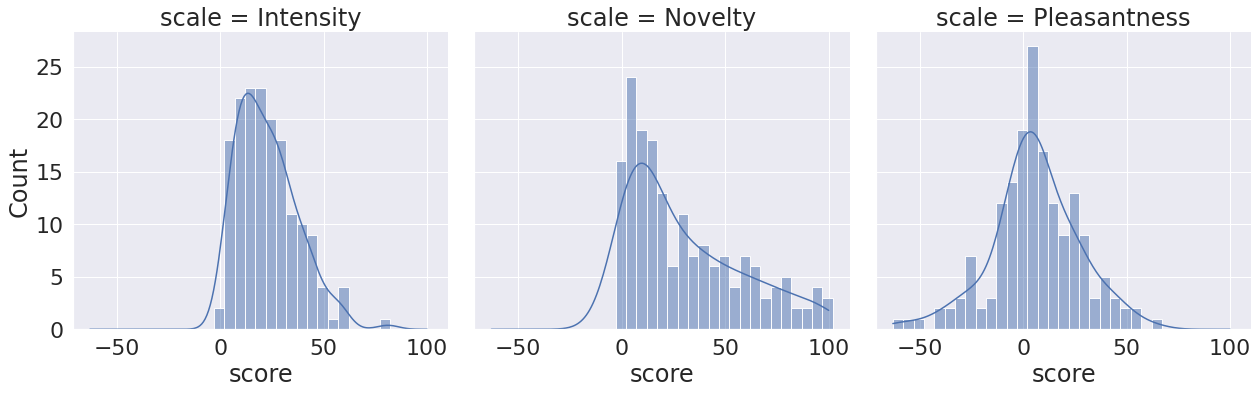

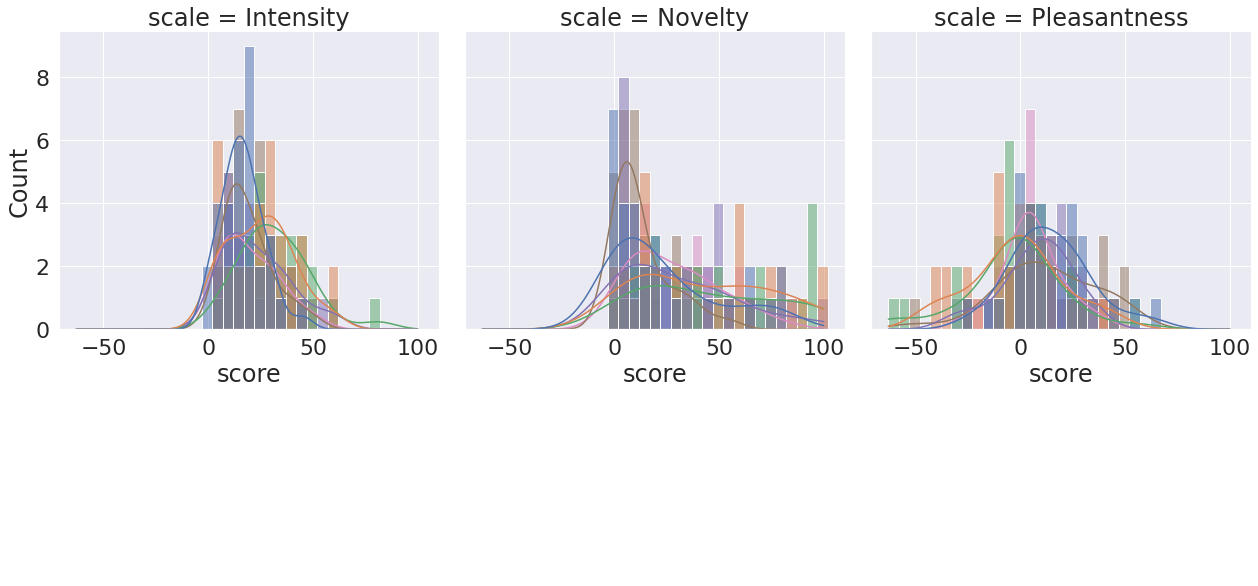

In [71]:
sns.set(font_scale = 2)
#sns.set_style("white")

sns.displot(data=FlavorFractalAccuracy_dfLong.drop_duplicates(subset = ['subject_id','score','scale']), x="score", col="scale", kde=True, binwidth = 5,height = 6, aspect = 1)
plt.tight_layout()

g = sns.displot(data=FlavorFractalAccuracy_dfLong.drop_duplicates(subset = ['subject_id','score','scale']), x="score", hue="Flavor", col="scale", kde=True, binwidth = 5,height = 6, aspect = 1, facet_kws=dict(legend_out=False))
sns.move_legend(g, "upper center",
    bbox_to_anchor=(.5, -.2), ncol=6, title=None, frameon=False)

plt.tight_layout()

### Novelty, Intensity and Pleasanteness Boxplots

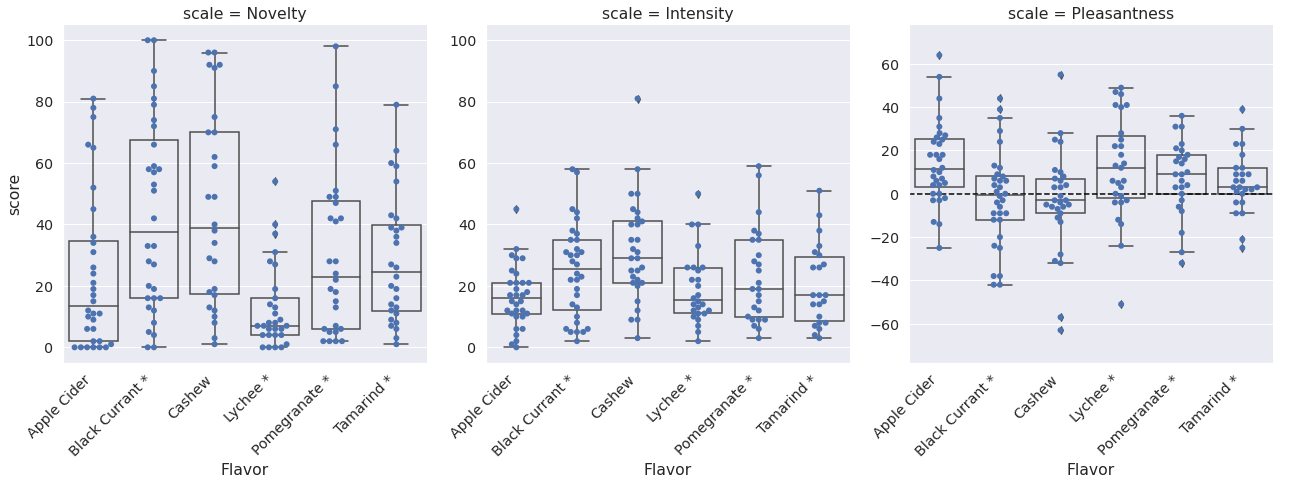

In [72]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

custom_params = {"axes.spines.right": False, "axes.spines.top": False};
sns.set_theme(style="whitegrid", rc=custom_params, palette = 'colorblind');
sns.set(font_scale=1.3);


df = FlavorFractalAccuracy_dfLong[FlavorFractalAccuracy_dfLong['Flavor'] != 'Plain'].drop_duplicates(subset = ['subject_id','score','scale'])
df['Flavor_Group'] = df['experiment_id'].apply(lambda x: 'concentration 2x' if x == 'FlavorFractal_pilot02' else 'concentration 1x')
g = sns.FacetGrid(df, col="scale", col_order = ['Novelty', 'Intensity', 'Pleasantness'], sharey = False, legend_out = True,  height = 6, aspect = 1);
g.map_dataframe(sns.swarmplot, x="Flavor", y="score", order = sorted(df['Flavor'].unique()), size=6);
g.map_dataframe(sns.boxplot, x="Flavor", y="score", order = sorted(df['Flavor'].unique()), boxprops=dict(facecolor=(0,0,0,0)));
g.set_xticklabels(['Apple Cider', 'Black Currant *', 'Cashew', 'Lychee *', 'Pomegranate *', 'Tamarind *'], rotation=45, ha= 'right');
g.axes[0,0].set_ylim([-5,105]);
g.axes[0,1].set_ylim([-5,105]);
g.axes[0,2].set_ylim([-78,78]);
g.axes[0,2].axhline(0, ls = '--', c = 'black');

g.add_legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


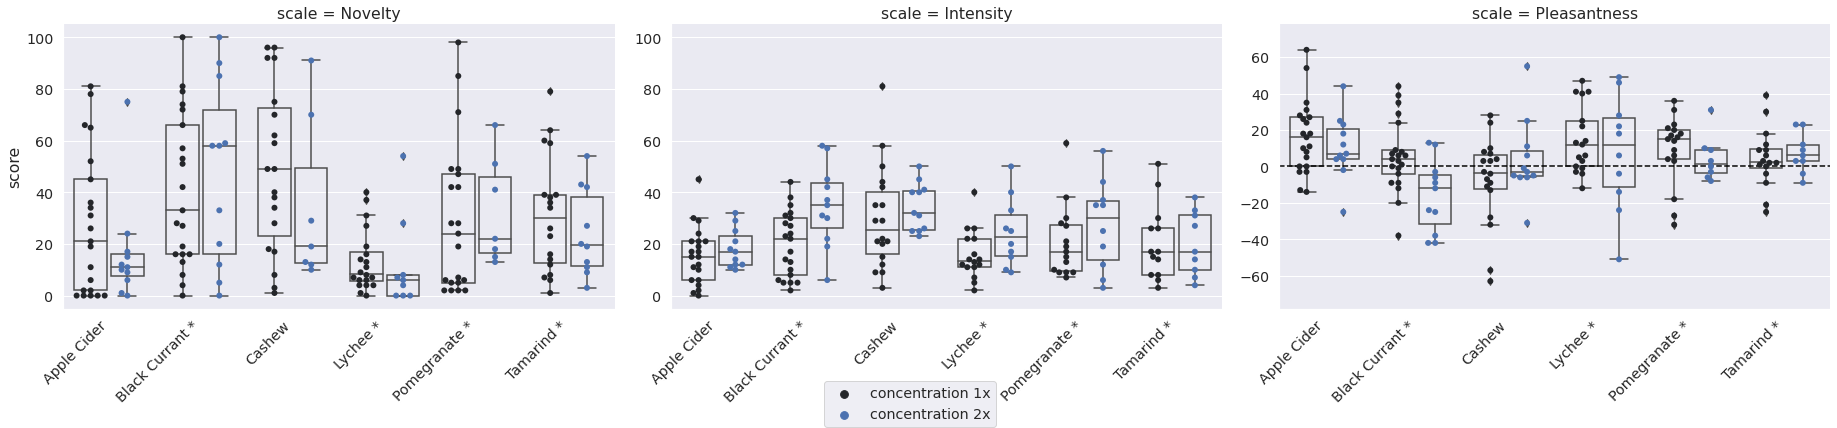

In [73]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False};
sns.set_theme(style="whitegrid", rc=custom_params, palette = 'colorblind');
sns.set(font_scale=1.3);

g = sns.FacetGrid(df, col="scale", col_order = ['Novelty', 'Intensity', 'Pleasantness'], sharey = False, legend_out = True,  height = 6, aspect = 1.3);
g.map_dataframe(sns.swarmplot, x="Flavor", y="score", order = sorted(df['Flavor'].unique()), hue = 'Flavor_Group', dodge=True, size=6);
g.map_dataframe(sns.boxplot, x="Flavor", y="score", order = sorted(df['Flavor'].unique()),hue = 'Flavor_Group', boxprops=dict(facecolor=(0,0,0,0)));
g.set_xticklabels(['Apple Cider', 'Black Currant *', 'Cashew', 'Lychee *', 'Pomegranate *', 'Tamarind *'], rotation=45, ha= 'right');
g.set(xlabel=None)
g.axes[0,0].set_ylim([-5,105]);
g.axes[0,1].set_ylim([-5,105]);
g.axes[0,2].set_ylim([-78,78]);
g.axes[0,2].axhline(0, ls = '--', c = 'black');

adjust_box_widths(g.fig, 0.9)
g.add_legend();
sns.move_legend(g, loc = "lower center", bbox_to_anchor=(.49, -0.015))
plt.tight_layout()

g.fig.savefig('{}scalesBarplots_groupLevel_allSubjects.pdf'.format(figureFolder_path), bbox_inches='tight')

### Statistics

In [74]:
print(33*'=')
print(' '*10, 'parametric')
print(33*'=')

def anova_postHoc(df, mc_method = 'fdr_by'):
  mc = None
  ANOVA_tables = {}
  MC = {}
  for scale in df['scale'].unique():
    MC[scale] = {}
    print(10*'-',scale, 10*'-')
    sub_df = df[df['scale'] == scale]
    model_lm = ols('score ~ C(Flavor) + C(Flavor_Group) + C(Flavor):C(Flavor_Group)', data=sub_df).fit()
    anova_table = sm.stats.anova_lm(model_lm, typ=2)
    ANOVA_tables[scale] = anova_table
    print(anova_table)
#    for p in range(len(anova_table) - 2):
#      if anova_table.iloc[p,-1] < 0.05:
#        #mc = sp.posthoc_ttest(sub_df, val_col='score', group_col='Flavor', p_adjust=mc_method)
#        group_id = anova_table.index[0].split('(')[-1].split(')')[0]
#        mc = pairwise_tukeyhsd(endog=sub_df['score'], groups=sub_df['Flavor'], alpha=0.05)
#        print()
#        print(mc)
#      MC[scale][group_id] = mc

  return ANOVA_tables, MC

anova_table, mc = anova_postHoc(df[df['score'].notna()])

#print()
#print(33*'=')
#print(' '*8, 'non-parametric')
#print(33*'=')
#
#for scale in flavorRating_dfLong['scale'].unique():
#  print(10*'-',scale, 10*'-')
#  sub_df = flavorRating_dfLong[flavorRating_dfLong['scale'] == scale]
#  data = [sub_df.loc[ids, 'score'].values for ids in sub_df.groupby('Flavor').groups.values()]
#  kruskal_res = stats.kruskal(*data)
#  print(kruskal_res)
#  if kruskal_res[1] < 0.05:
#    print(sp.posthoc_conover(sub_df, val_col='score', group_col='Flavor', p_adjust=mc_method))
#  print()

           parametric
---------- Intensity ----------
                                 sum_sq     df         F    PR(>F)
C(Flavor)                   4094.743813    5.0  4.458071  0.000804
C(Flavor_Group)             1605.778438    1.0  8.741297  0.003601
C(Flavor):C(Flavor_Group)    887.249062    5.0  0.965975  0.440556
Residual                   28289.839631  154.0       NaN       NaN
---------- Novelty ----------
                                  sum_sq     df         F    PR(>F)
C(Flavor)                   21101.248389    5.0  6.234817  0.000026
C(Flavor_Group)               540.666763    1.0  0.798758  0.372783
C(Flavor):C(Flavor_Group)    2012.140650    5.0  0.594530  0.704173
Residual                   110332.135961  163.0       NaN       NaN
---------- Pleasantness ----------
                                 sum_sq     df         F    PR(>F)
C(Flavor)                   7675.622622    5.0  3.811357  0.002751
C(Flavor_Group)              784.991029    1.0  1.948950  0.164658
C(Fla

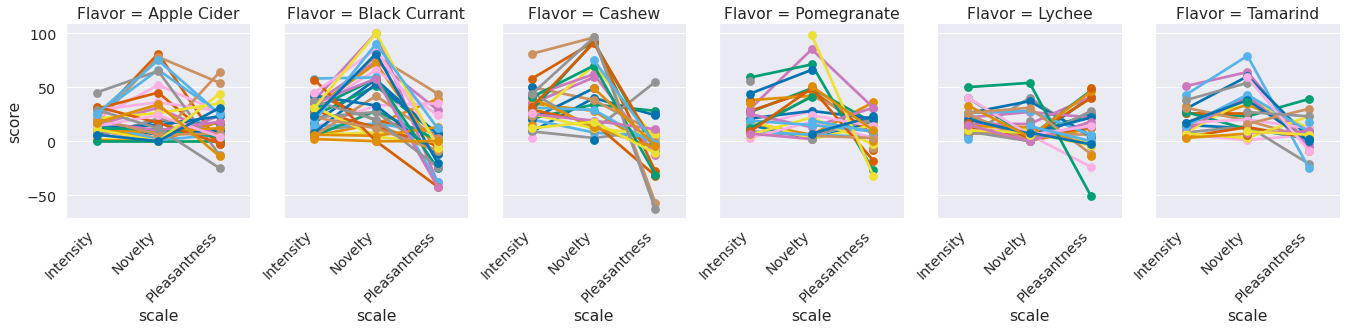

In [75]:
g = sns.FacetGrid(df, col = "Flavor", legend_out =True,  height = 4, aspect = .8)
g.map_dataframe(sns.pointplot, x="scale", y="score", hue = 'subject_id', size=10, palette=sns.color_palette('colorblind'))
g.set_xticklabels(rotation=45, ha= 'right')

## Is the performance different between Flavor or Fractals?

### Group-Level

#### Barplots of performance within each pilot

##### All Subjects

In [80]:
FlavorFractalAccuracy_df

experiment_id  subject_id         Flavor  Intensity  Novelty  \
0    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
1    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
2    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
3    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
4    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
..                     ...         ...            ...        ...      ...   
611                    NaN  ercffa_006  Black Currant        2.0      0.0   
612                    NaN  ercffa_006         Cashew       12.0     18.0   
613                    NaN  ercffa_006         Lychee        2.0      8.0   
614                    NaN  ercffa_006    Pomegranate        7.0      2.0   
615                    NaN  ercffa_006       Tamarind        3.0      7.0   

     Pleasantness Association test Fractal  Order correct_responses  \
0            16.0           Test 1     NaN    NaN               NaN   
1            16.0           Test 1     NaN    NaN               NaN   
2            16.0           Test 1     NaN    NaN               NaN   
3            16.0           Test 1     NaN    NaN               NaN   
4            16.0           Test 2     NaN    NaN               NaN   
..            ...              ...     ...    ...               ...   
611           0.0              NaN     NaN    NaN               NaN   
612         -11.0              NaN     NaN    NaN               NaN   
613          -3.0              NaN     NaN    NaN               NaN   
614          -3.0              NaN     NaN    NaN               NaN   
615           0.0              NaN     NaN    NaN               NaN   

    sensitivity specificity precision f1-score  accuracy  
0           NaN         NaN       NaN      NaN  0.250000  
1           NaN         NaN       NaN      NaN  0.250000  
2           NaN         NaN       NaN      NaN  0.250000  
3           NaN         NaN       NaN      NaN  0.250000  
4           NaN         NaN       NaN      NaN  0.083333  
..          ...         ...       ...      ...       ...  
611         NaN         NaN       NaN      NaN       NaN  
612         NaN         NaN       NaN      NaN       NaN  
613         NaN         NaN       NaN      NaN       NaN  
614         NaN         NaN       NaN      NaN       NaN  
615         NaN         NaN       NaN      NaN       NaN  

[616 rows x 15 columns]

In [78]:
performance_variables = ['correct_responses', 'f1-score', 'sensitivity', 'precision', 'accuracy']
col_order = performance_variables

dfLong = pd.melt(FlavorFractalAccuracy_df, id_vars=list(set(FlavorFractalAccuracy_df.columns) - set(performance_variables)), 
                               var_name = 'Performance Metric', value_name = 'score')
dfLong = dfLong[dfLong['score'].notna()]
dfLong

Flavor  Novelty  Pleasantness Fractal  Order specificity  \
16           Cashew     40.0          24.0      IV    6.0         1.0   
17           Cashew     40.0          24.0      IV    6.0         1.0   
38         Tamarind     36.0          24.0      II    1.0         0.5   
39         Tamarind     36.0          24.0      II    1.0    0.166667   
48    Black Currant     16.0          39.0      IV    2.0    0.666667   
...             ...      ...           ...     ...    ...         ...   
3063    Pomegranate     41.0          12.0       I    1.0         1.0   
3064    Pomegranate     41.0          12.0       I    1.0    0.933333   
3065       Tamarind     43.0           9.0      II    2.0         0.8   
3066       Tamarind     43.0           9.0      II    2.0    0.966667   
3067       Tamarind     43.0           9.0      II    2.0    0.866667   

              experiment_id Association test  Intensity  subject_id  \
16    FlavorFractal_pilot00           Test 1        9.0  ercffa_001   
17    FlavorFractal_pilot00           Test 2        9.0  ercffa_001   
38    FlavorFractal_pilot00           Test 1        9.0  ercffa_001   
39    FlavorFractal_pilot00           Test 2        9.0  ercffa_001   
48    FlavorFractal_pilot00           Test 1        5.0  ercffa_002   
...                     ...              ...        ...         ...   
3063  FlavorFractal_pilot02           Test 2       12.0  ercffa_033   
3064  FlavorFractal_pilot02           Test 3       12.0  ercffa_033   
3065  FlavorFractal_pilot02           Test 1       14.0  ercffa_033   
3066  FlavorFractal_pilot02           Test 2       14.0  ercffa_033   
3067  FlavorFractal_pilot02           Test 3       14.0  ercffa_033   

     Performance Metric     score  
16    correct_responses         3  
17    correct_responses         1  
38    correct_responses         0  
39    correct_responses         0  
48    correct_responses         2  
...                 ...       ...  
3063           accuracy  0.666667  
3064           accuracy  0.555556  
3065           accuracy       0.5  
3066           accuracy  0.666667  
3067           accuracy  0.555556  

[2252 rows x 12 columns]

###### Flavor

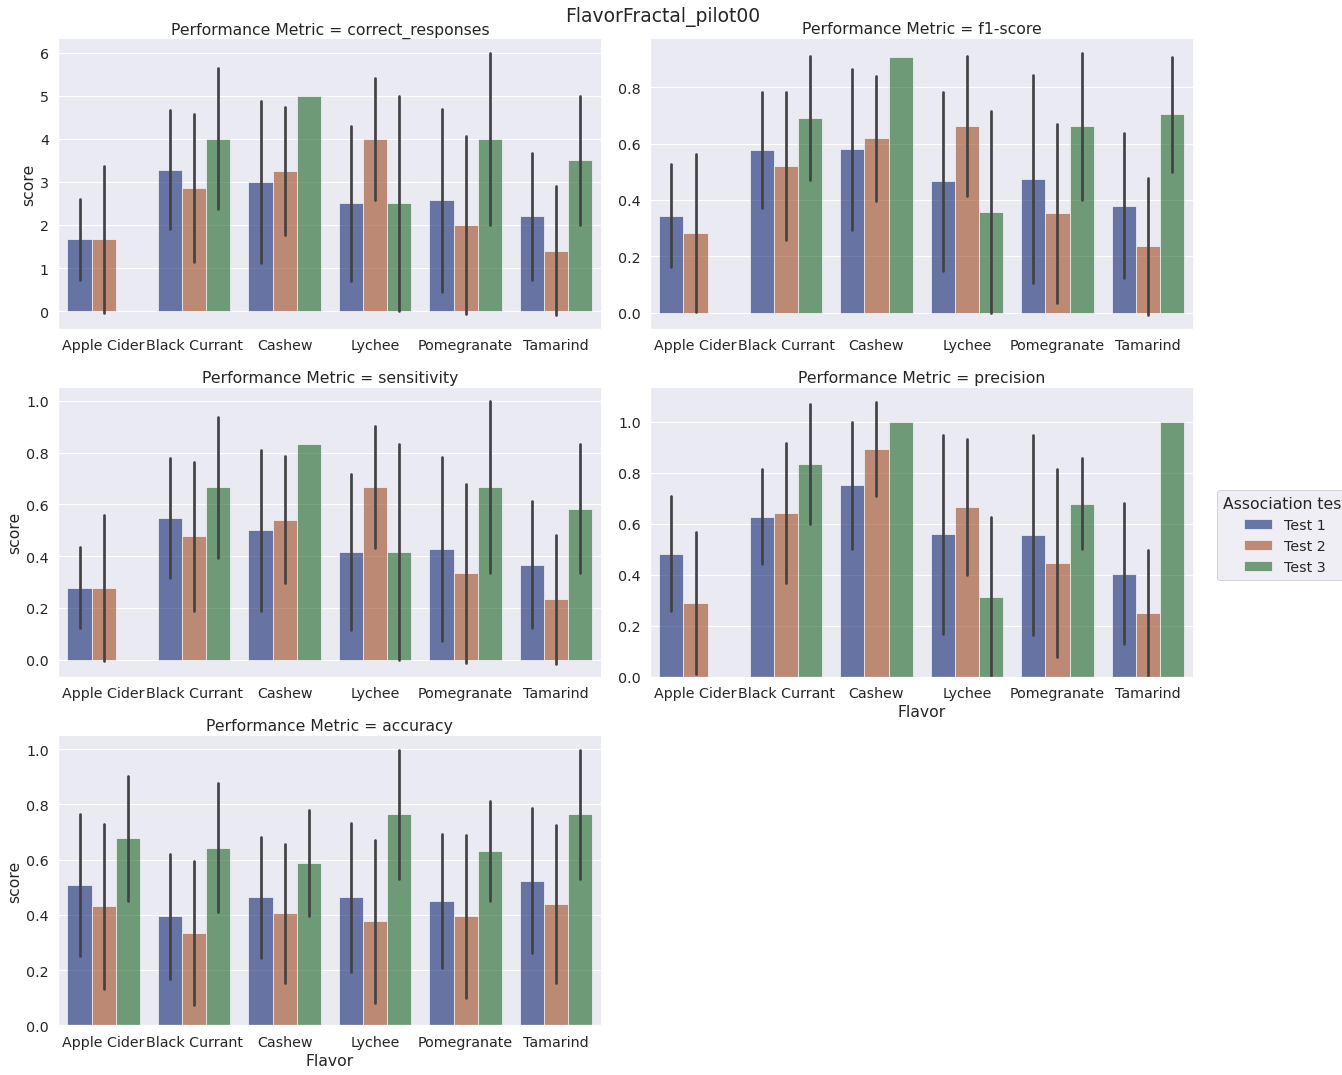

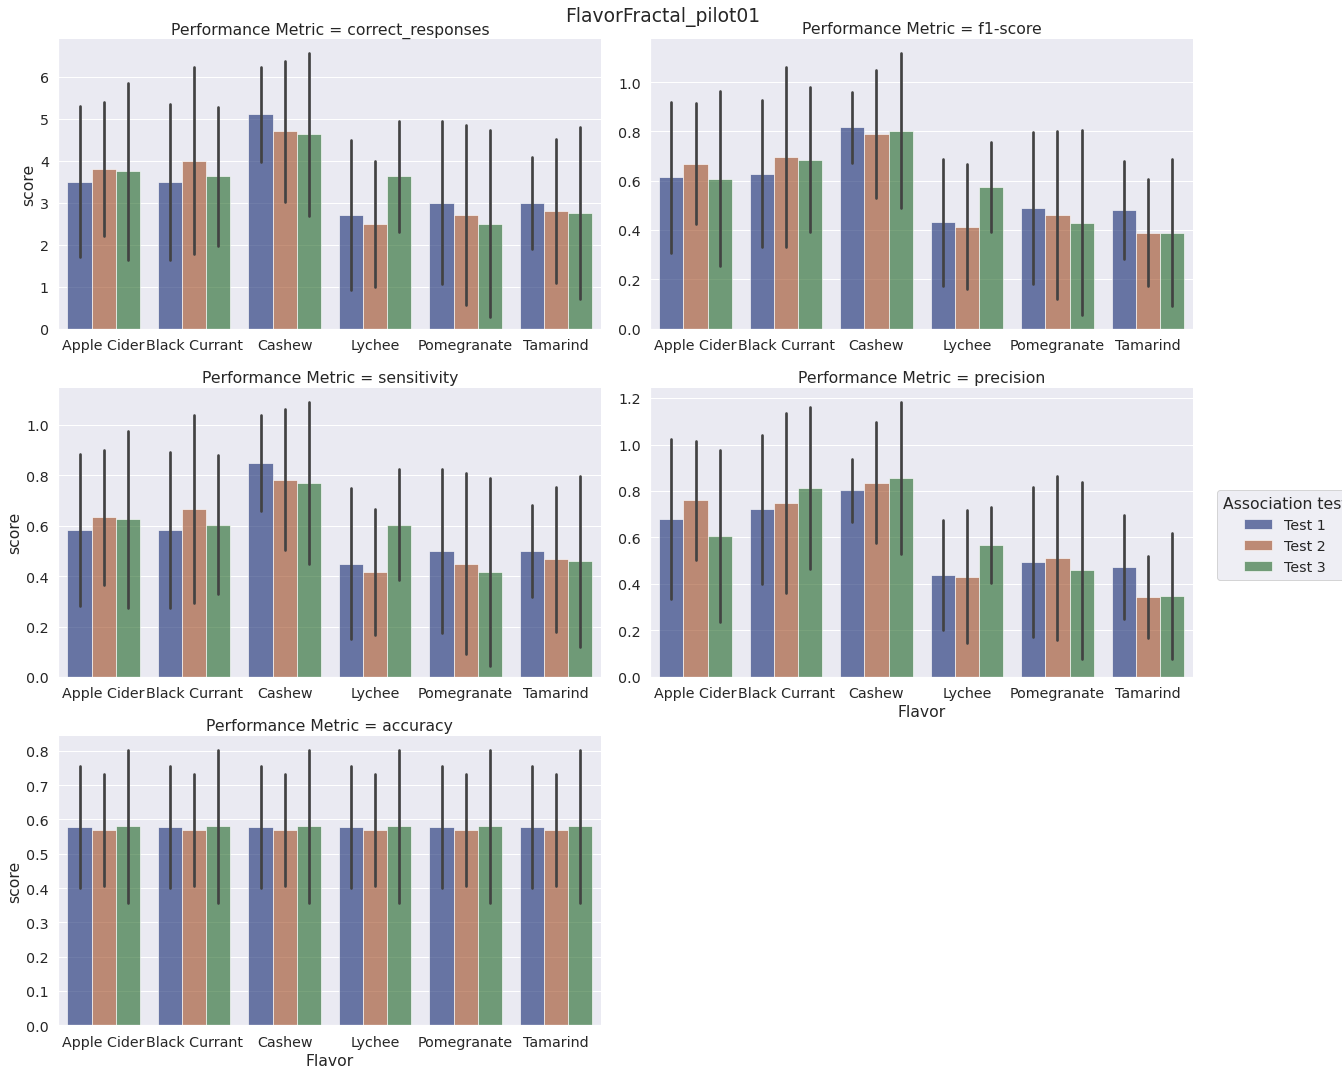

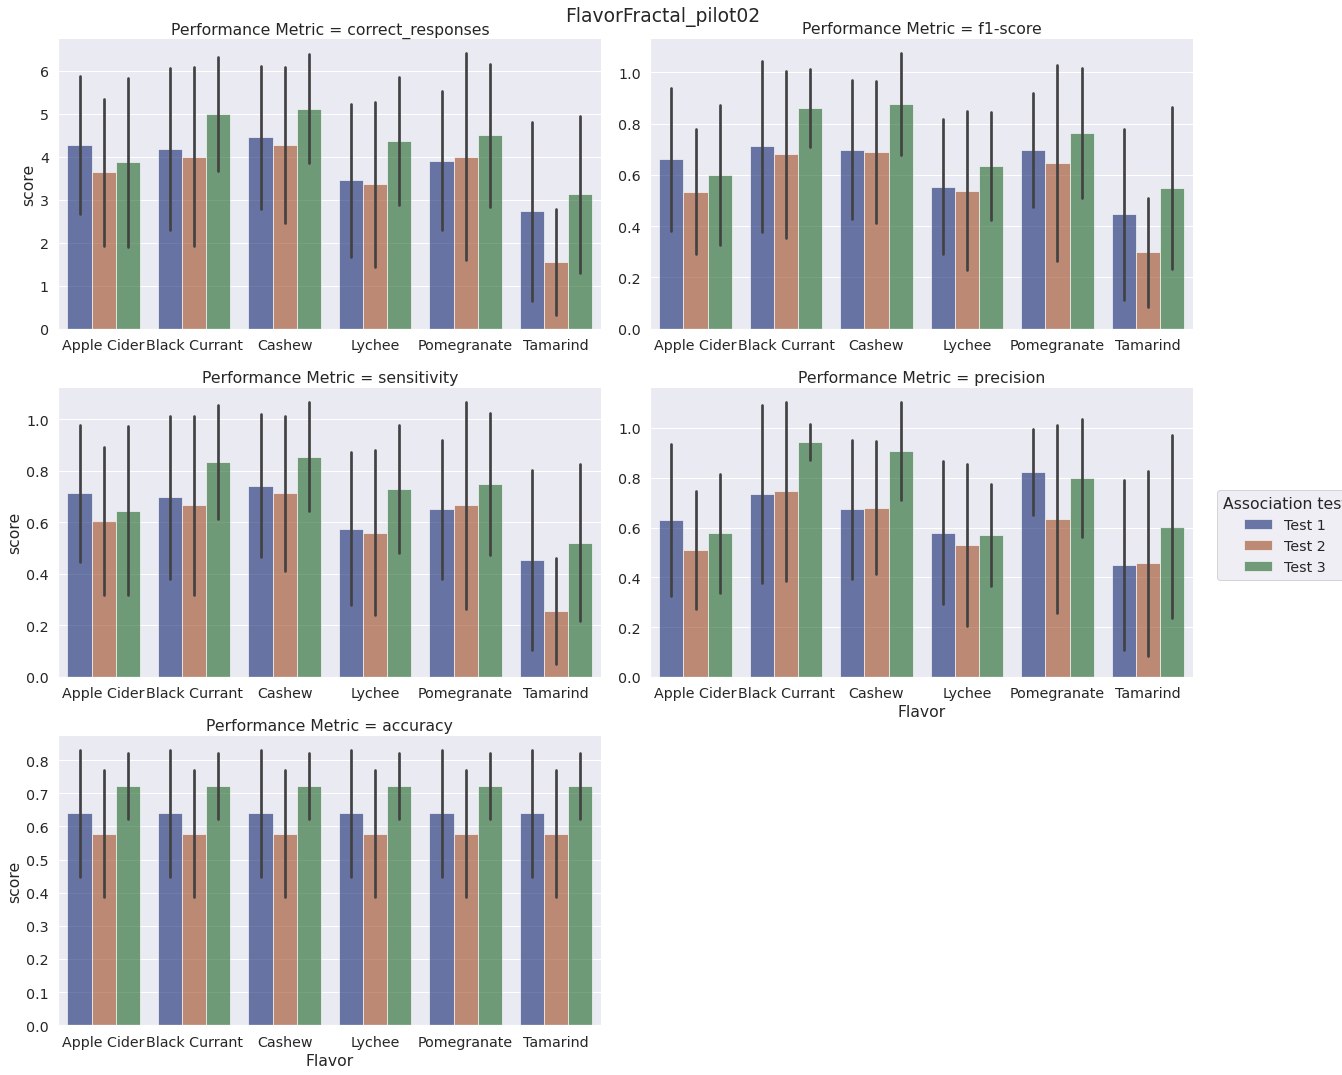

In [79]:

for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():

  df = dfLong[dfLong['experiment_id'] == experiment_id]
  #if 'Plain' in df['Flavor'].unique.tolist():
  g = sns.catplot(data=df, kind="bar", order = sorted(df['Flavor'].unique()),
      y="score", x="Flavor", hue="Association test",
      col = 'Performance Metric', col_wrap = 2, col_order = col_order,
      sharex = False, sharey = False, legend_out = True,
      ci="sd", palette="dark", alpha=.6, height=5, aspect = 1.7
  )
  sns.move_legend(g, "center right", bbox_to_anchor=(1, .5))
  g.fig.suptitle(experiment_id, va = 'bottom')
  g.fig.savefig('{}performanceBarplots_flavor_groupLevel_allSubjects_{}.pdf'.format(figureFolder_path, experiment_id),bbox_inches='tight')

###### Fractals

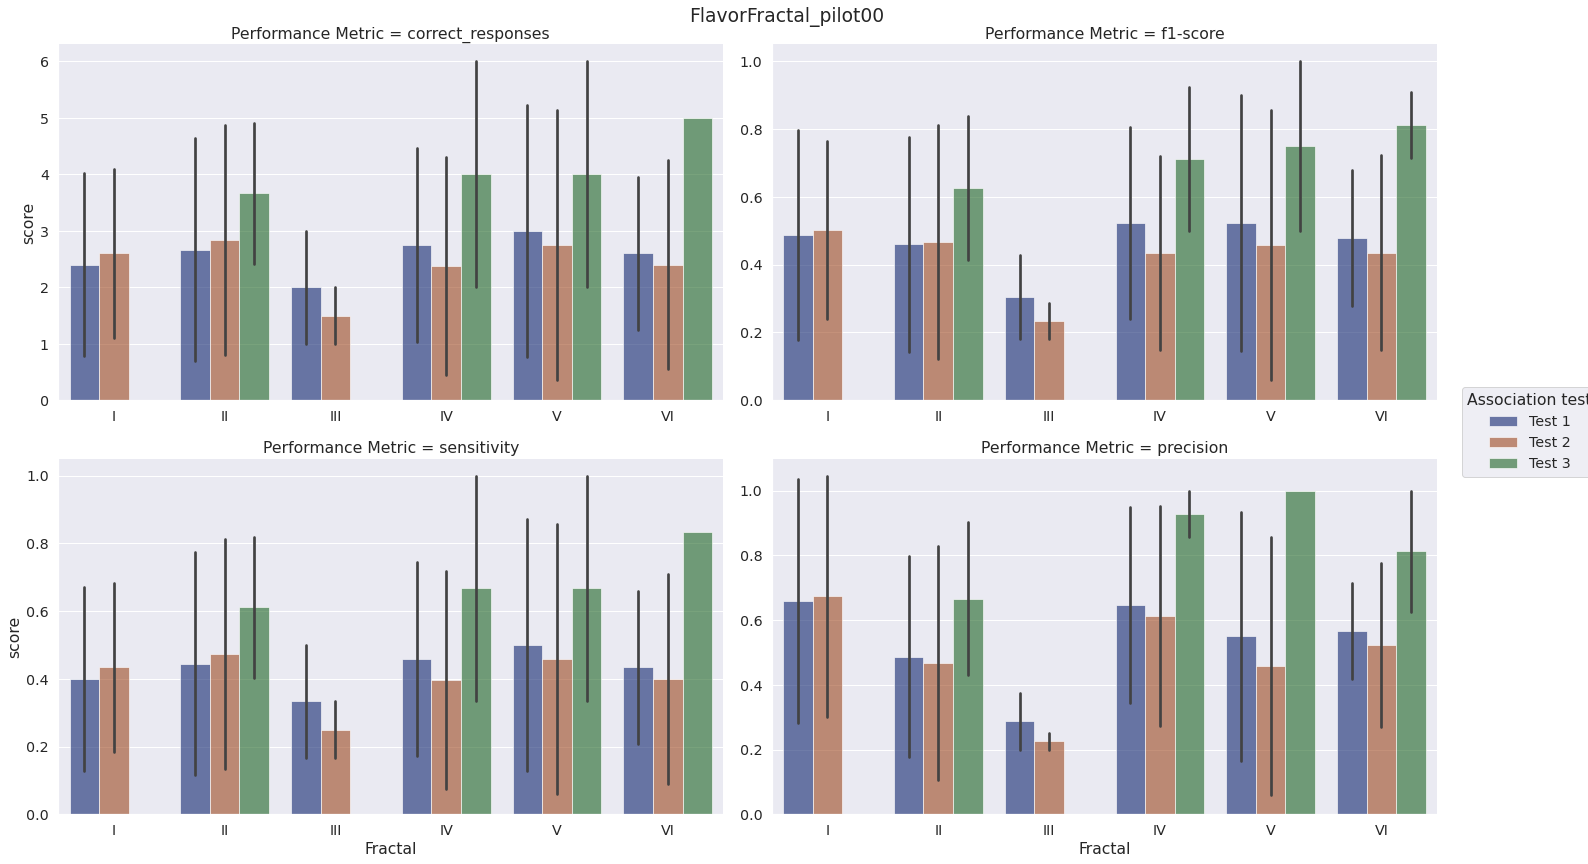

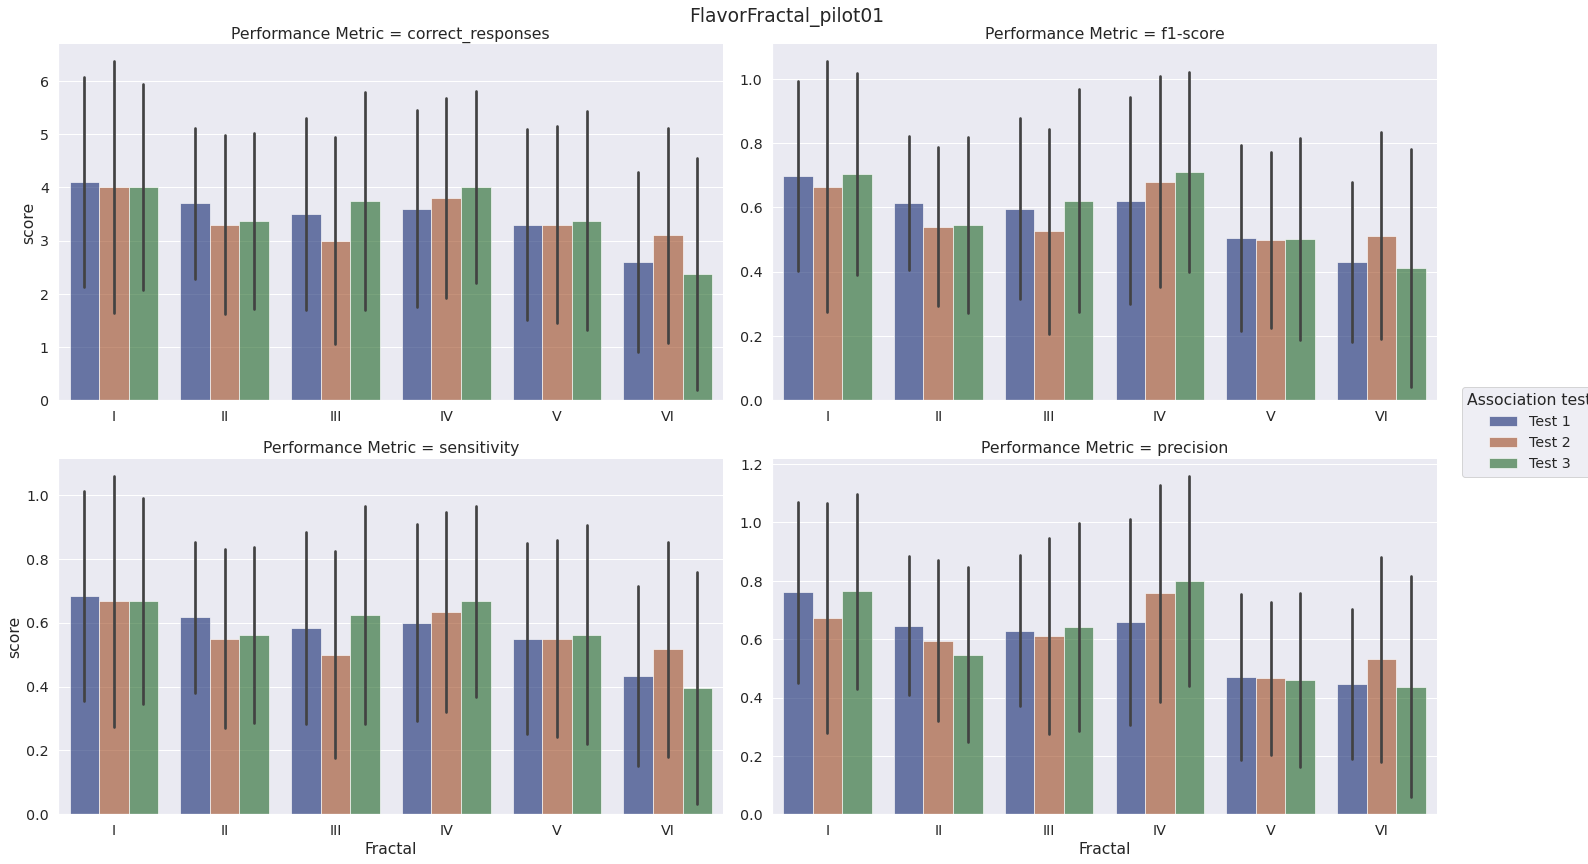

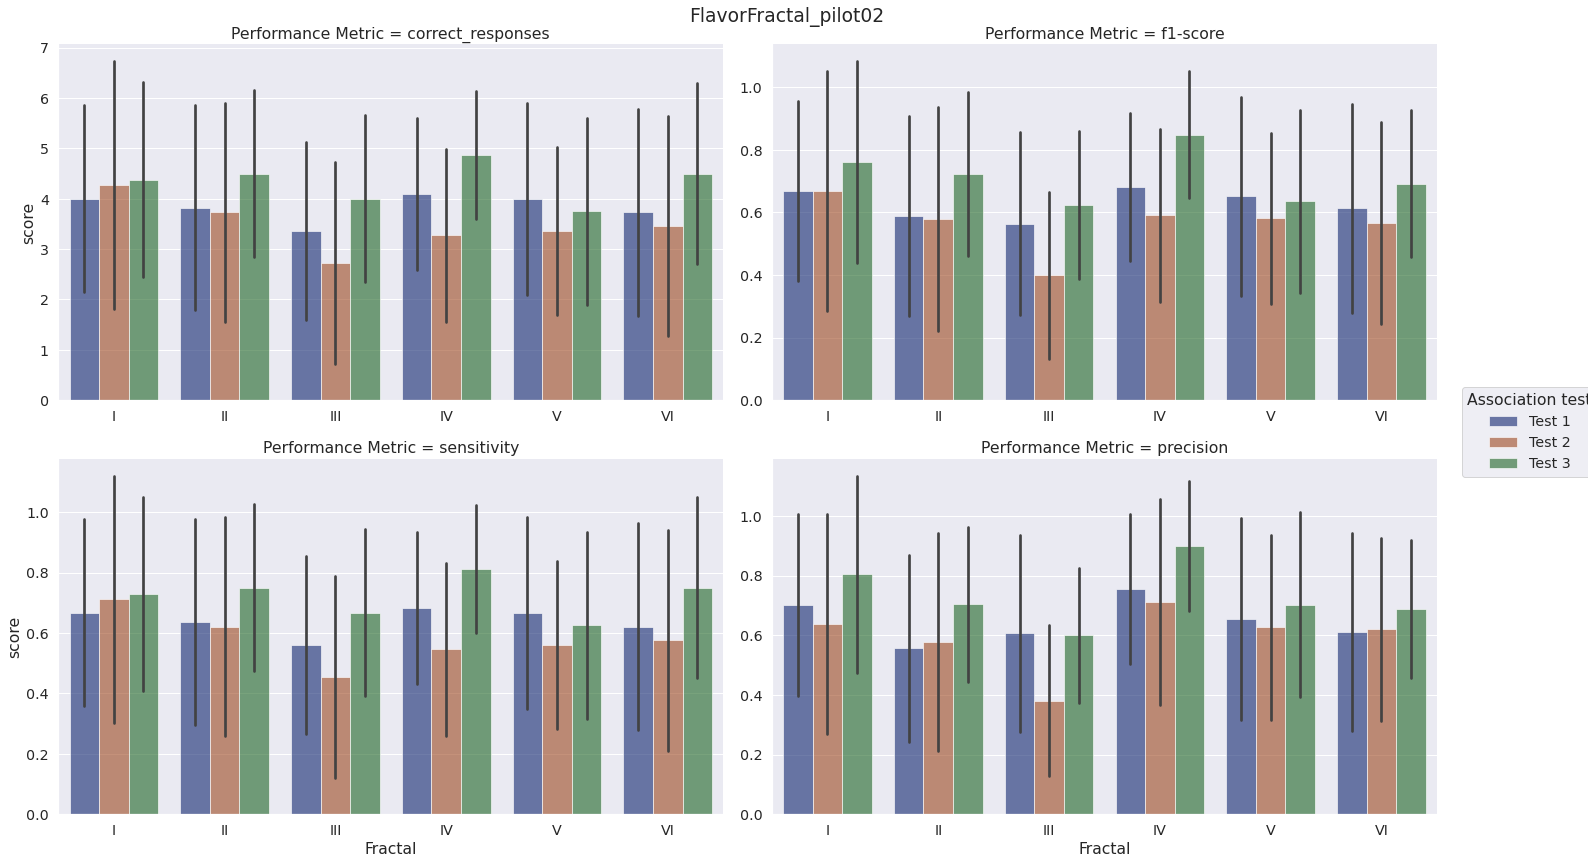

In [ ]:
for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():

  df = dfLong[dfLong['experiment_id'] == experiment_id]
  #if 'Plain' in df['Flavor'].unique.tolist():
  g = sns.catplot(data=df, kind="bar", order = ['I', 'II', 'III', 'IV', 'V', 'VI'],
      y="score", x="Fractal", hue="Association test",
      col = 'Performance Metric', col_wrap = 2, col_order = col_order,
      sharex = False, sharey = False, legend_out = True,
      ci="sd", palette="dark", alpha=.6, height=6, aspect = 1.7
  )
  sns.move_legend(g, "center right", bbox_to_anchor=(1, .5))
  g.fig.suptitle(experiment_id, va = 'bottom')
  g.fig.savefig('{}performanceBarplots_fractal_groupLevel_allSubjects_{}.pdf'.format(figureFolder_path, experiment_id),bbox_inches='tight')


##### Subjects who completed full protocol

In [ ]:
fullProtocol_subjects = FlavorFractalAccuracy_df[FlavorFractalAccuracy_df['Association test'] == 'Test 3']['subject_id'].unique()

dfLong = dfLong[dfLong['subject_id'].isin(fullProtocol_subjects)]
dfLong

Flavor  Novelty  accuracy  Pleasantness Fractal  Order  \
89    Black Currant     51.0  1.000000           6.0       V    4.0   
90    Black Currant     51.0  0.944444           6.0       V    4.0   
91    Black Currant     51.0  0.944444           6.0       V    4.0   
92           Cashew     34.0  1.000000          28.0      II    1.0   
93           Cashew     34.0  0.944444          28.0      II    1.0   
...             ...      ...       ...           ...     ...    ...   
3063    Pomegranate     41.0  0.666667          12.0       I    1.0   
3064    Pomegranate     41.0  0.555556          12.0       I    1.0   
3065       Tamarind     43.0  0.500000           9.0      II    2.0   
3066       Tamarind     43.0  0.666667           9.0      II    2.0   
3067       Tamarind     43.0  0.555556           9.0      II    2.0   

              experiment_id Association test  Intensity  subject_id  \
89    FlavorFractal_pilot00           Test 1       24.0  ercffa_004   
90    FlavorFractal_pilot00           Test 2       24.0  ercffa_004   
91    FlavorFractal_pilot00           Test 3       24.0  ercffa_004   
92    FlavorFractal_pilot00           Test 1       21.0  ercffa_004   
93    FlavorFractal_pilot00           Test 2       21.0  ercffa_004   
...                     ...              ...        ...         ...   
3063  FlavorFractal_pilot02           Test 2       12.0  ercffa_033   
3064  FlavorFractal_pilot02           Test 3       12.0  ercffa_033   
3065  FlavorFractal_pilot02           Test 1       14.0  ercffa_033   
3066  FlavorFractal_pilot02           Test 2       14.0  ercffa_033   
3067  FlavorFractal_pilot02           Test 3       14.0  ercffa_033   

     Performance Metric     score  
89    correct_responses         6  
90    correct_responses         6  
91    correct_responses         6  
92    correct_responses         6  
93    correct_responses         5  
...                 ...       ...  
3063           f1-score       1.0  
3064           f1-score  0.545455  
3065           f1-score       0.0  
3066           f1-score      0.25  
3067           f1-score  0.181818  

[1272 rows x 12 columns]

###### Flavor

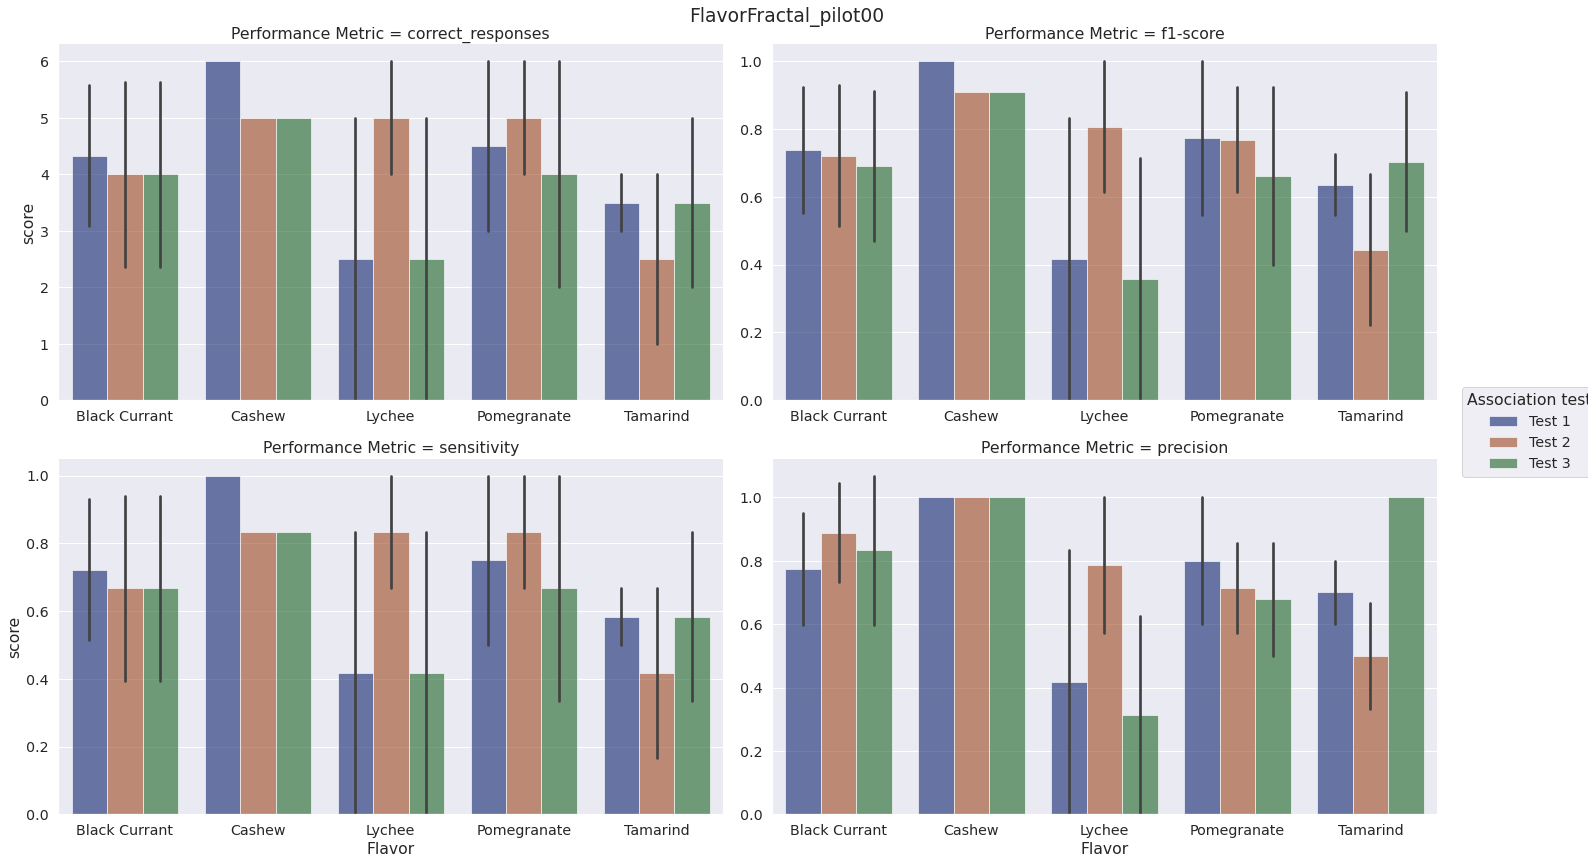

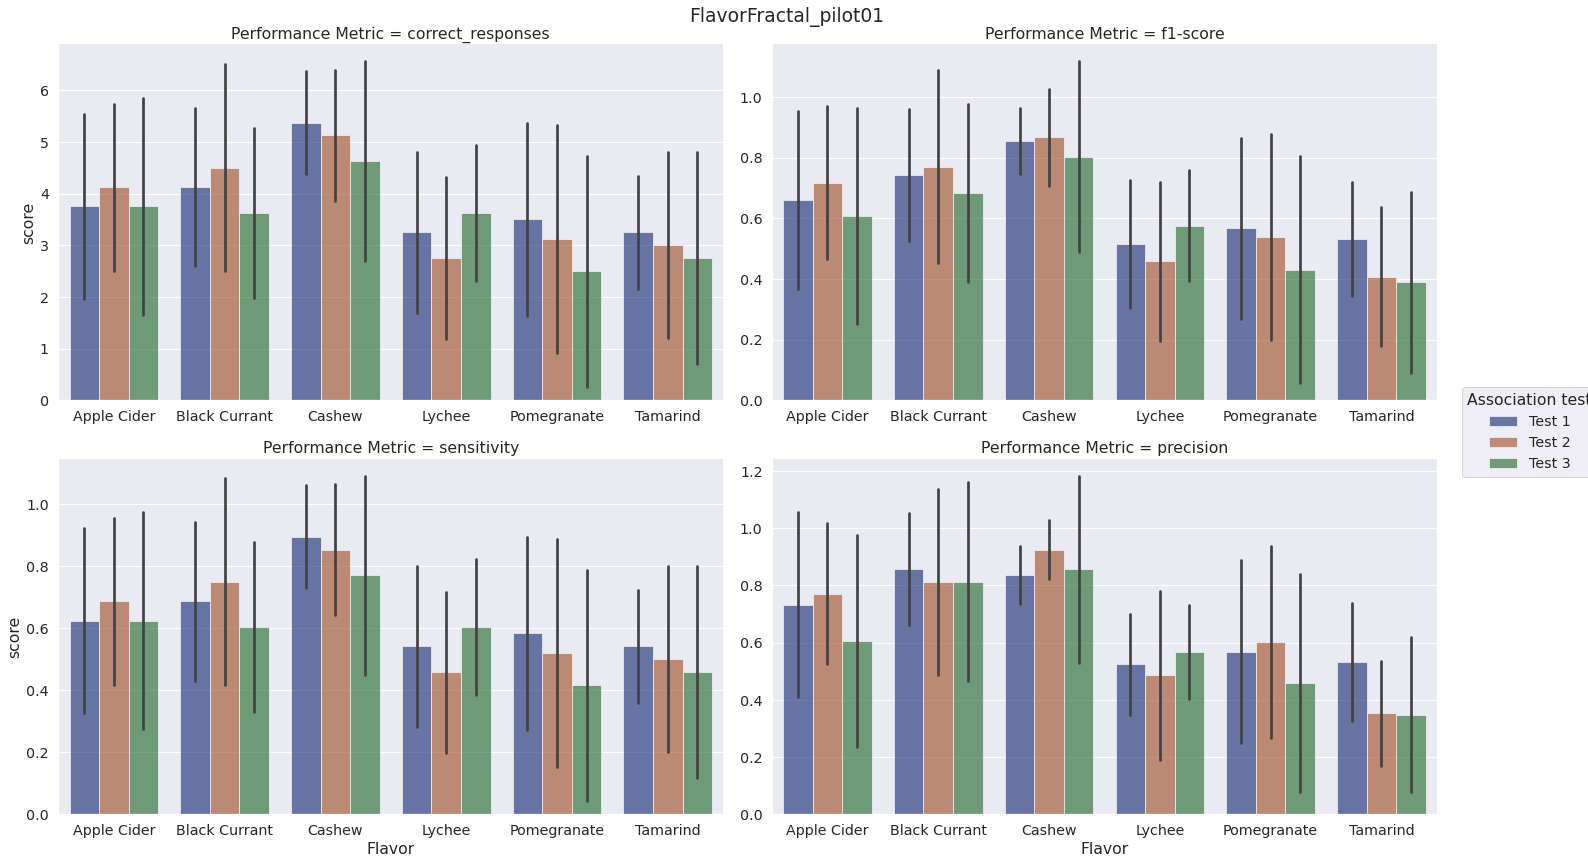

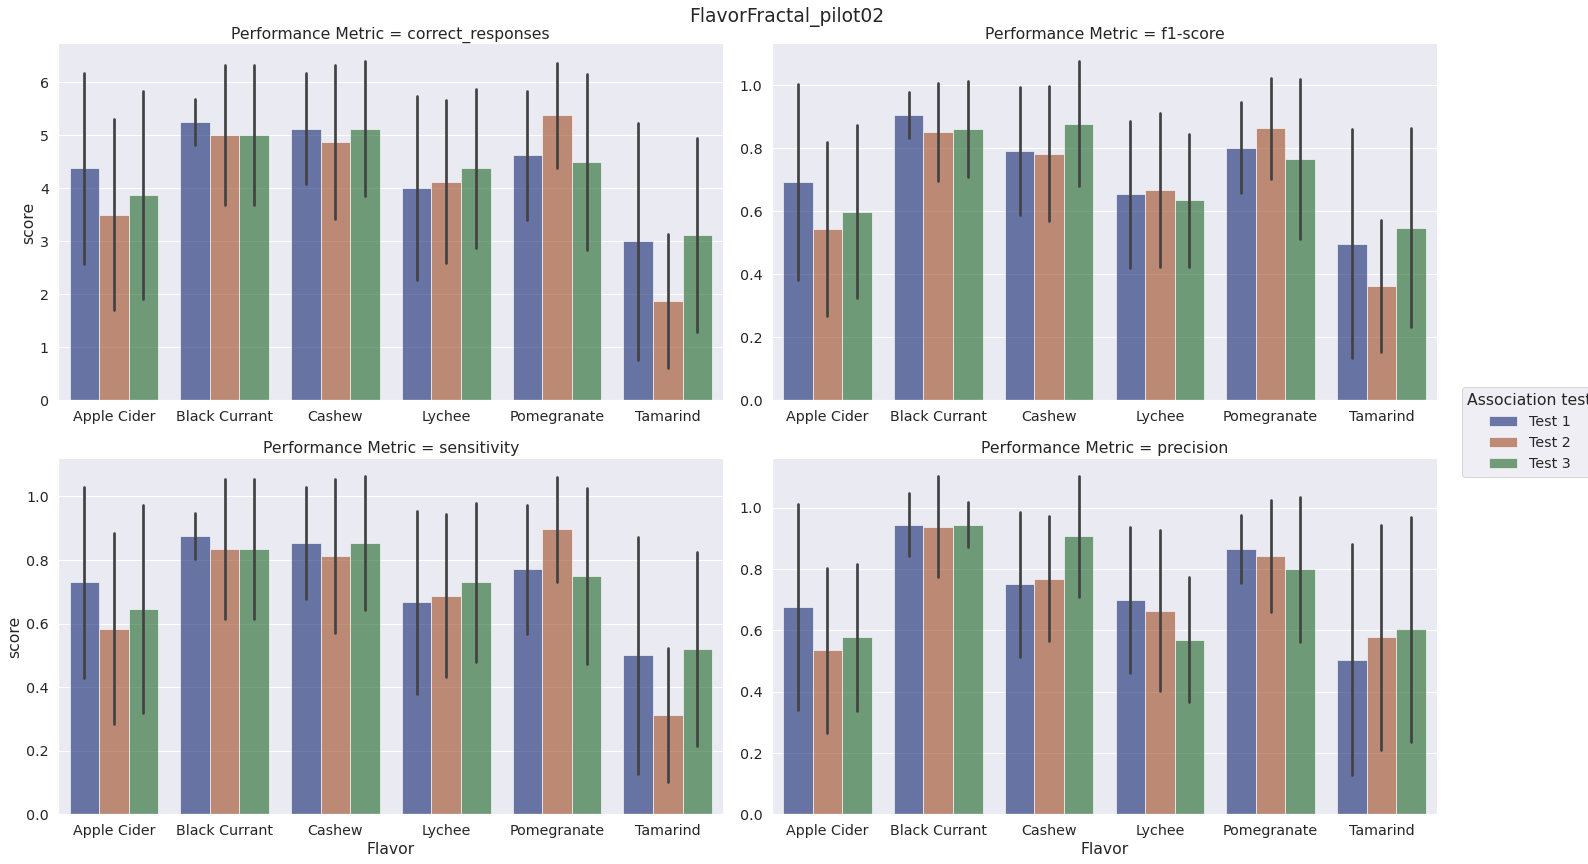

In [ ]:

for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():

  df = dfLong[dfLong['experiment_id'] == experiment_id]
  #if 'Plain' in df['Flavor'].unique.tolist():
  g = sns.catplot(data=df, kind="bar", order = sorted(df['Flavor'].unique()),
      y="score", x="Flavor", hue="Association test",
      col = 'Performance Metric', col_wrap = 2, col_order = col_order,
      sharex = False, sharey = False, legend_out = True,
      ci="sd", palette="dark", alpha=.6, height=6, aspect = 1.7
  )
  sns.move_legend(g, "center right", bbox_to_anchor=(1, .5))
  g.fig.suptitle(experiment_id, va = 'bottom')
  g.fig.savefig('{}performanceBarplots_flavor_groupLevel_fullProtocol_{}.pdf'.format(figureFolder_path, experiment_id),bbox_inches='tight')

###### Fractals

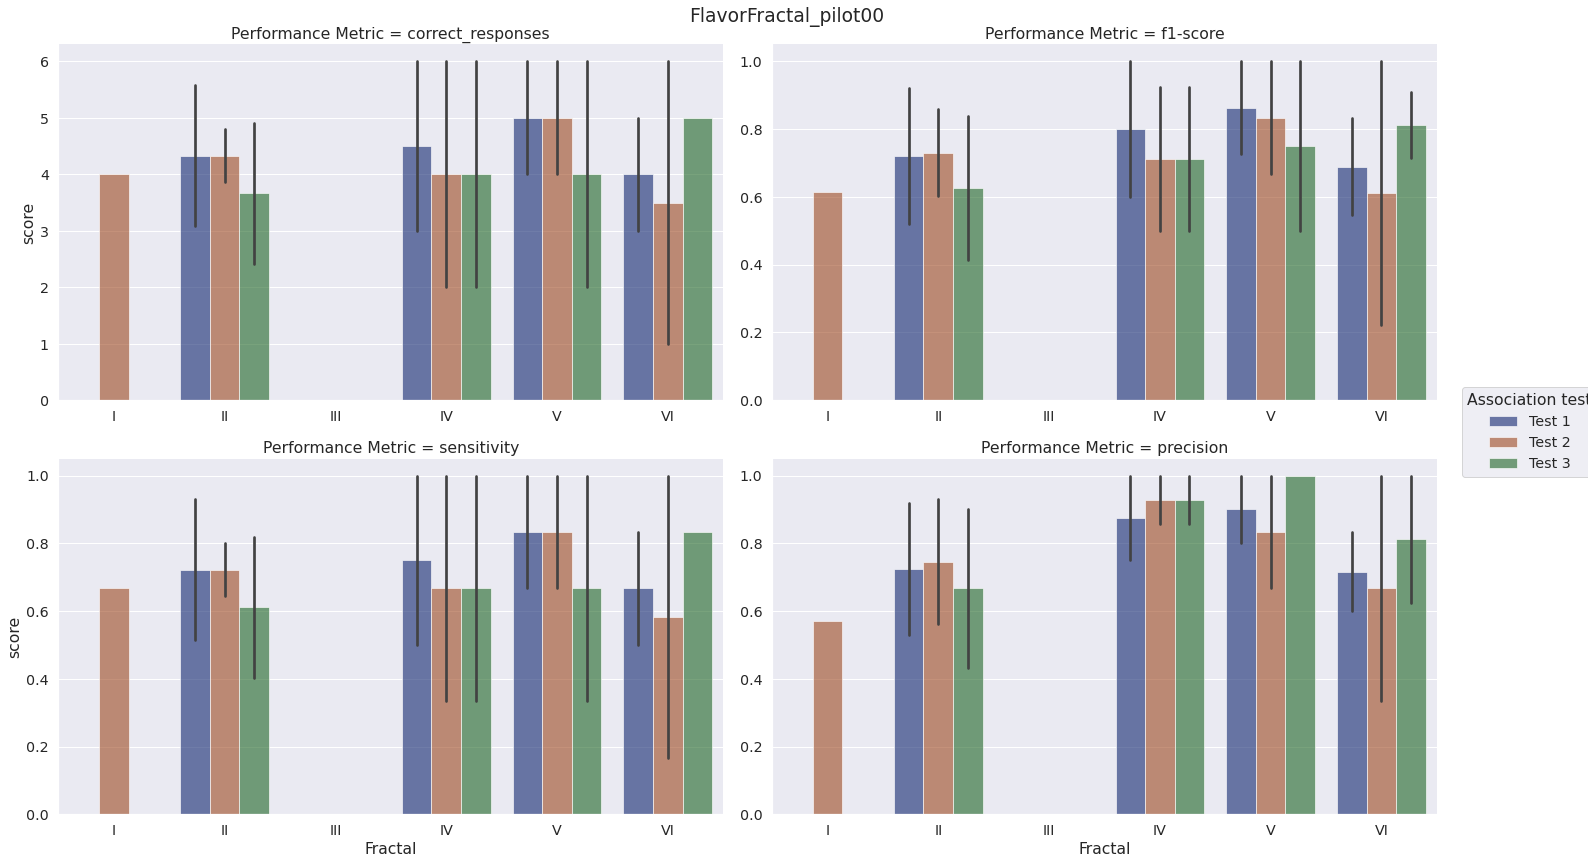

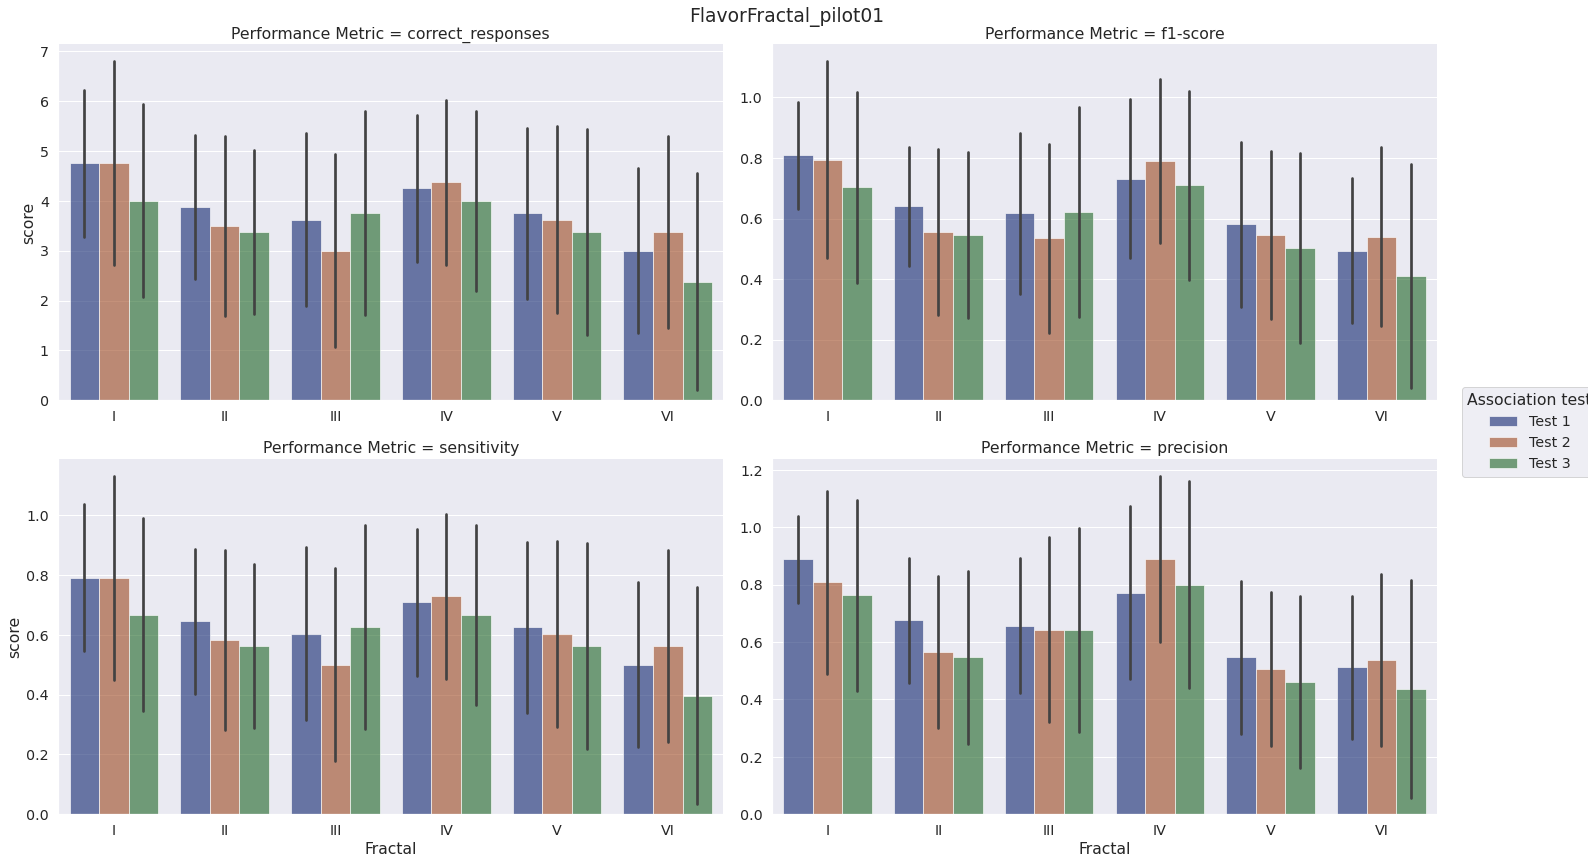

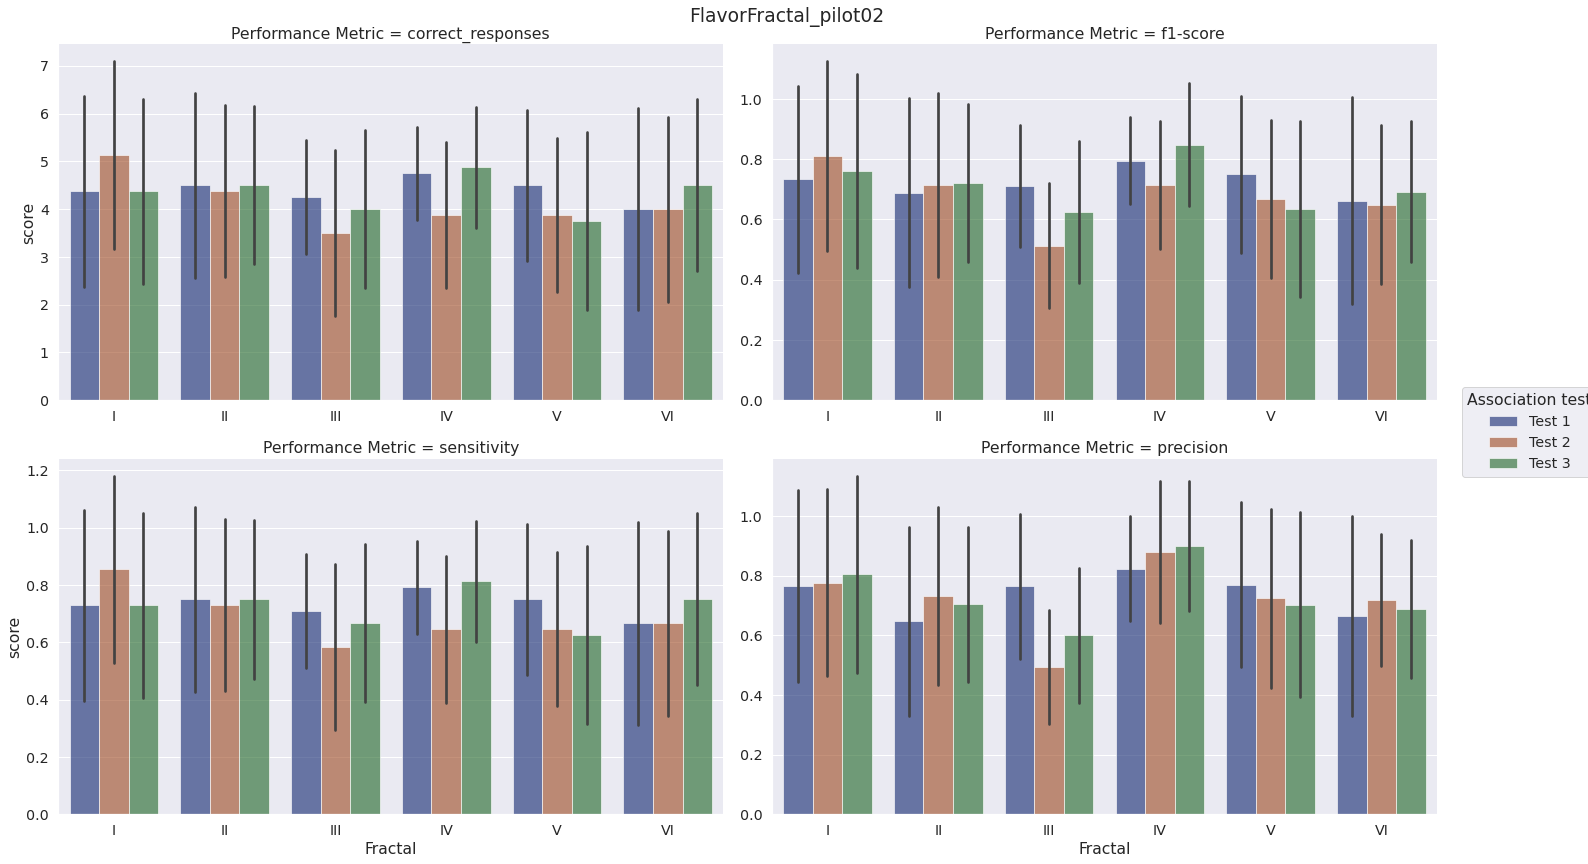

In [ ]:
for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():

  df = dfLong[dfLong['experiment_id'] == experiment_id]
  #if 'Plain' in df['Flavor'].unique.tolist():
  g = sns.catplot(data=df, kind="bar", order = ['I', 'II', 'III', 'IV', 'V', 'VI'],
      y="score", x="Fractal", hue="Association test",
      col = 'Performance Metric', col_wrap = 2, col_order = col_order,
      sharex = False, sharey = False, legend_out = True,
      ci="sd", palette="dark", alpha=.6, height=6, aspect = 1.7
  )
  sns.move_legend(g, "center right", bbox_to_anchor=(1, .5))
  g.fig.suptitle(experiment_id, va = 'bottom')
  g.fig.savefig('{}performanceBarplots_fractal_groupLevel_fullProtocol_{}.pdf'.format(figureFolder_path, experiment_id),bbox_inches='tight')

#### Confusion Matrix

In [ ]:
def get_confMats(df, sub_id, test):
  subject_df = df[df['subject_id'] == sub_id]
  test_df = subject_df[subject_df['Association test'] == test]

  fractal_confMatrix = np.full((6,6),np.nan)
  order_confMatrix = np.full((6,6),np.nan)
  flavor_confMatrix = np.full((6,6),np.nan)
  for i, row in test_df.iterrows():
    row_ = row.values
    try:
      fractal_confMatrix[row_[6], row_[7]] = row_[-1]
    except:
      continue
    try:
      order_confMatrix[row_[10], row_[11]] = row_[-1]
    except:
      continue
    try:
      flavor_confMatrix[int(row_[8]), int(row_[9])] = row_[-1]
    except:
      continue
      

  return np.expand_dims(fractal_confMatrix, 2), np.expand_dims(order_confMatrix, 2), np.expand_dims(flavor_confMatrix, 2)

def get_subConfidenceMatrix(df, subject_col = 'subject_id'):
  first = True
  for sub_id in df[subject_col].unique():
    if first:
      fractal_confMatrix_1, order_confMatrix_1, flavor_confMatrix_1 = get_confMats(df, sub_id,'Test 1')
      fractal_confMatrix_2, order_confMatrix_2, flavor_confMatrix_2 = get_confMats(df, sub_id,'Test 2')
      fractal_confMatrix_3, order_confMatrix_3, flavor_confMatrix_3 = get_confMats(df, sub_id,'Test 3')
      first = False
    else:
      fractal_confMatrix_1_, order_confMatrix_1_, flavor_confMatrix_1_ = get_confMats(df, sub_id,'Test 1')
      fractal_confMatrix_2_, order_confMatrix_2_, flavor_confMatrix_2_ = get_confMats(df, sub_id,'Test 2')
      fractal_confMatrix_3_, order_confMatrix_3_, flavor_confMatrix_3_ = get_confMats(df, sub_id,'Test 3')

      fractal_confMatrix_1 = np.dstack((fractal_confMatrix_1, fractal_confMatrix_1_))
      fractal_confMatrix_2 = np.dstack((fractal_confMatrix_2, fractal_confMatrix_2_))
      fractal_confMatrix_3 = np.dstack((fractal_confMatrix_3, fractal_confMatrix_3_))

      order_confMatrix_1 = np.dstack((order_confMatrix_1, order_confMatrix_1_))
      order_confMatrix_2 = np.dstack((order_confMatrix_2, order_confMatrix_2_))
      order_confMatrix_3 = np.dstack((order_confMatrix_2_, order_confMatrix_3_))

      flavor_confMatrix_1 = np.dstack((flavor_confMatrix_1, flavor_confMatrix_1_))
      flavor_confMatrix_2 = np.dstack((flavor_confMatrix_2, flavor_confMatrix_2_))
      flavor_confMatrix_3 = np.dstack((flavor_confMatrix_3, flavor_confMatrix_3_))

  out_dict = {'Flavor':
                    {'Test 1': flavor_confMatrix_1,
                    'Test 2': flavor_confMatrix_2,
                    'Test 3': flavor_confMatrix_3},
                'Fractal':
                    {'Test 1': fractal_confMatrix_1,
                    'Test 2': fractal_confMatrix_2,
                    'Test 3': fractal_confMatrix_3},
                'Order':
                    {'Test 1': order_confMatrix_1,
                    'Test 2': order_confMatrix_2,
                    'Test 3': order_confMatrix_3}
                }

  return out_dict

def plot_heatmap(mat, labels, ax, title_label):

  sns.heatmap(mat.T, square=True, annot=True, cbar=False, ax = ax)
  rect = Rectangle((.5,0),np.sqrt(2*5.5**2),np.sqrt(2)/2, ec='green', lw = 4, fc = 'none', angle = 45)

  ax.tick_params( direction = 'inout' )
  ax.set_title(title_label)
  ax.set_xlabel('Expected Choice')
  ax.set_ylabel('Observed Choice')
  ax.set_yticklabels(labels, rotation=0);
  ax.set_xticklabels(labels, rotation=30, ha='right');
  ax.add_patch(rect);

  return ax

def confusionMatrix_plot(conf_dic, factor, labels, figname):
  for experiment_id in conf_dic.keys():
    dict_test = conf_dic[experiment_id][factor]
    fig, ax = plt.subplots(1,3, figsize=(15, 5.5), dpi=90)
    c = 0
    for assoc_test in dict_test.keys():
      mat = np.nanmedian(dict_test[assoc_test], axis = 2)
      fractal_confMatrix1_fig = plot_heatmap(mat, labels, ax[c], assoc_test)
      c += 1
    fig.suptitle(experiment_id, va = 'bottom')
    plt.tight_layout()
    fig.savefig('{}_{}.pdf'.format(figname, experiment_id),bbox_inches='tight')

##### All Subjects

In [ ]:
conf_dic = {}
for experiment_id in confusion_matrix_df['experiment_id'].dropna().unique():
  df = confusion_matrix_df[confusion_matrix_df['experiment_id'] == experiment_id]
  conf_dic[experiment_id] = get_subConfidenceMatrix(df, subject_col = 'subject_id')

###### Flavor

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


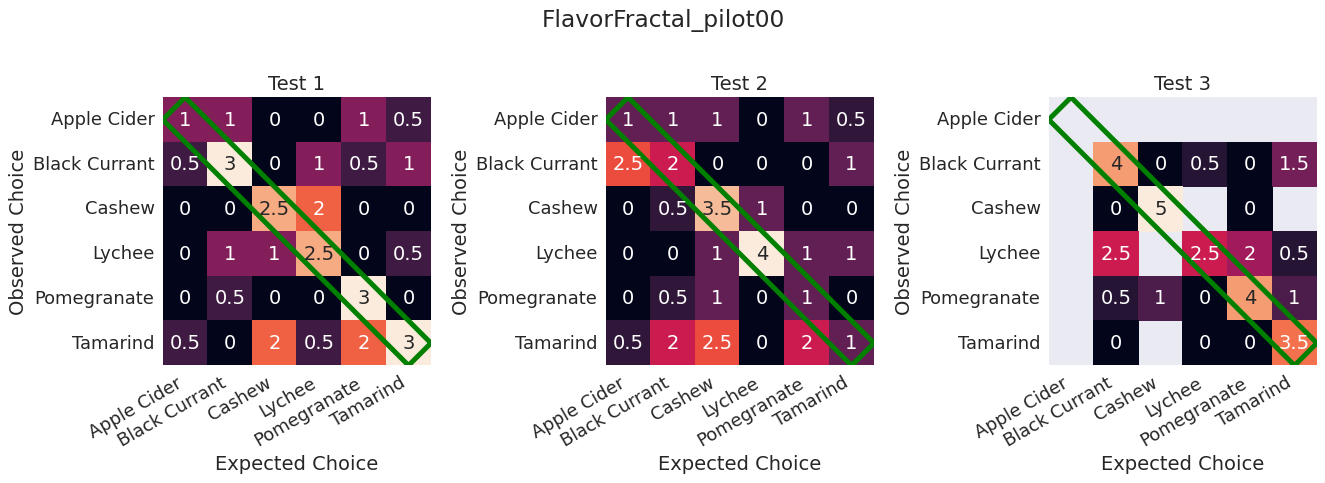

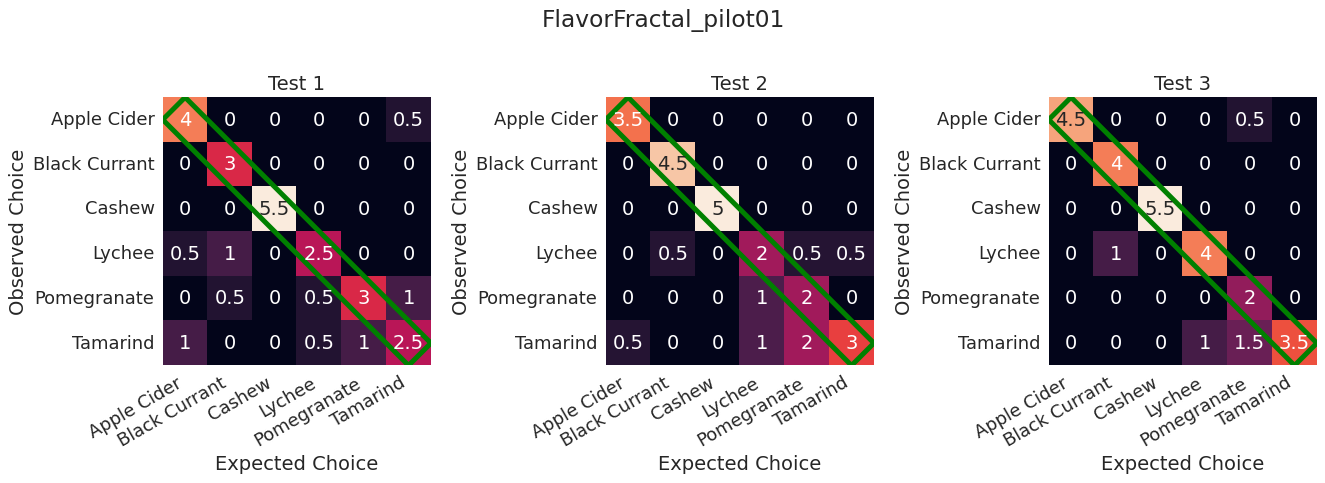

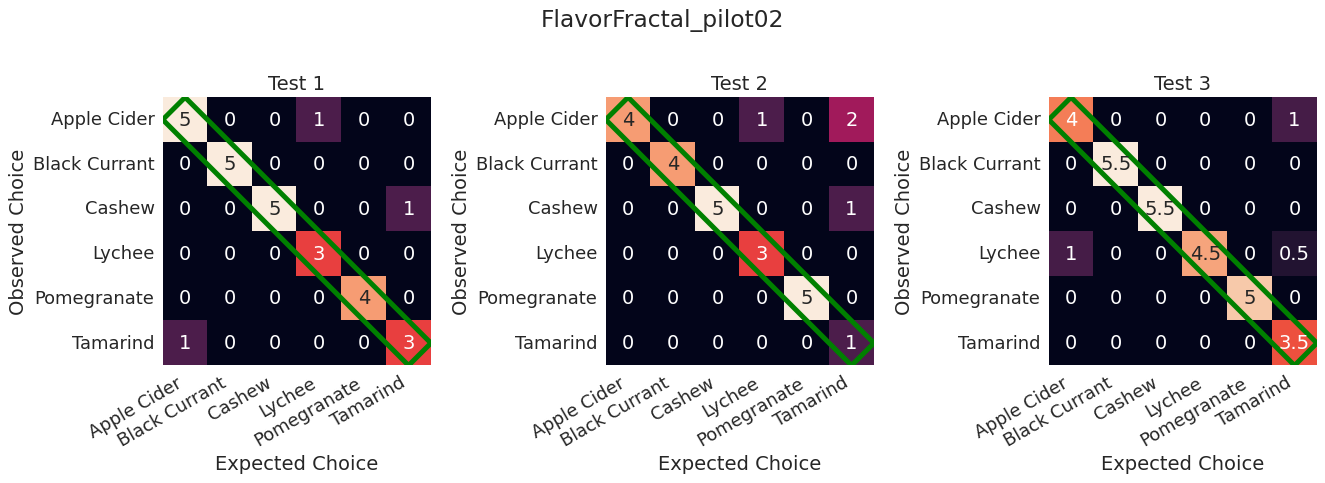

In [ ]:
flavor_labels = list(flavorDecoder.keys())
confusionMatrix_plot(conf_dic, 'Flavor', flavor_labels, '{}confusionMatrix_flavor_allSubjects'.format(figureFolder_path))

###### Fractal

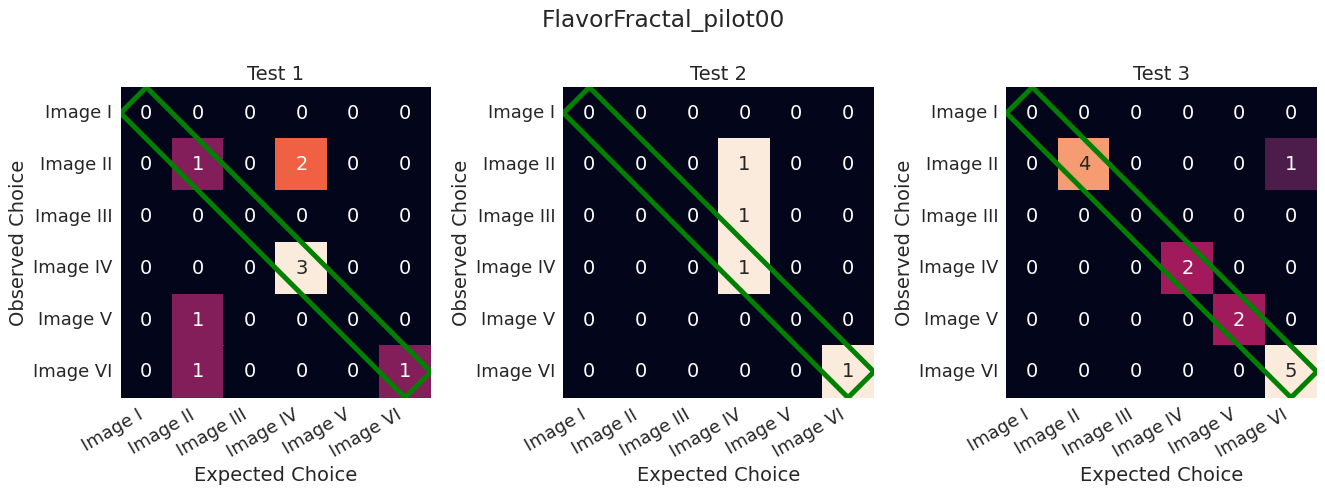

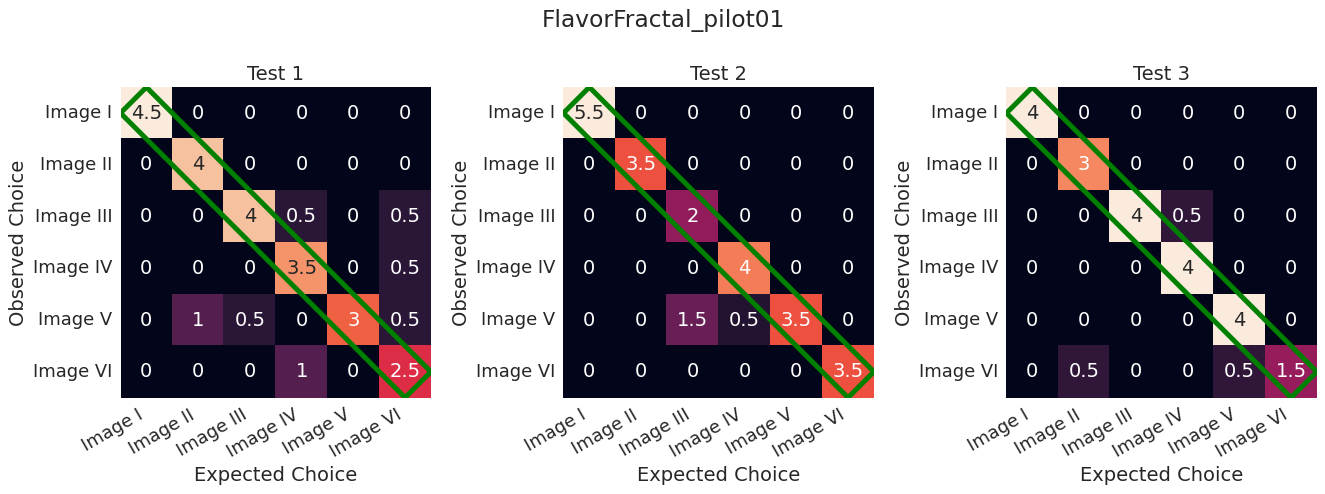

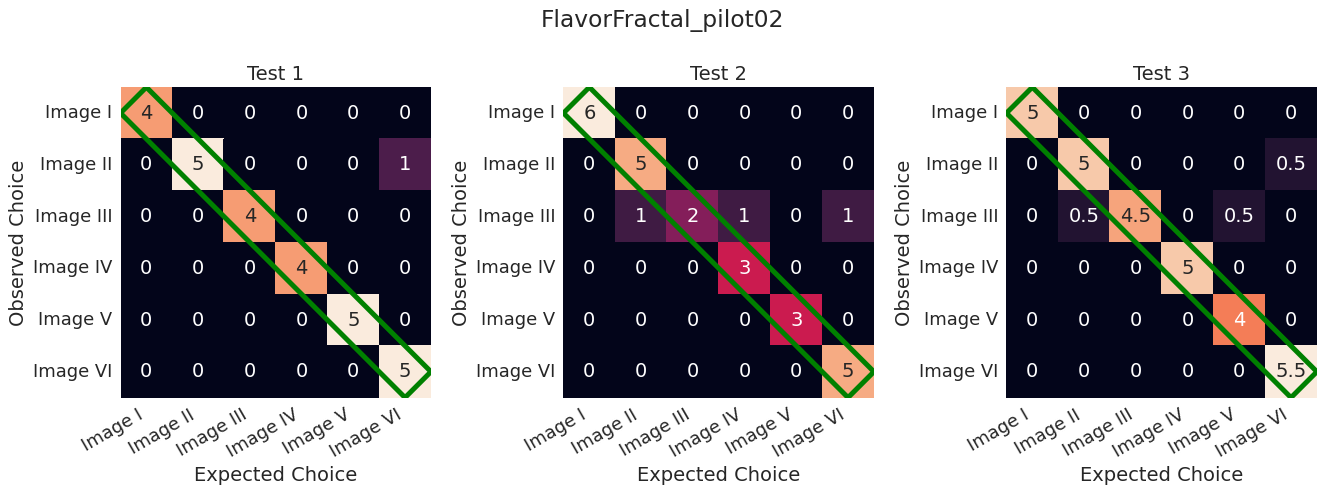

In [ ]:
fractal_labels = ['Image {}'.format(p) for p in list(fractalCoord_Decoder.keys())]
confusionMatrix_plot(conf_dic, 'Fractal', fractal_labels, '{}confusionMatrix_fractal_allSubjects'.format(figureFolder_path))

###### Order



```
order_labels = ['First', 'Second', 'Third', 'Forth', 'Fith', 'Sixth']
confusionMatrix_plot(conf_dic, 'Order', order_labels, 'confusionMatrix_order_allSubjects')
```



##### Subjects who completed the full protocol

In [ ]:
conf_df = confusion_matrix_df[confusion_matrix_df['subject_id'].isin(list(fullProtocol_subjects))]

conf_dic = {}
for experiment_id in conf_df['experiment_id'].dropna().unique():
  df = conf_df[conf_df['experiment_id'] == experiment_id]
  conf_dic[experiment_id] = get_subConfidenceMatrix(df, subject_col = 'subject_id')

###### Flavor

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


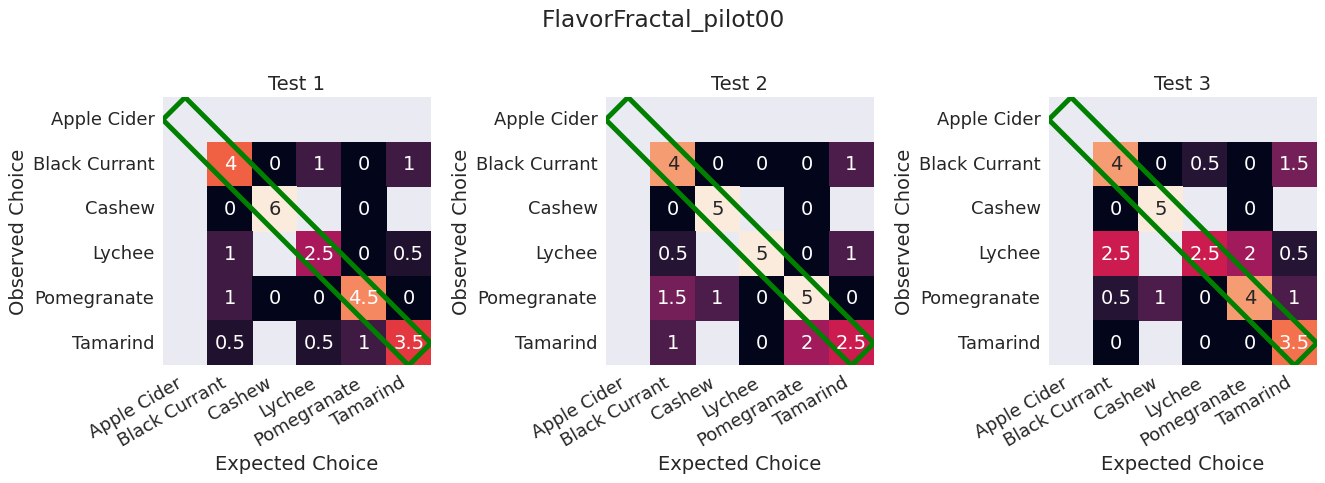

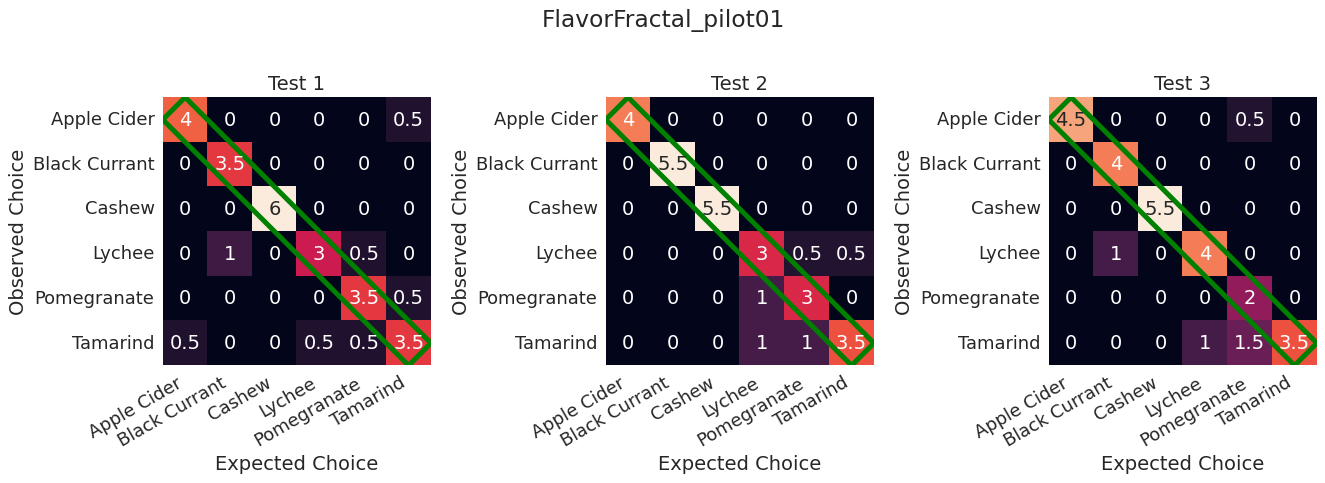

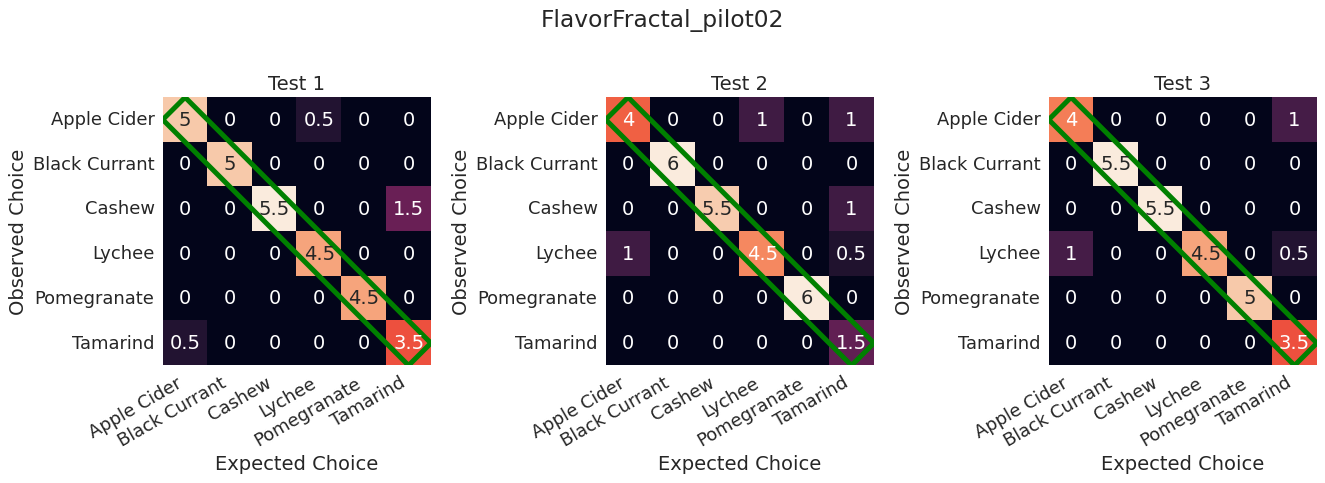

In [ ]:
flavor_labels = list(flavorDecoder.keys())
confusionMatrix_plot(conf_dic, 'Flavor', flavor_labels, '{}confusionMatrix_flavor_fullProtocol'.format(figureFolder_path))

###### Fractal

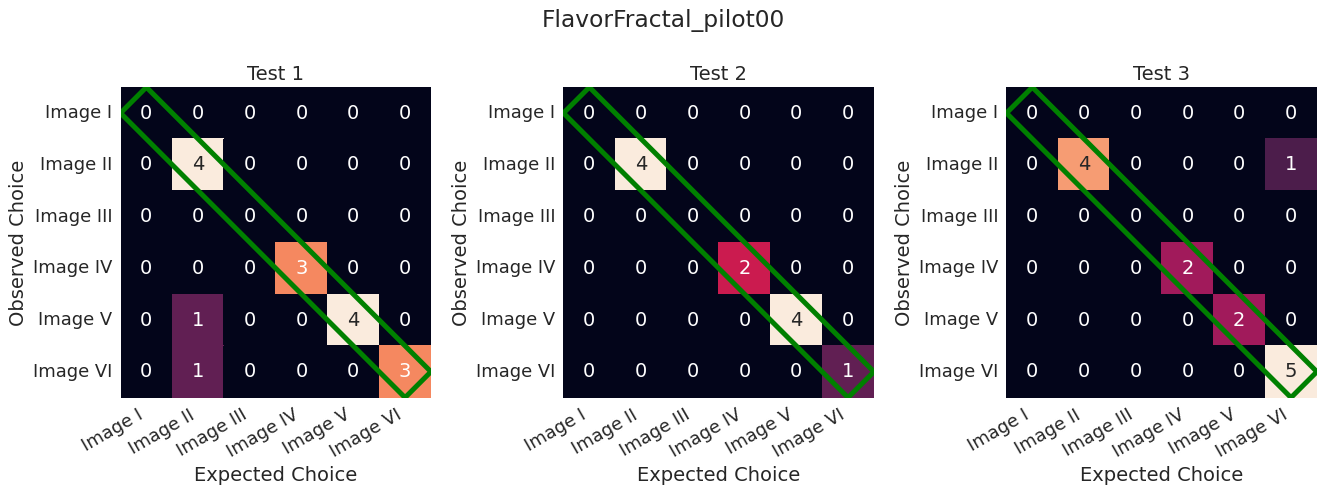

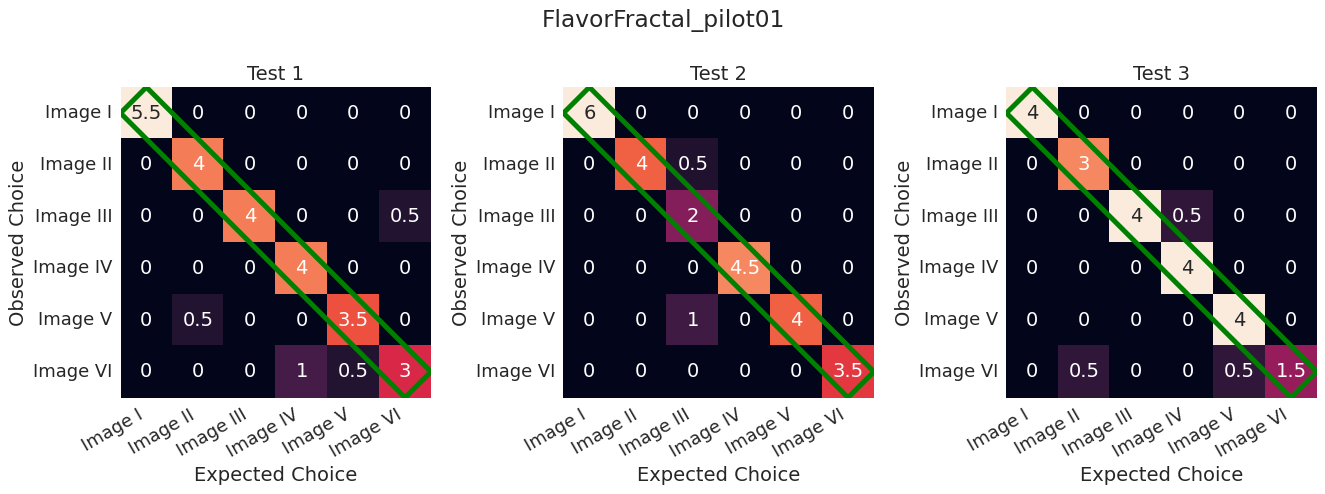

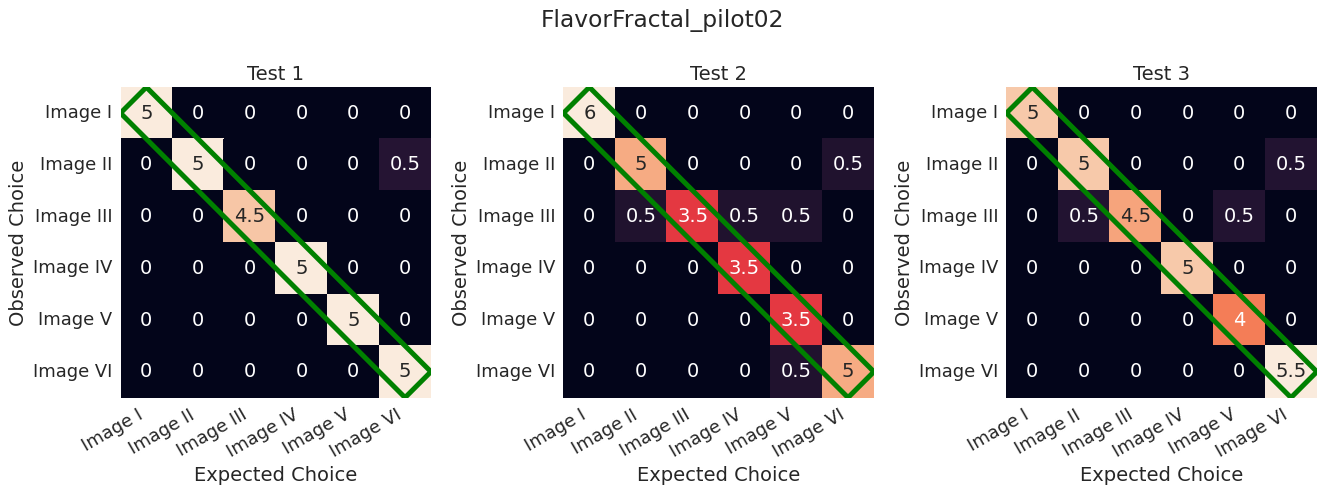

In [ ]:
fractal_labels = ['Image {}'.format(p) for p in list(fractalCoord_Decoder.keys())]
confusionMatrix_plot(conf_dic, 'Fractal', fractal_labels, '{}confusionMatrix_fractal_fullProtocol'.format(figureFolder_path))

###### Order



```
order_labels = ['First', 'Second', 'Third', 'Forth', 'Fith', 'Sixth']
confusionMatrix_plot(conf_dic, 'Order', order_labels, 'confusionMatrix_order_fullProtocol')
```



### Per subject



#### Flavor

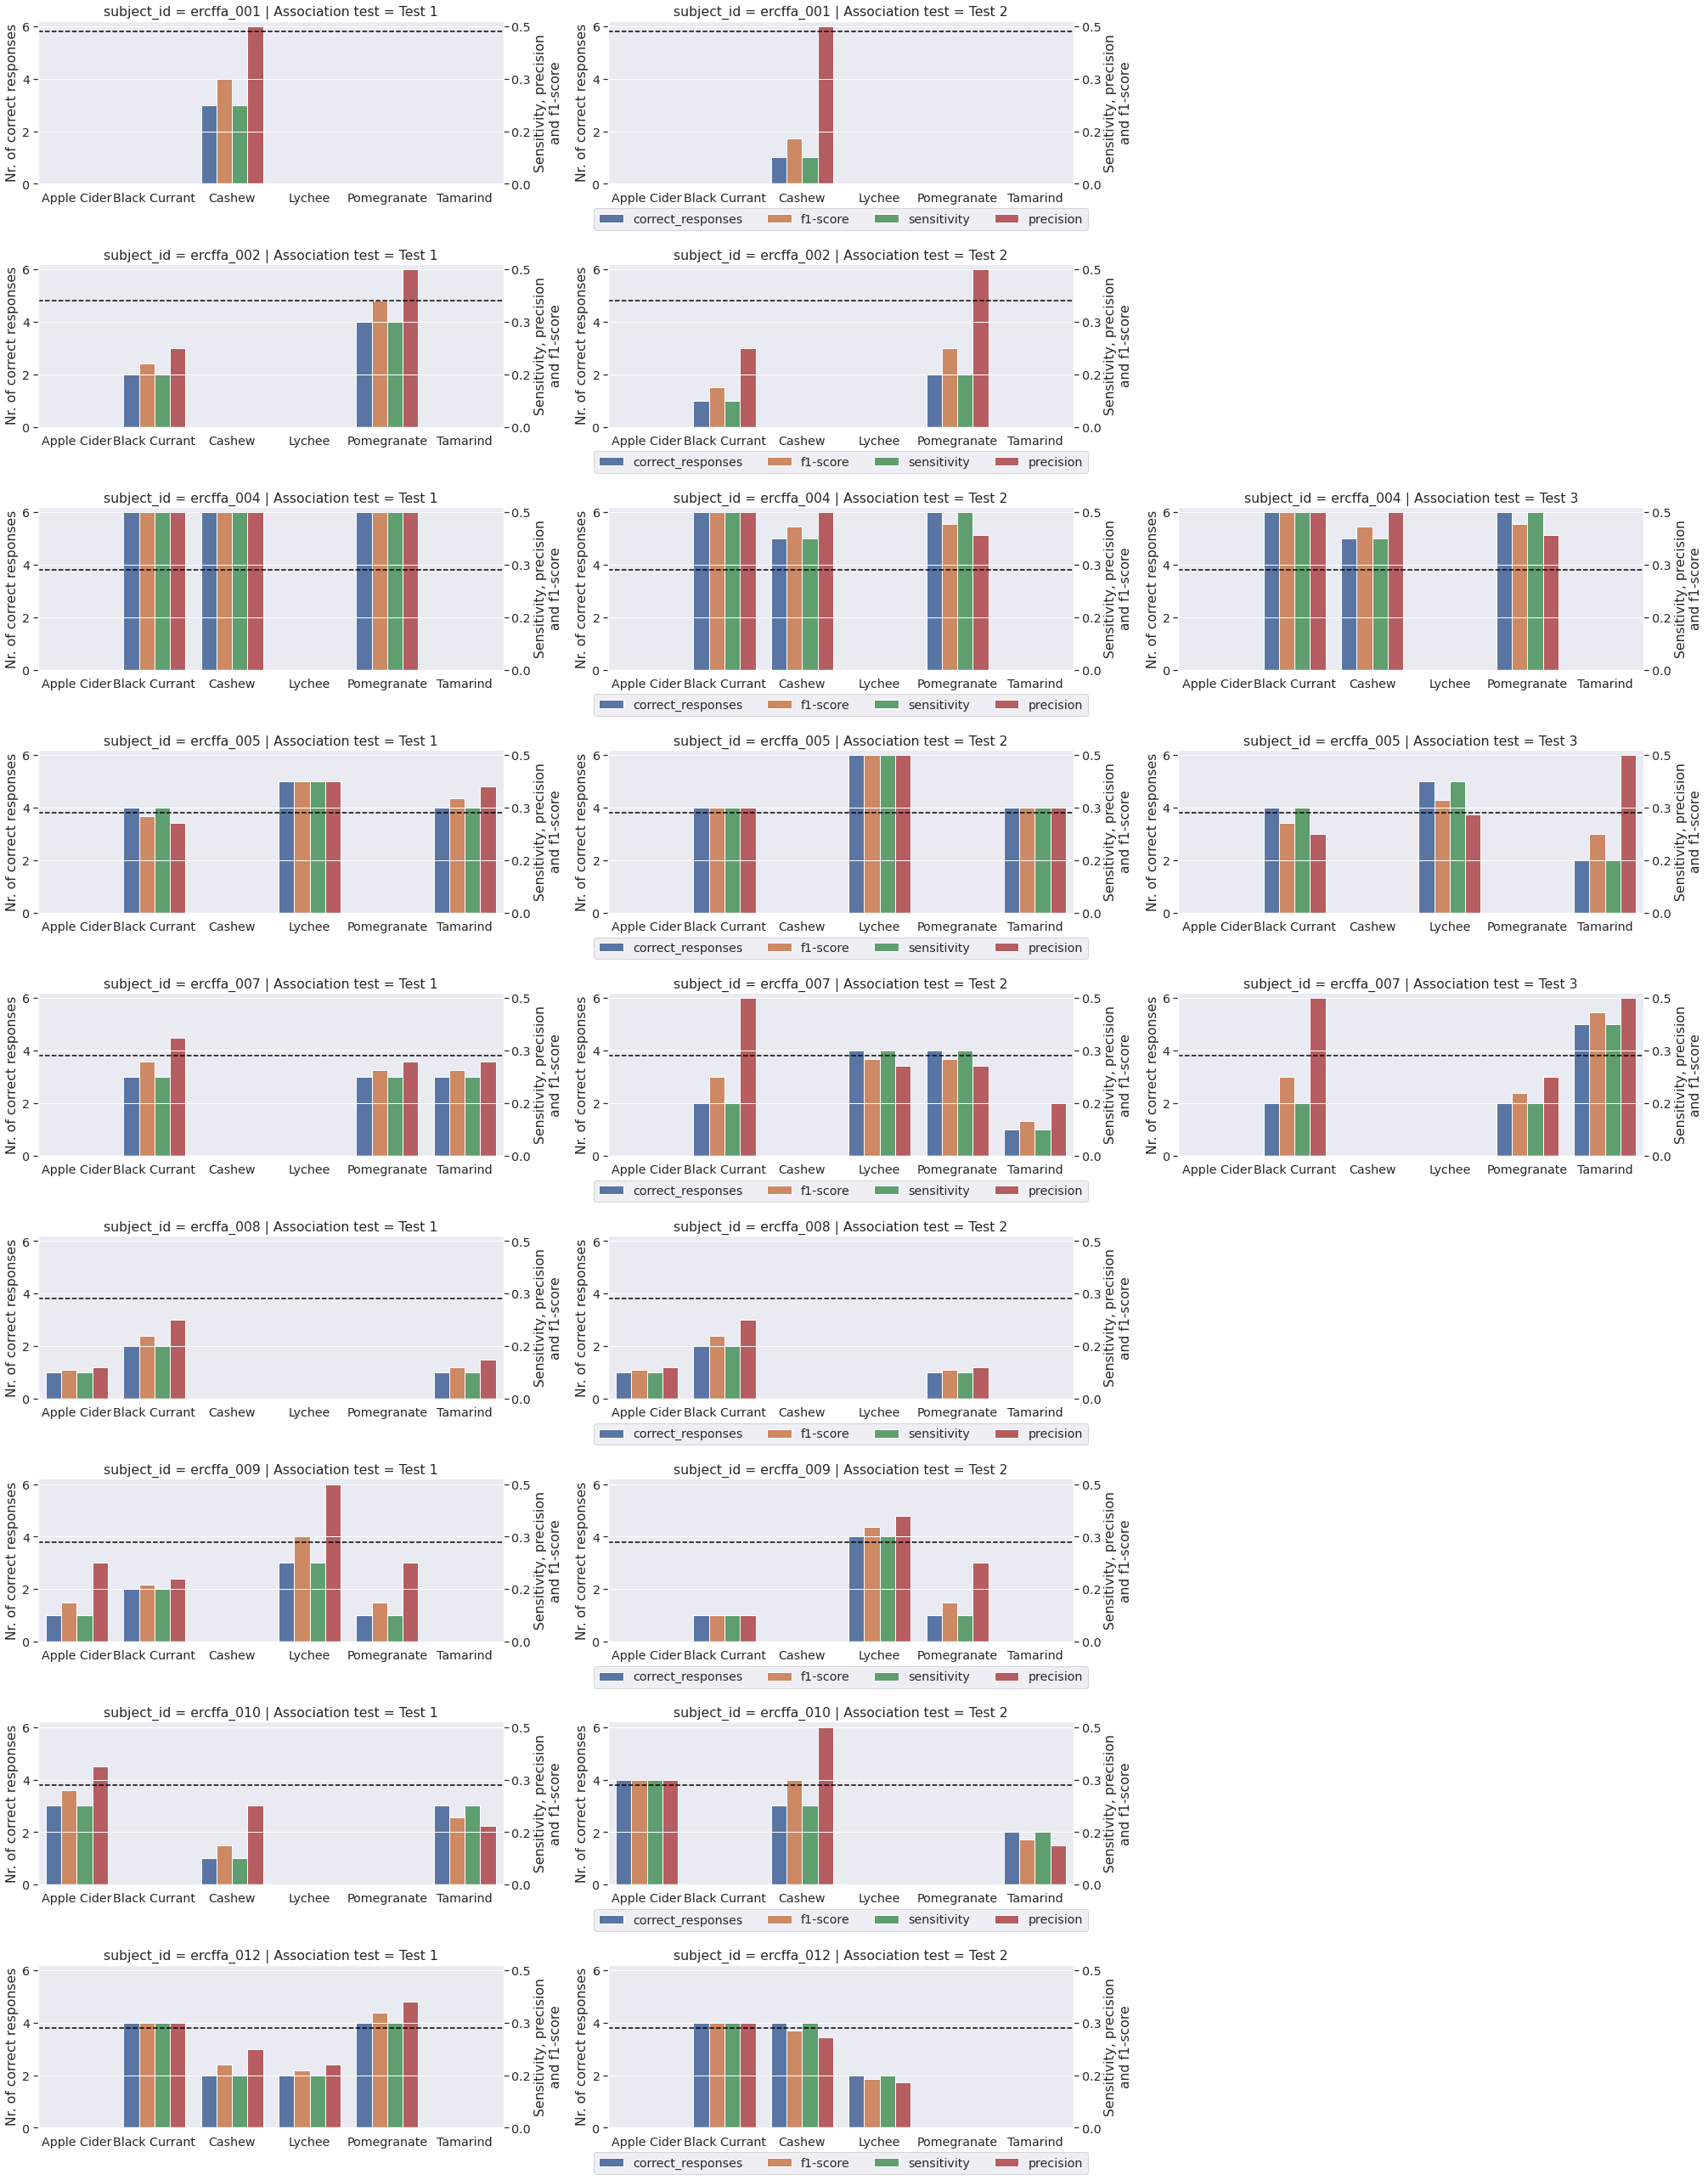

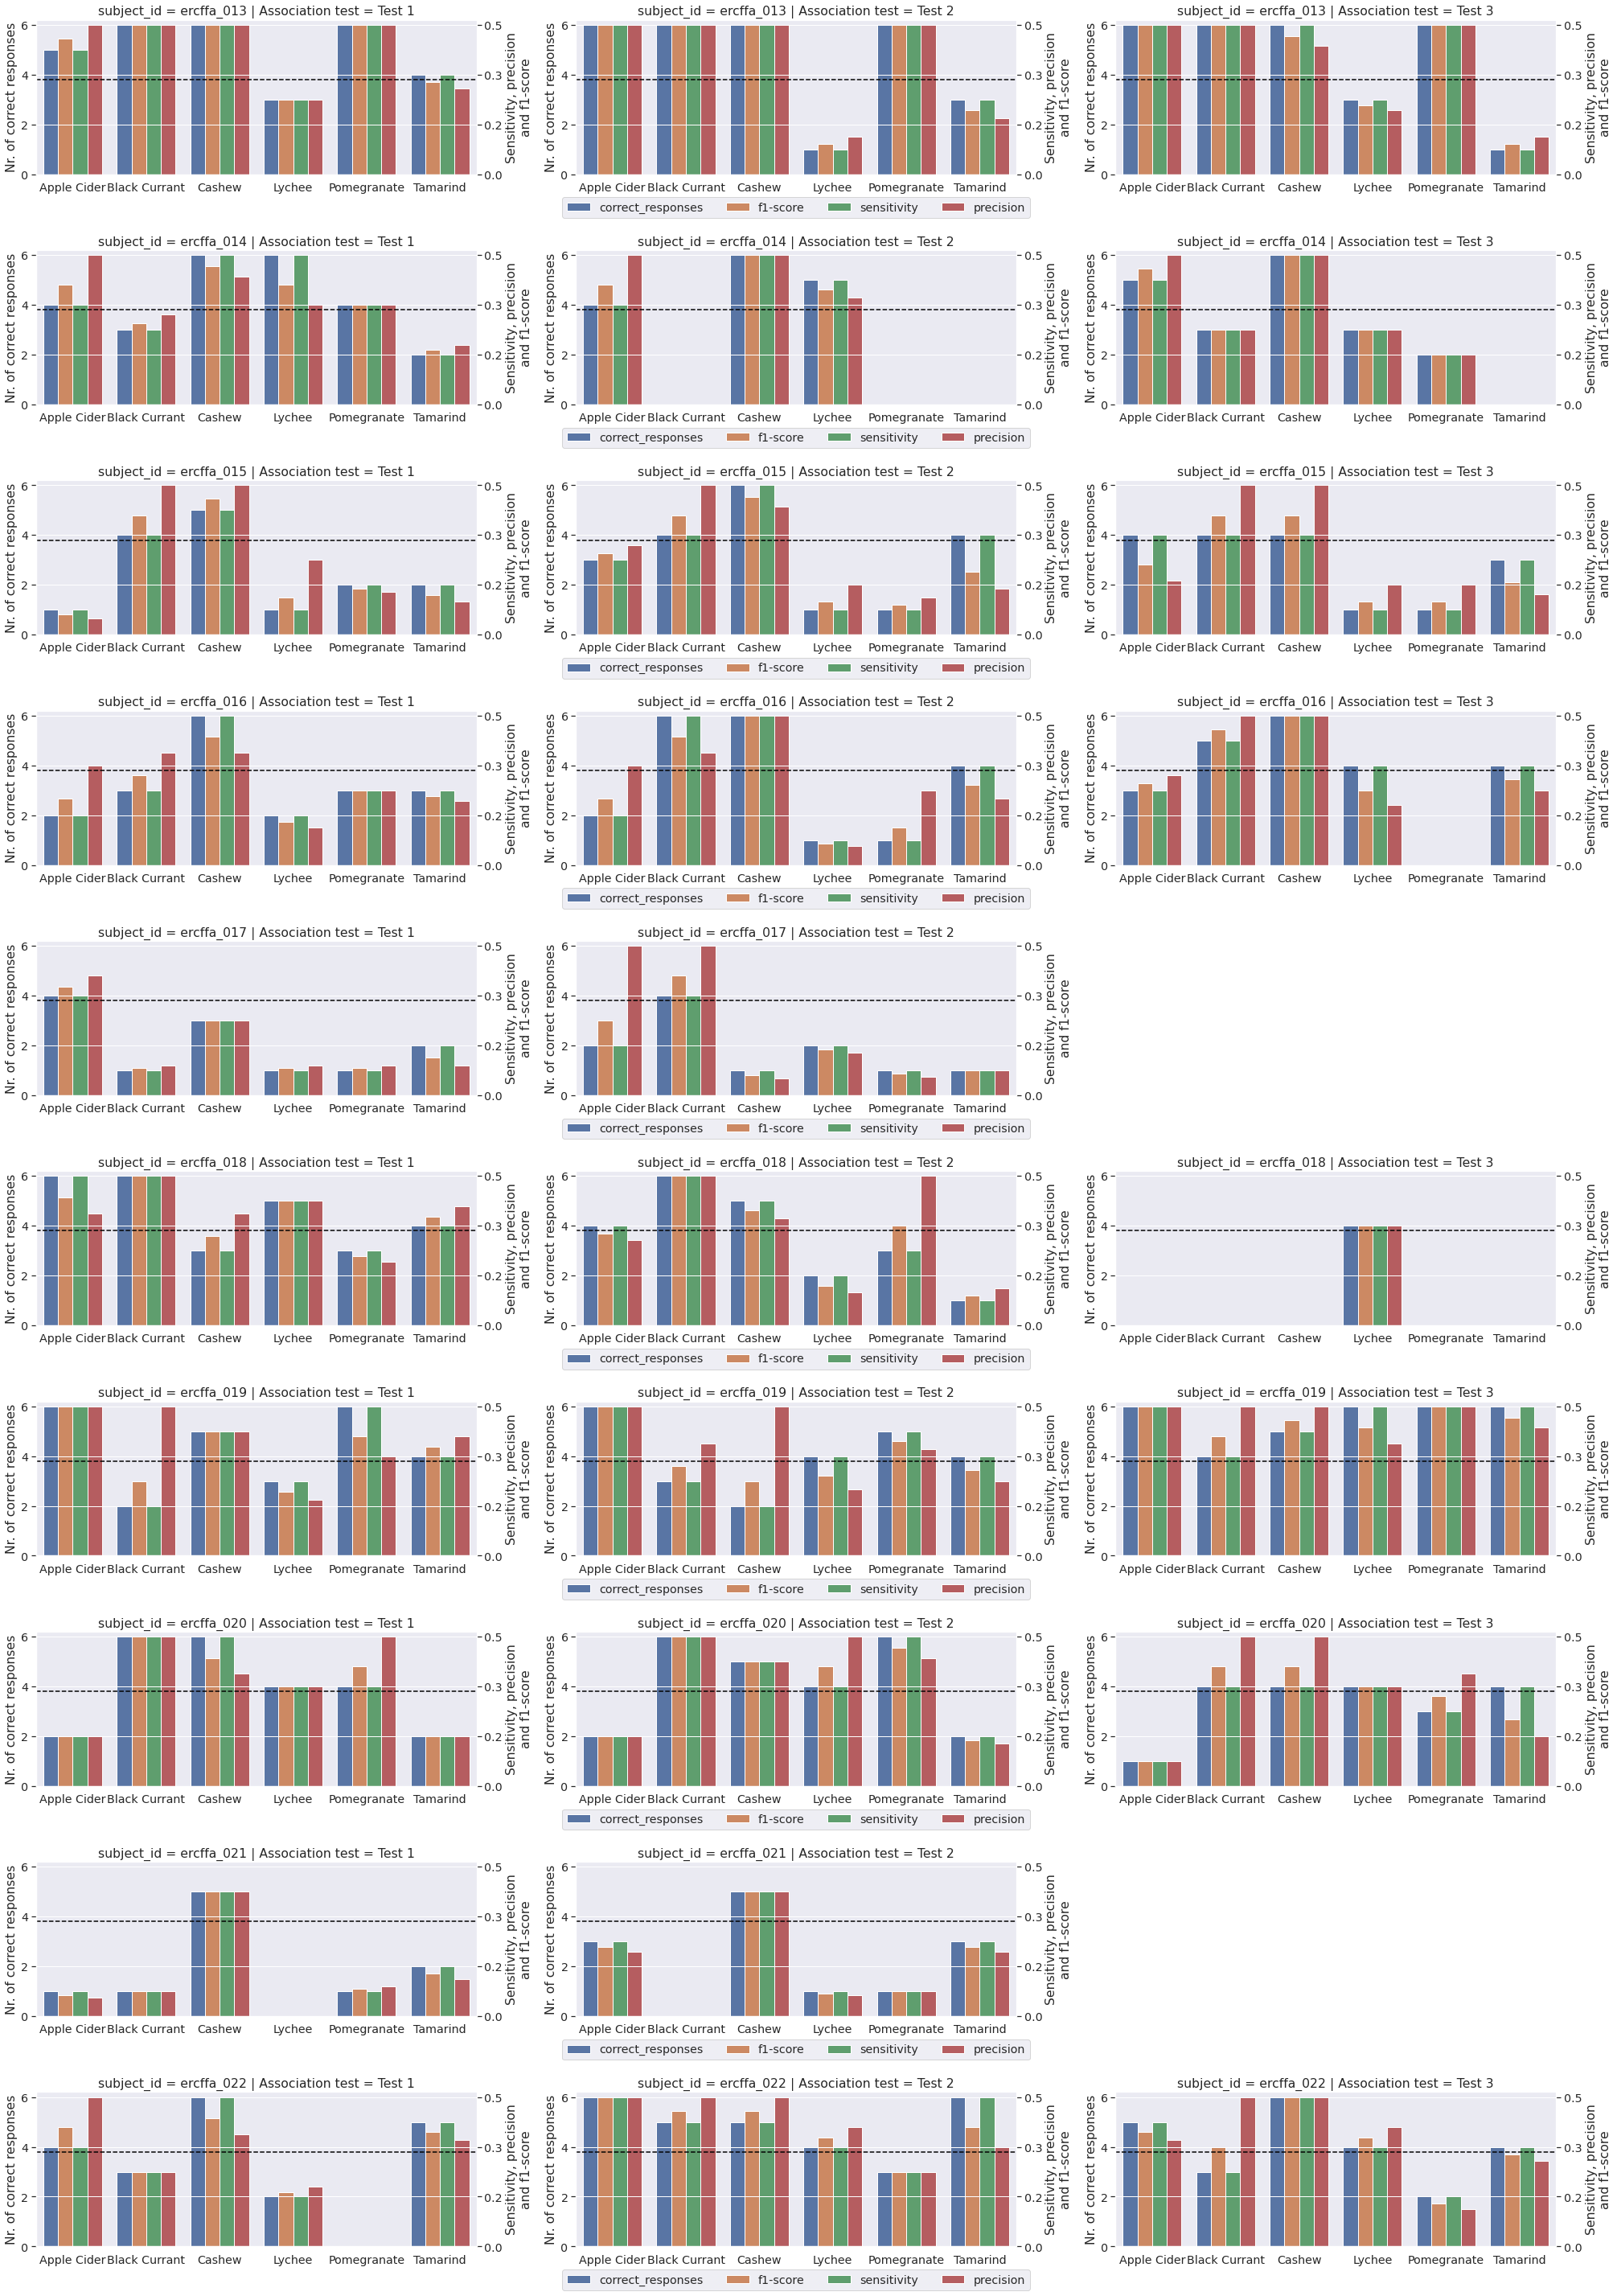

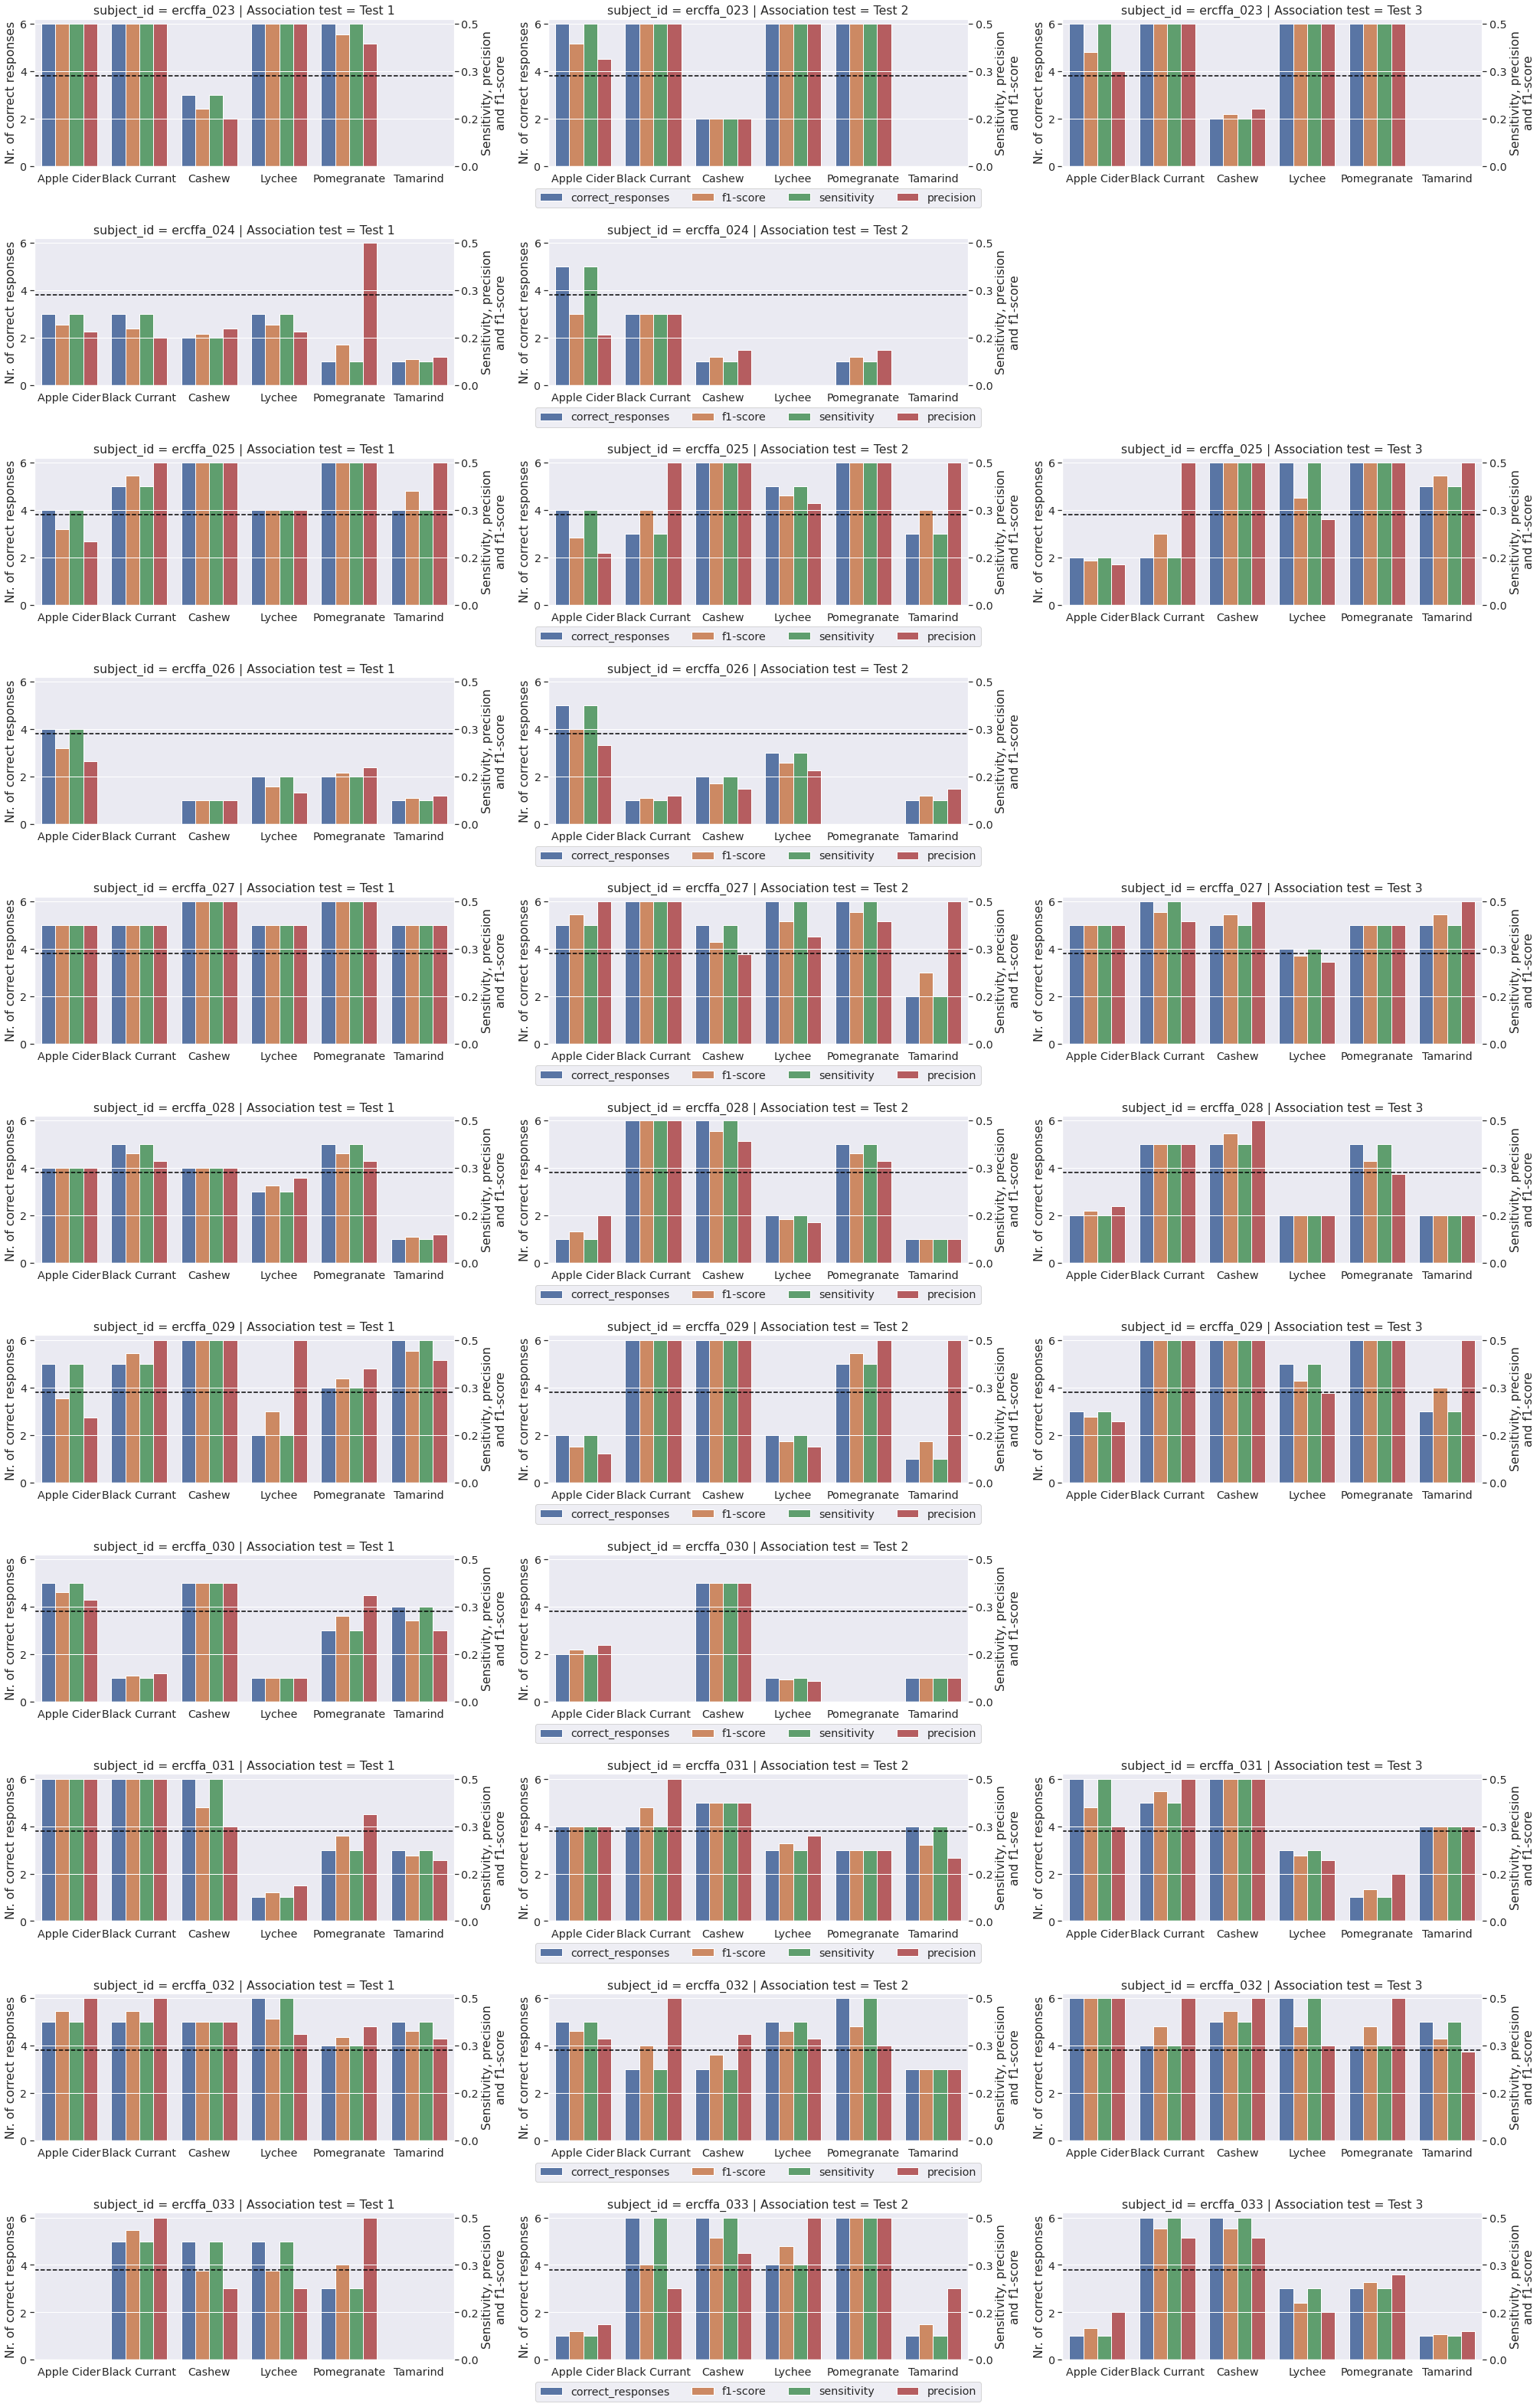

In [ ]:
df_normalized = FlavorFractalAccuracy_df.copy()
for col in col_order[1:]:
  df_normalized[col] = df_normalized[col]*6
dfLong = pd.melt(df_normalized, id_vars=list(set(df_normalized.columns) - set(performance_variables)), 
                               var_name = 'Performance Metric', value_name = 'score')
dfLong = dfLong[dfLong['Performance Metric'] != 'specificity']
c = 0
for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():
  df = dfLong[dfLong['experiment_id'] == experiment_id]

  g = sns.catplot(hue="Performance Metric", y = 'score', 
                  x = 'Flavor', col="Association test", row='subject_id',
                  hue_order = col_order, height = 4, aspect = 2.35, 
                  data=df, kind="bar", sharex = False, sharey = False, ci = None,
                  legend = False) #, height=2.5, aspect=.8)

  for ax in g.axes:
    ax_count = 0
    for ax1 in ax:
      if ax1.get_xlim() == (0,1):
        ax1.remove()
        continue
      ax1.set_ylabel('Nr. of correct responses')
      if ax_count == 1:
        ax1.legend(labels=col_order, loc='upper center',
                   bbox_to_anchor=(0.5, -0.15), ncol=4, borderaxespad=0.)
      ax1.set_ylim(0, 6.2)
      if c < 2:
        ax1.axhline(6-.2,ls='--',c = 'black')
      elif c < 4:
        ax1.axhline(5-.2,ls='--',c = 'black')
      else:
        ax1.axhline(4-.2,ls='--',c = 'black')
      c += 1

      
        
      ax2 = ax1.twinx()
      # Ensure ticks occur at the same positions, then modify labels
      ax2.set_ylim(ax1.get_ylim())
      ax2.set_yticklabels(np.round(ax1.get_yticks()/6,1))
      ax2.set_ylabel('Sensitivity, precision\nand f1-score')
      ax_count += 1
  plt.tight_layout()
  #g.fig.subplots_adjust(top=0.95)
  g.set(xlabel=None)
  #g.fig.suptitle(experiment_id, va = 'bottom')
  g.fig.savefig('{}performanceBarplots_flavor_subjectLevel_{}.pdf'.format(figureFolder_path,experiment_id), bbox_inches='tight')

#### Fractal

In [ ]:
df_normalized['Fractal'].unique()

array([nan, 'IV', 'I', 'V', 'VI', 'III', 'II'], dtype=object)

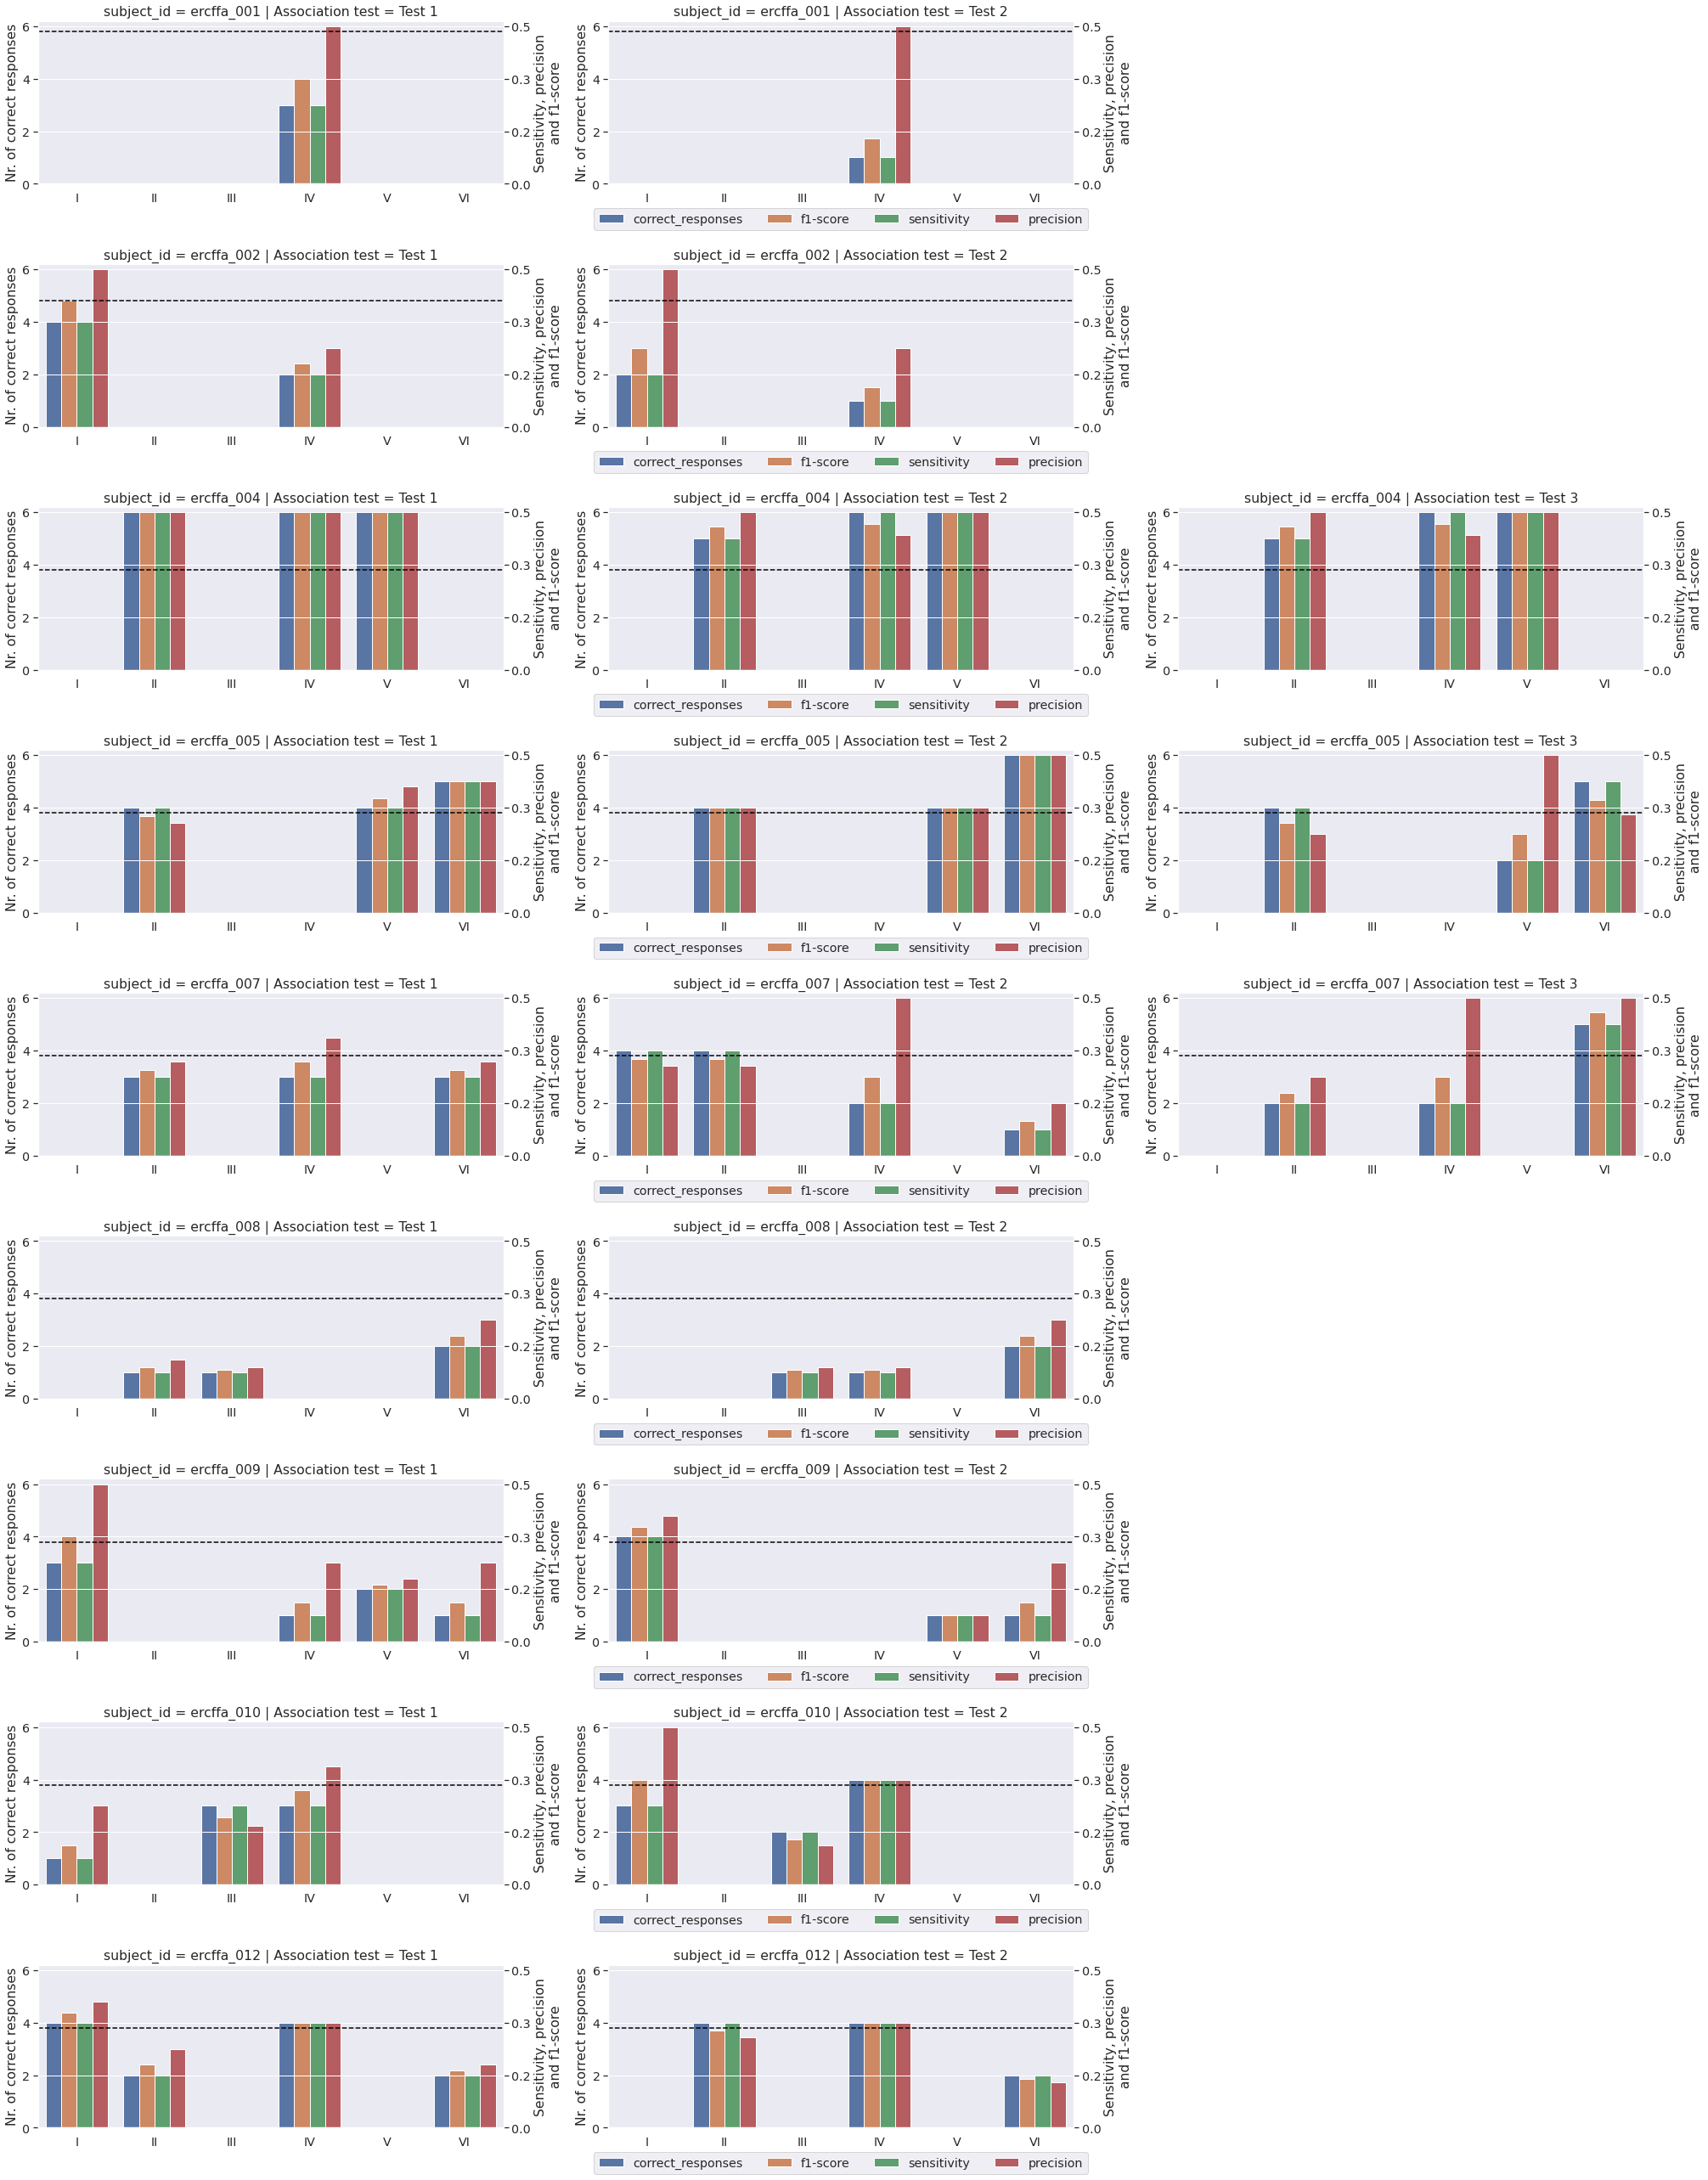

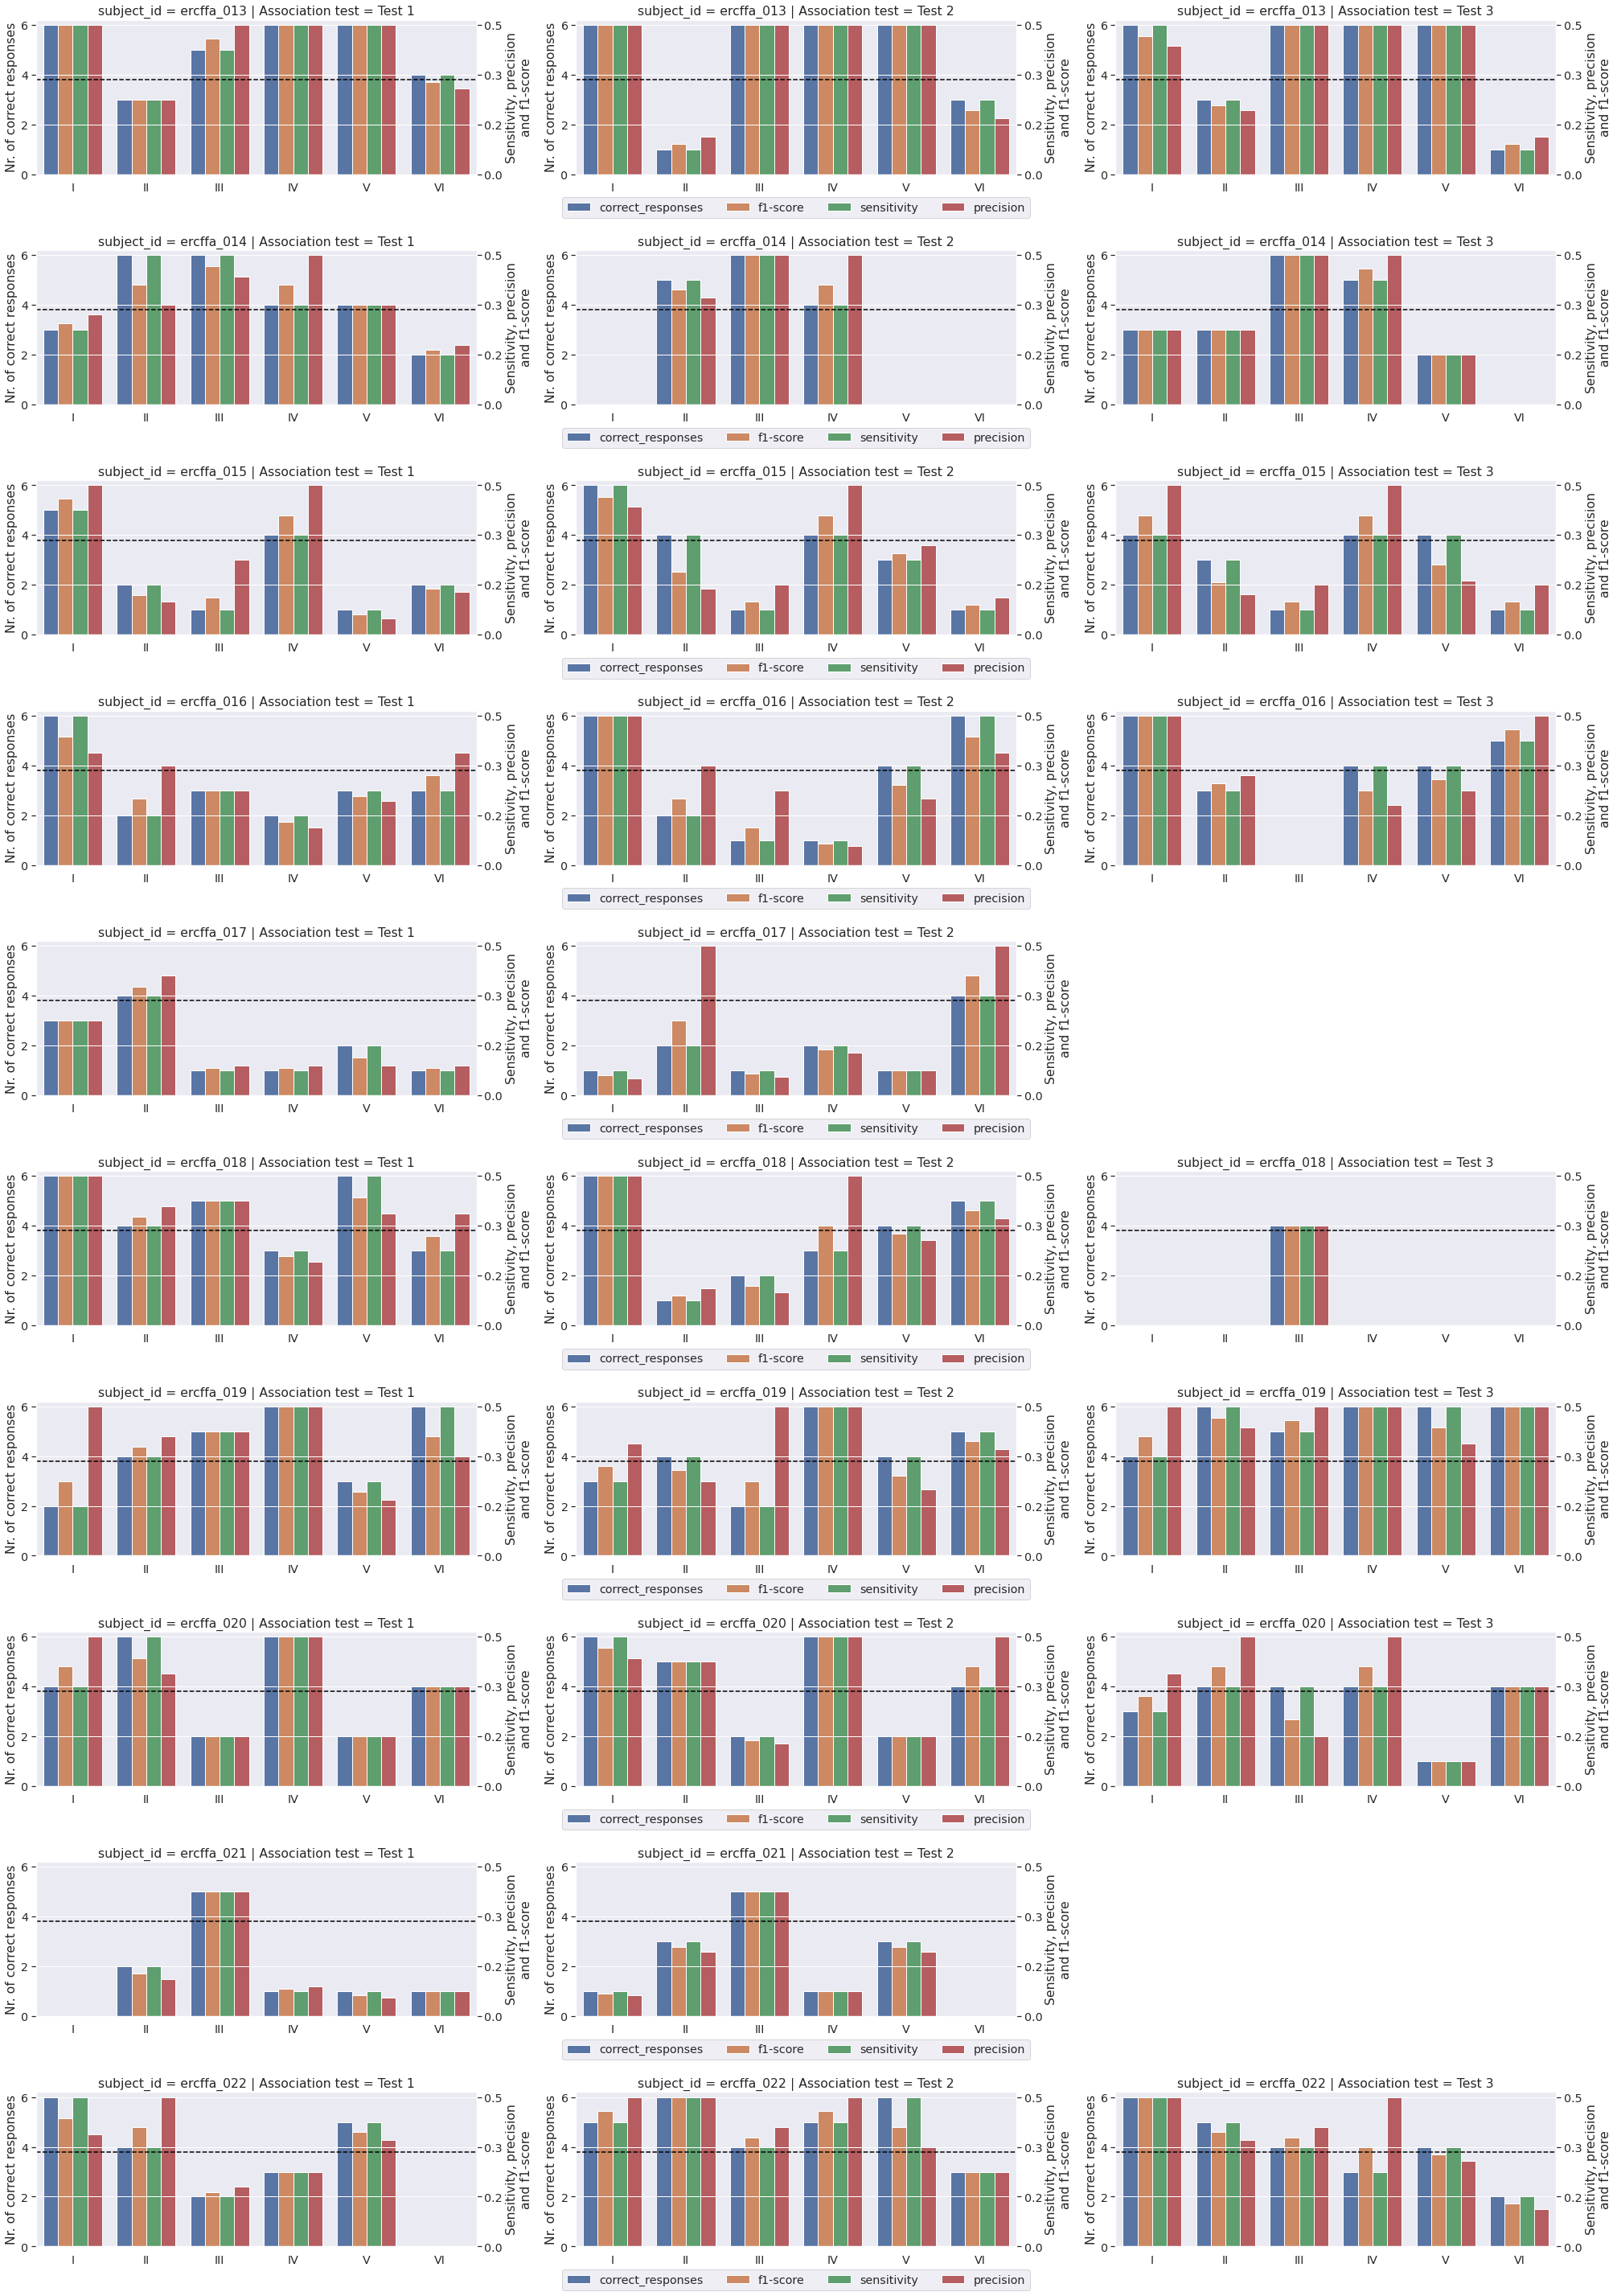

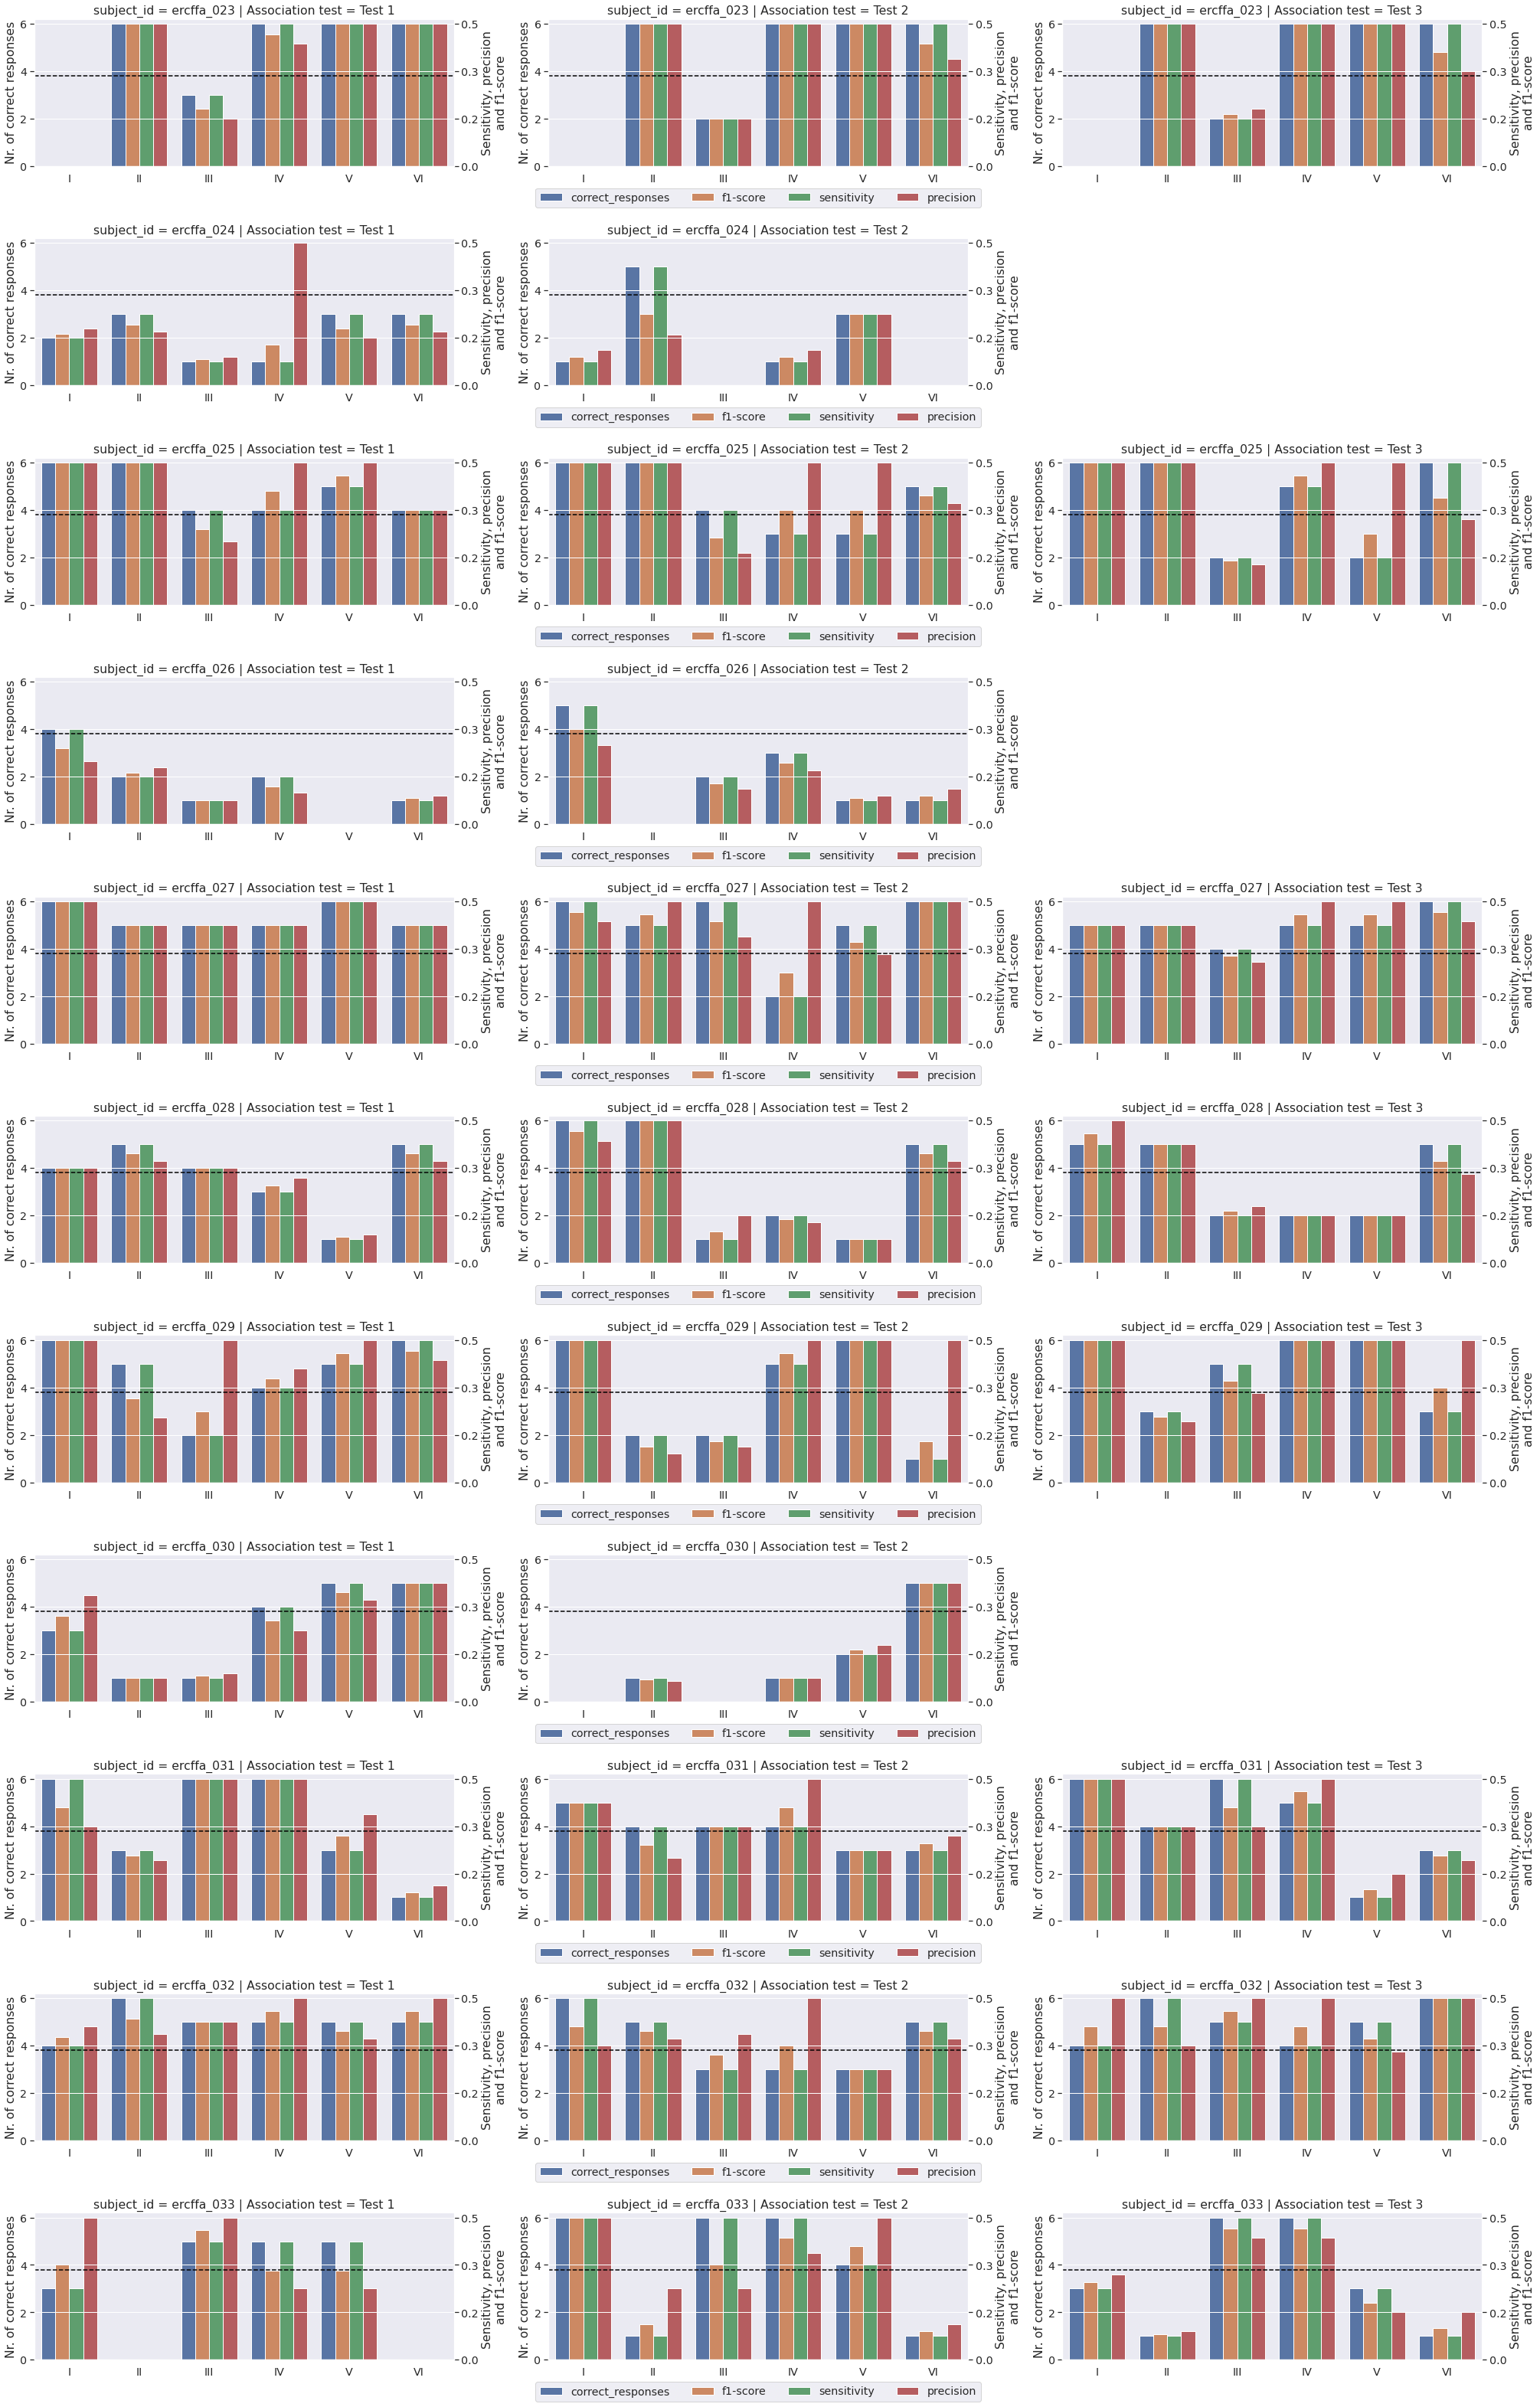

In [ ]:
df_normalized = FlavorFractalAccuracy_df.copy()
for col in col_order[1:]:
  df_normalized[col] = df_normalized[col]*6
dfLong = pd.melt(df_normalized, id_vars=list(set(df_normalized.columns) - set(performance_variables)), 
                               var_name = 'Performance Metric', value_name = 'score')
dfLong = dfLong[dfLong['Performance Metric'] != 'specificity']
c = 0
for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():
  df = dfLong[dfLong['experiment_id'] == experiment_id]

  g = sns.catplot(hue="Performance Metric", y = 'score', 
                  x = 'Fractal', col="Association test", row='subject_id',
                  order = ['I', 'II', 'III', 'IV', 'V', 'VI'],
                  hue_order = col_order, height = 4, aspect = 2.35, 
                  data=df, kind="bar", sharex = False, sharey = False, ci = None,
                  legend = False) #, height=2.5, aspect=.8)

  for ax in g.axes:
    ax_count = 0
    for ax1 in ax:
      if ax1.get_xlim() == (0,1):
        ax1.remove()
        continue
      ax1.set_ylabel('Nr. of correct responses')
      if ax_count == 1:
        ax1.legend(labels=col_order, loc='upper center',
                   bbox_to_anchor=(0.5, -0.15), ncol=4, borderaxespad=0.)
      ax1.set_ylim(0, 6.2)
      if c < 2:
        ax1.axhline(6-.2,ls='--',c = 'black')
      elif c < 4:
        ax1.axhline(5-.2,ls='--',c = 'black')
      else:
        ax1.axhline(4-.2,ls='--',c = 'black')
      c += 1

      
        
      ax2 = ax1.twinx()
      # Ensure ticks occur at the same positions, then modify labels
      ax2.set_ylim(ax1.get_ylim())
      ax2.set_yticklabels(np.round(ax1.get_yticks()/6,1))
      ax2.set_ylabel('Sensitivity, precision\nand f1-score')
      ax_count += 1
  plt.tight_layout()
  #g.fig.subplots_adjust(top=0.95)
  g.set(xlabel=None)
  #g.fig.suptitle(experiment_id, va = 'bottom')
  g.fig.savefig('{}performanceBarplots_fractal_subjectLevel_{}.pdf'.format(figureFolder_path,experiment_id), bbox_inches='tight')

## How many subjects worsten their performance in the 3rd Association Test?

In [ ]:
subset_df = FlavorFractalAccuracy_df[FlavorFractalAccuracy_df['subject_id'].isin(fullProtocol_subjects)].drop_duplicates(subset = ['subject_id', 'Flavor', 'Association test'])[['experiment_id', 'subject_id', 'Association test', 'Flavor', 'correct_responses']]
subset_df = subset_df.dropna(subset = ['correct_responses']).pivot(index= ['experiment_id', 'subject_id', 'Flavor'], columns = ['Association test']).droplevel(0,axis = 1).reset_index()
subset_df = subset_df[subset_df['experiment_id'] != 'FlavorFractal_pilot00'].reset_index(drop = True)
subset_df.columns.name = None
subset_df[["Test 1", "Test 2", "Test 3"]] = subset_df[["Test 1", "Test 2", "Test 3"]].apply(pd.to_numeric)



```
def getSubjectEvolution(row):
  if max(int(row['Test 1']), int(row['Test 2'])) > int(row['Test 3']):
    nextDay_performance = 'worse'
  elif max(int(row['Test 1']), int(row['Test 2'])) < int(row['Test 3']):
    nextDay_performance = 'better'
  else:
    nextDay_performance = 'equal'
  return nextDay_performance

subset_df['Flavor performance'] = subset_df.apply(lambda row: getSubjectEvolution(row), axis = 1)
```



### Barplots with performance evolution

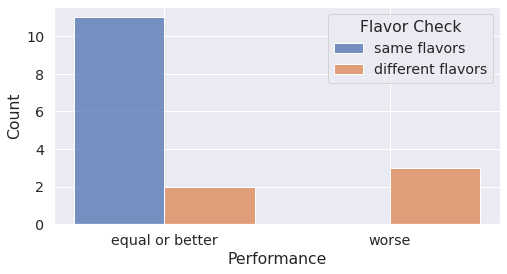

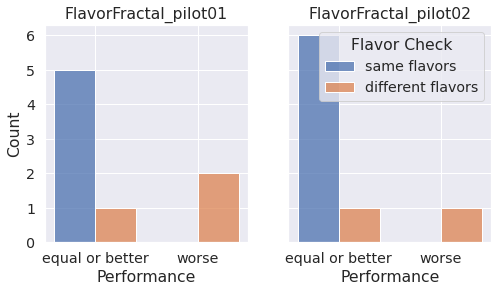

In [108]:
def getNassociatedFlavors(g):
  return pd.Series((len(g[g['Test 1'] >= 4]), len(g[g['Test 2'] >= 4]), len(g[g['Test 3'] >= 4])), index = ['N associations 1', 'N associations 2', 'N associations 3'])

subset_df_group = subset_df.groupby(['experiment_id','subject_id']).apply(lambda g: getNassociatedFlavors(g))

def getSubjectMeanEvolution(row):
  if min(int(row['N associations 1']), int(row['N associations 2'])) > int(row['N associations 3']):
    nextDay_performance = 'worse'
  elif min(int(row['N associations 1']), int(row['N associations 2'])) <= int(row['N associations 3']):
    nextDay_performance = 'equal or better'
  return nextDay_performance

subset_df_group['Performance'] = subset_df_group.apply(lambda row: getSubjectMeanEvolution(row), axis = 1)

def checkFlavorList(g):  
  if len(g[g['Test 1'] >= 4]) < len(g[g['Test 2'] >= 4]):
    tmp = g[g['Test 1'] >= 4]
  else:
    tmp = g[g['Test 2'] >= 4]

  tmp_flavors1 = list(tmp['Flavor'])
  tmp_flavors1.sort()
  tmp_flavors2 = list(g[g['Test 3'] >= 4]['Flavor'])
  tmp_flavors2.sort()
  if all(elem in tmp_flavors2  for elem in tmp_flavors1):
    return 'same flavors'
  else:
    return 'different flavors'
  
subset_df_group['Flavor Check'] = subset_df.groupby(['experiment_id','subject_id']).apply(lambda g: checkFlavorList(g))

fig, ax = plt.subplots(ncols = 1, figsize = [8,4])
sns.histplot(x = 'Performance', data = subset_df_group, hue="Flavor Check", shrink=.8,  multiple="dodge", ax = ax)

fig.savefig('{}day1VSday2Barplot_allSubjects.pdf'.format(figureFolder_path), bbox_inches='tight')

fig, ax = plt.subplots(ncols = 2, figsize = [8,4], sharey = True)
sns.histplot(x = 'Performance', data = subset_df_group[subset_df_group.index.get_level_values('experiment_id') == 'FlavorFractal_pilot01'], hue="Flavor Check", shrink=.8,  multiple="dodge", ax = ax[0], legend = False)
ax[0].set_title('FlavorFractal_pilot01');
sns.histplot(x = 'Performance', data = subset_df_group[subset_df_group.index.get_level_values('experiment_id') == 'FlavorFractal_pilot02'], hue="Flavor Check", shrink=.8,  multiple="dodge", ax = ax[1])
ax[1].set_title('FlavorFractal_pilot02');

fig.savefig('{}day1VSday2Barplot_byExperiment.pdf'.format(figureFolder_path), bbox_inches='tight')

In [ ]:
subset_df_group.reset_index().merge(subset_df, left_on=['experiment_id', 'subject_id'], right_on=['experiment_id', 'subject_id'])

experiment_id  subject_id  N associations 1  N associations 2  \
0   FlavorFractal_pilot01  ercffa_013                 5                 4   
1   FlavorFractal_pilot01  ercffa_013                 5                 4   
2   FlavorFractal_pilot01  ercffa_013                 5                 4   
3   FlavorFractal_pilot01  ercffa_013                 5                 4   
4   FlavorFractal_pilot01  ercffa_013                 5                 4   
..                    ...         ...               ...               ...   
91  FlavorFractal_pilot02  ercffa_033                 3                 4   
92  FlavorFractal_pilot02  ercffa_033                 3                 4   
93  FlavorFractal_pilot02  ercffa_033                 3                 4   
94  FlavorFractal_pilot02  ercffa_033                 3                 4   
95  FlavorFractal_pilot02  ercffa_033                 3                 4   

    N associations 3      Performance  Flavor Check         Flavor  Test 1  \
0                  4  equal or better          True    Apple Cider       5   
1                  4  equal or better          True  Black Currant       6   
2                  4  equal or better          True         Cashew       6   
3                  4  equal or better          True         Lychee       3   
4                  4  equal or better          True    Pomegranate       6   
..               ...              ...           ...            ...     ...   
91                 2            worse         False  Black Currant       5   
92                 2            worse         False         Cashew       5   
93                 2            worse         False         Lychee       5   
94                 2            worse         False    Pomegranate       3   
95                 2            worse         False       Tamarind       0   

    Test 2  Test 3  
0        6       6  
1        6       6  
2        6       6  
3        1       3  
4        6       6  
..     ...     ...  
91       6       6  
92       6       6  
93       4       3  
94       6       3  
95       1       1  

[96 rows x 11 columns]

## Is there a association between gLMS and gLHS ratings and Accuracy?

### Group-level

In [ ]:
FlavorFractalAccuracy_df

experiment_id  subject_id         Flavor  Intensity  Novelty  \
0    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
1    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
2    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
3    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
4    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
..                     ...         ...            ...        ...      ...   
611                    NaN  ercffa_006  Black Currant        2.0      0.0   
612                    NaN  ercffa_006         Cashew       12.0     18.0   
613                    NaN  ercffa_006         Lychee        2.0      8.0   
614                    NaN  ercffa_006    Pomegranate        7.0      2.0   
615                    NaN  ercffa_006       Tamarind        3.0      7.0   

     Pleasantness Association test Fractal  Order correct_responses  \
0            16.0           Test 1     NaN    NaN               NaN   
1            16.0           Test 1     NaN    NaN               NaN   
2            16.0           Test 1     NaN    NaN               NaN   
3            16.0           Test 1     NaN    NaN               NaN   
4            16.0           Test 2     NaN    NaN               NaN   
..            ...              ...     ...    ...               ...   
611           0.0              NaN     NaN    NaN               NaN   
612         -11.0              NaN     NaN    NaN               NaN   
613          -3.0              NaN     NaN    NaN               NaN   
614          -3.0              NaN     NaN    NaN               NaN   
615           0.0              NaN     NaN    NaN               NaN   

    sensitivity specificity precision f1-score  accuracy  
0           NaN         NaN       NaN      NaN  0.250000  
1           NaN         NaN       NaN      NaN  0.250000  
2           NaN         NaN       NaN      NaN  0.250000  
3           NaN         NaN       NaN      NaN  0.250000  
4           NaN         NaN       NaN      NaN  0.083333  
..          ...         ...       ...      ...       ...  
611         NaN         NaN       NaN      NaN       NaN  
612         NaN         NaN       NaN      NaN       NaN  
613         NaN         NaN       NaN      NaN       NaN  
614         NaN         NaN       NaN      NaN       NaN  
615         NaN         NaN       NaN      NaN       NaN  

[616 rows x 15 columns]

#### Scales per Correct Responses

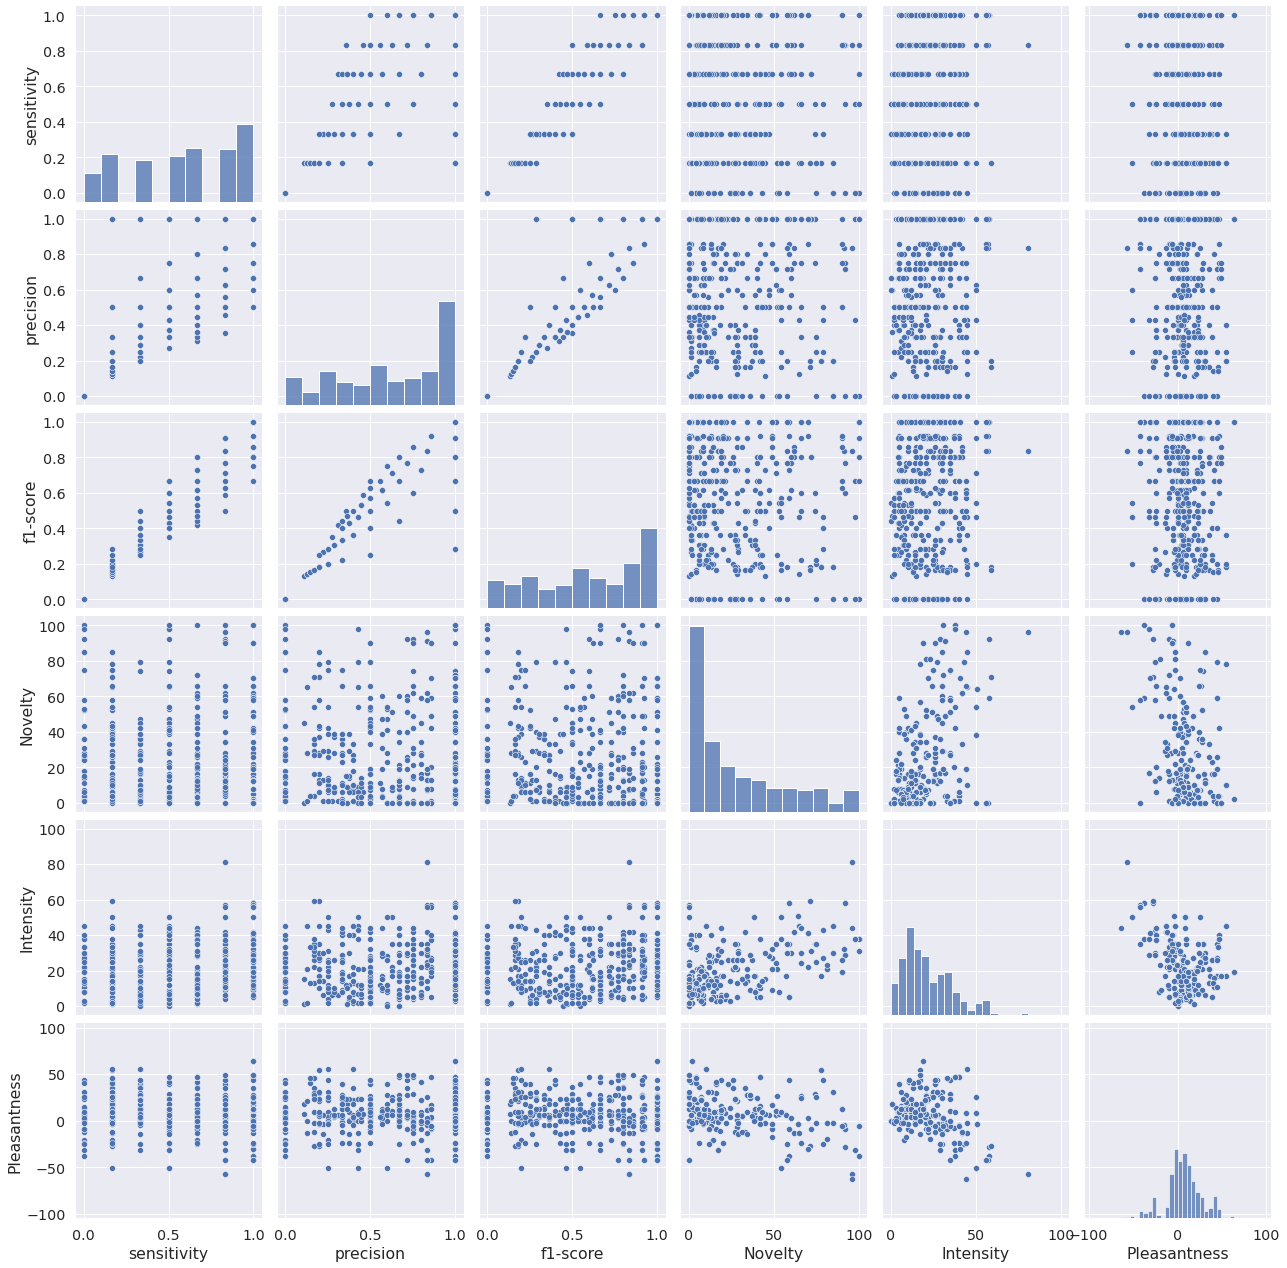

In [86]:
cols = ['experiment_id', 'subject_id', 'Association test', 'Flavor', 'accuracy', 'sensitivity', 'precision', 'f1-score', 'Novelty', 'Intensity', 'Pleasantness']

y_vars = ['Novelty', 'Intensity', 'Pleasantness']
x_vars = ['sensitivity', 'precision', 'f1-score']

df = FlavorFractalAccuracy_df[FlavorFractalAccuracy_df['Flavor'] != 'Plain']

g = sns.pairplot(data = df, vars = x_vars + y_vars, height = 3) #, hue = 'Association test')
for ax in g.axes[-3,:]:
  ax.set_ylim((-5,105))
for ax in g.axes[-2,:]:
  ax.set_ylim((-5,105))
for ax in g.axes[-1,:]:
  ax.set_ylim((-105,105))

for ax in g.axes[:,-3]:
  ax.set_xlim((-5,105))
for ax in g.axes[:,-2]:
  ax.set_xlim((-5,105))
for ax in g.axes[:,-1]:
  ax.set_xlim((-105,105))


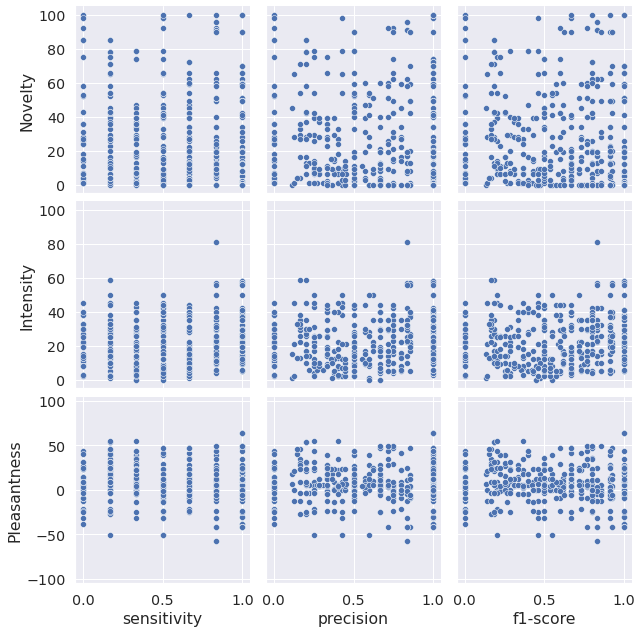

In [89]:

g = sns.pairplot(data = df, x_vars = x_vars, y_vars = y_vars, height = 3) #, hue = 'Association test')
for ax in g.axes[0,:]:
  ax.set_ylim((-5,105))
for ax in g.axes[1,:]:
  ax.set_ylim((-5,105))
for ax in g.axes[2,:]:
  ax.set_ylim((-105,105))

#### Scales per Correct Responses for each Flavor

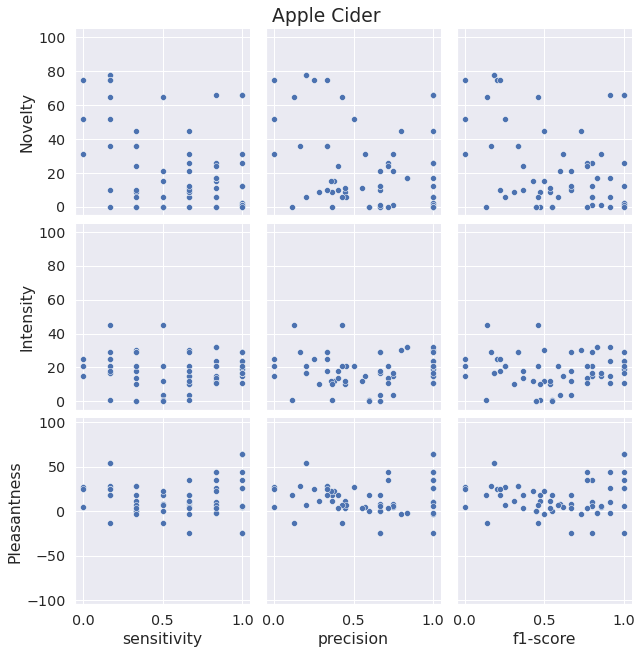

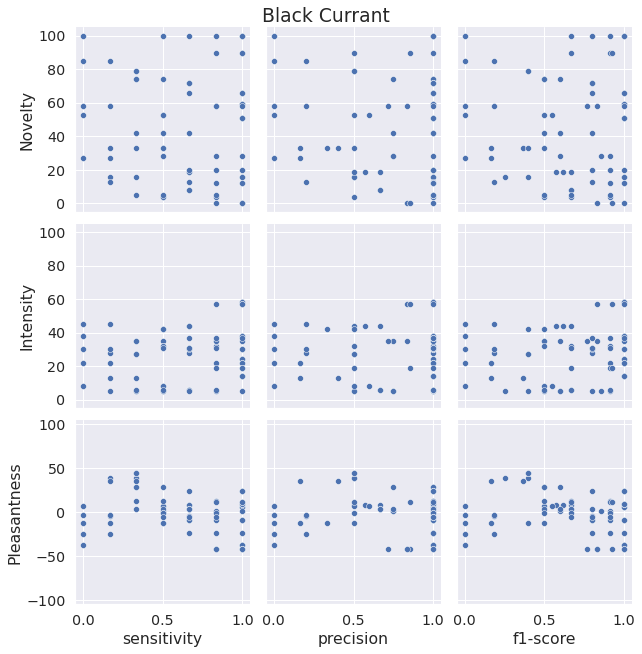

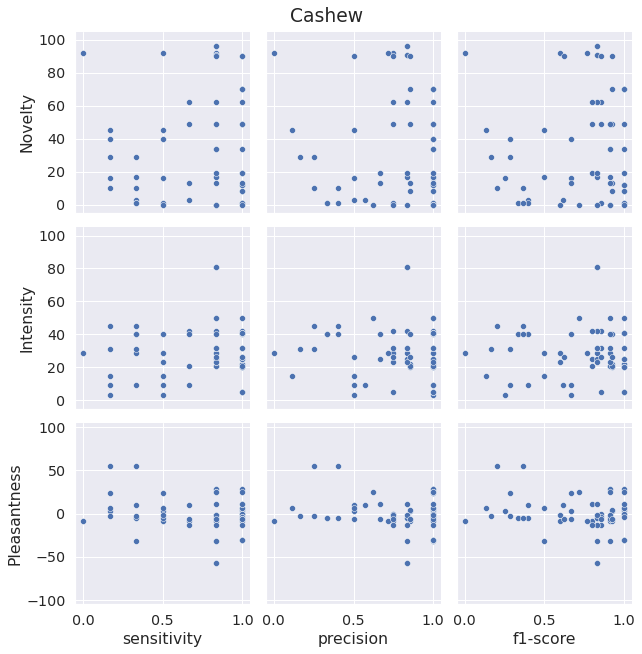

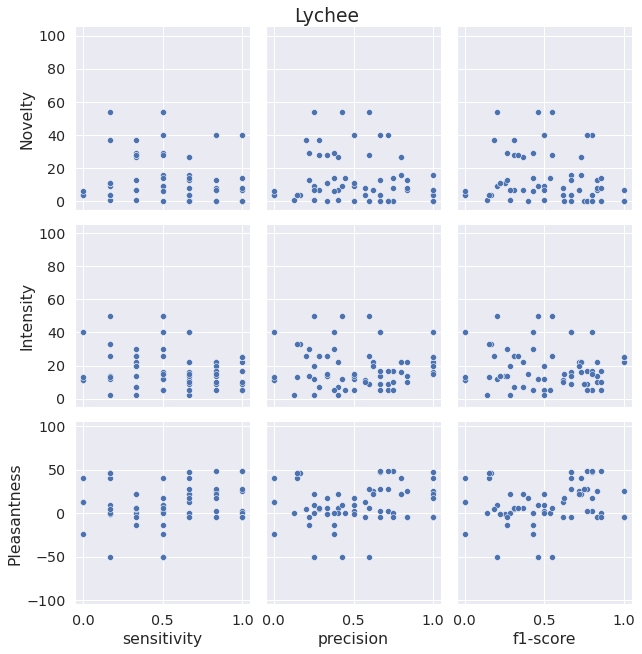

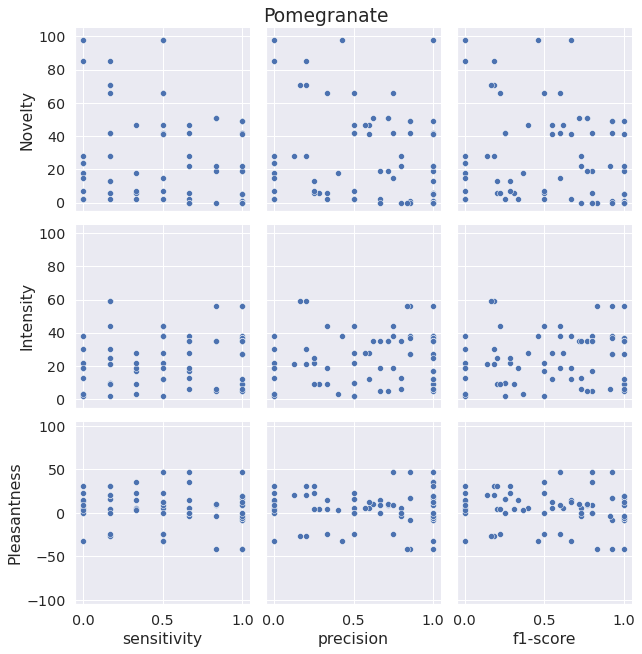

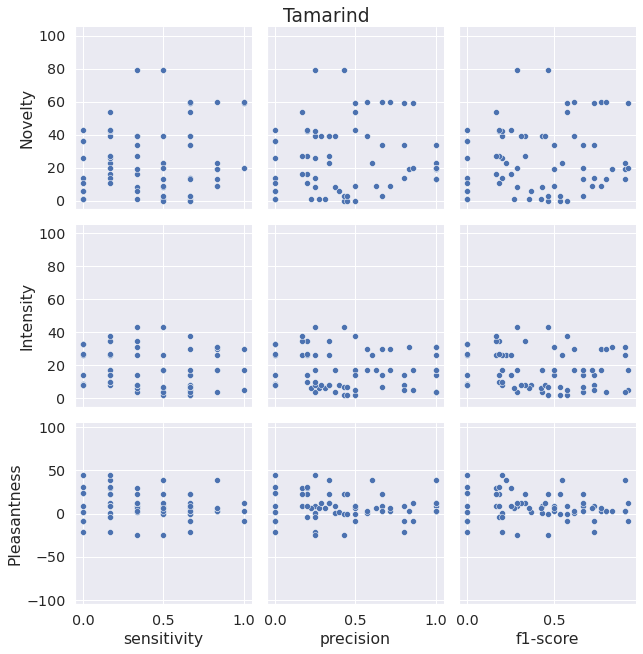

In [88]:
df = FlavorFractalAccuracy_df[FlavorFractalAccuracy_df['Flavor'] != 'Plain']
for flavor in df['Flavor'].unique():
  g = sns.pairplot(data = df[df['Flavor'] == flavor], x_vars = x_vars, y_vars = y_vars, height = 3) #, hue = 'Association test')
  for ax in g.axes[0,:]:
    ax.set_ylim((-5,105))
  for ax in g.axes[1,:]:
    ax.set_ylim((-5,105))
  for ax in g.axes[2,:]:
    ax.set_ylim((-105,105))
  g.fig.suptitle(flavor, va = 'bottom')

### Subject-level

In [100]:
df_

precision         Flavor  accuracy f1-score sensitivity Fractal  Order  \
0          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
1          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
2          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
3          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
4          NaN    Apple Cider  0.083333      NaN         NaN     NaN    NaN   
...        ...            ...       ...      ...         ...     ...    ...   
1771       NaN  Black Currant       NaN      NaN         NaN     NaN    NaN   
1772       NaN         Cashew       NaN      NaN         NaN     NaN    NaN   
1773       NaN         Lychee       NaN      NaN         NaN     NaN    NaN   
1774       NaN    Pomegranate       NaN      NaN         NaN     NaN    NaN   
1775       NaN       Tamarind       NaN      NaN         NaN     NaN    NaN   

     correct_responses specificity          experiment_id Association test  \
0                  NaN         NaN  FlavorFractal_pilot00           Test 1   
1                  NaN         NaN  FlavorFractal_pilot00           Test 1   
2                  NaN         NaN  FlavorFractal_pilot00           Test 1   
3                  NaN         NaN  FlavorFractal_pilot00           Test 1   
4                  NaN         NaN  FlavorFractal_pilot00           Test 2   
...                ...         ...                    ...              ...   
1771               NaN         NaN                    NaN              NaN   
1772               NaN         NaN                    NaN              NaN   
1773               NaN         NaN                    NaN              NaN   
1774               NaN         NaN                    NaN              NaN   
1775               NaN         NaN                    NaN              NaN   

      subject_id         scale  score  
0     ercffa_001     Intensity    6.0  
1     ercffa_001     Intensity    6.0  
2     ercffa_001     Intensity    6.0  
3     ercffa_001     Intensity    6.0  
4     ercffa_001     Intensity    6.0  
...          ...           ...    ...  
1771  ercffa_006  Pleasantness    0.0  
1772  ercffa_006  Pleasantness  -11.0  
1773  ercffa_006  Pleasantness   -3.0  
1774  ercffa_006  Pleasantness   -3.0  
1775  ercffa_006  Pleasantness    0.0  

[1776 rows x 14 columns]

In [102]:
FlavorFractalAccuracy_df

experiment_id  subject_id         Flavor  Intensity  Novelty  \
0    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
1    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
2    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
3    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
4    FlavorFractal_pilot00  ercffa_001    Apple Cider        6.0     19.0   
..                     ...         ...            ...        ...      ...   
611                    NaN  ercffa_006  Black Currant        2.0      0.0   
612                    NaN  ercffa_006         Cashew       12.0     18.0   
613                    NaN  ercffa_006         Lychee        2.0      8.0   
614                    NaN  ercffa_006    Pomegranate        7.0      2.0   
615                    NaN  ercffa_006       Tamarind        3.0      7.0   

     Pleasantness Association test Fractal  Order correct_responses  \
0            16.0           Test 1     NaN    NaN               NaN   
1            16.0           Test 1     NaN    NaN               NaN   
2            16.0           Test 1     NaN    NaN               NaN   
3            16.0           Test 1     NaN    NaN               NaN   
4            16.0           Test 2     NaN    NaN               NaN   
..            ...              ...     ...    ...               ...   
611           0.0              NaN     NaN    NaN               NaN   
612         -11.0              NaN     NaN    NaN               NaN   
613          -3.0              NaN     NaN    NaN               NaN   
614          -3.0              NaN     NaN    NaN               NaN   
615           0.0              NaN     NaN    NaN               NaN   

    sensitivity specificity precision f1-score  accuracy  
0           NaN         NaN       NaN      NaN  0.250000  
1           NaN         NaN       NaN      NaN  0.250000  
2           NaN         NaN       NaN      NaN  0.250000  
3           NaN         NaN       NaN      NaN  0.250000  
4           NaN         NaN       NaN      NaN  0.083333  
..          ...         ...       ...      ...       ...  
611         NaN         NaN       NaN      NaN       NaN  
612         NaN         NaN       NaN      NaN       NaN  
613         NaN         NaN       NaN      NaN       NaN  
614         NaN         NaN       NaN      NaN       NaN  
615         NaN         NaN       NaN      NaN       NaN  

[616 rows x 15 columns]

In [103]:
set(df_.columns) - set(scale_vars)

{'Association test',
 'Flavor',
 'Fractal',
 'Order',
 'accuracy',
 'correct_responses',
 'experiment_id',
 'f1-score',
 'precision',
 'scale',
 'score',
 'sensitivity',
 'specificity',
 'subject_id'}

In [106]:
df

precision         Flavor  accuracy  f1-score sensitivity Fractal  Order  \
400        1.0    Apple Cider  0.750000       1.0         1.0      VI    6.0   
401       0.75    Apple Cider  0.722222  0.857143         1.0      VI    6.0   
402   0.666667    Apple Cider  0.722222       0.8         1.0      VI    6.0   
403        1.0  Black Currant  0.750000       1.0         1.0       V    2.0   
404        1.0  Black Currant  0.722222       1.0         1.0       V    2.0   
...        ...            ...       ...       ...         ...     ...    ...   
1759       1.0    Pomegranate  0.666667       1.0         1.0       I    1.0   
1760       0.6    Pomegranate  0.555556  0.545455         0.5       I    1.0   
1761       0.0       Tamarind  0.500000       0.0         0.0      II    2.0   
1762       0.5       Tamarind  0.666667      0.25    0.166667      II    2.0   
1763       0.2       Tamarind  0.555556  0.181818    0.166667      II    2.0   

     correct_responses specificity          experiment_id Association test  \
400                  6         1.0  FlavorFractal_pilot02           Test 1   
401                  6    0.933333  FlavorFractal_pilot02           Test 2   
402                  6         0.9  FlavorFractal_pilot02           Test 3   
403                  6         1.0  FlavorFractal_pilot02           Test 1   
404                  6         1.0  FlavorFractal_pilot02           Test 2   
...                ...         ...                    ...              ...   
1759                 6         1.0  FlavorFractal_pilot02           Test 2   
1760                 3    0.933333  FlavorFractal_pilot02           Test 3   
1761                 0         0.8  FlavorFractal_pilot02           Test 1   
1762                 1    0.966667  FlavorFractal_pilot02           Test 2   
1763                 1    0.866667  FlavorFractal_pilot02           Test 3   

      subject_id         scale  score  
400   ercffa_023     Intensity   17.0  
401   ercffa_023     Intensity   17.0  
402   ercffa_023     Intensity   17.0  
403   ercffa_023     Intensity   58.0  
404   ercffa_023     Intensity   58.0  
...          ...           ...    ...  
1759  ercffa_033  Pleasantness   12.0  
1760  ercffa_033  Pleasantness   12.0  
1761  ercffa_033  Pleasantness    9.0  
1762  ercffa_033  Pleasantness    9.0  
1763  ercffa_033  Pleasantness    9.0  

[540 rows x 14 columns]

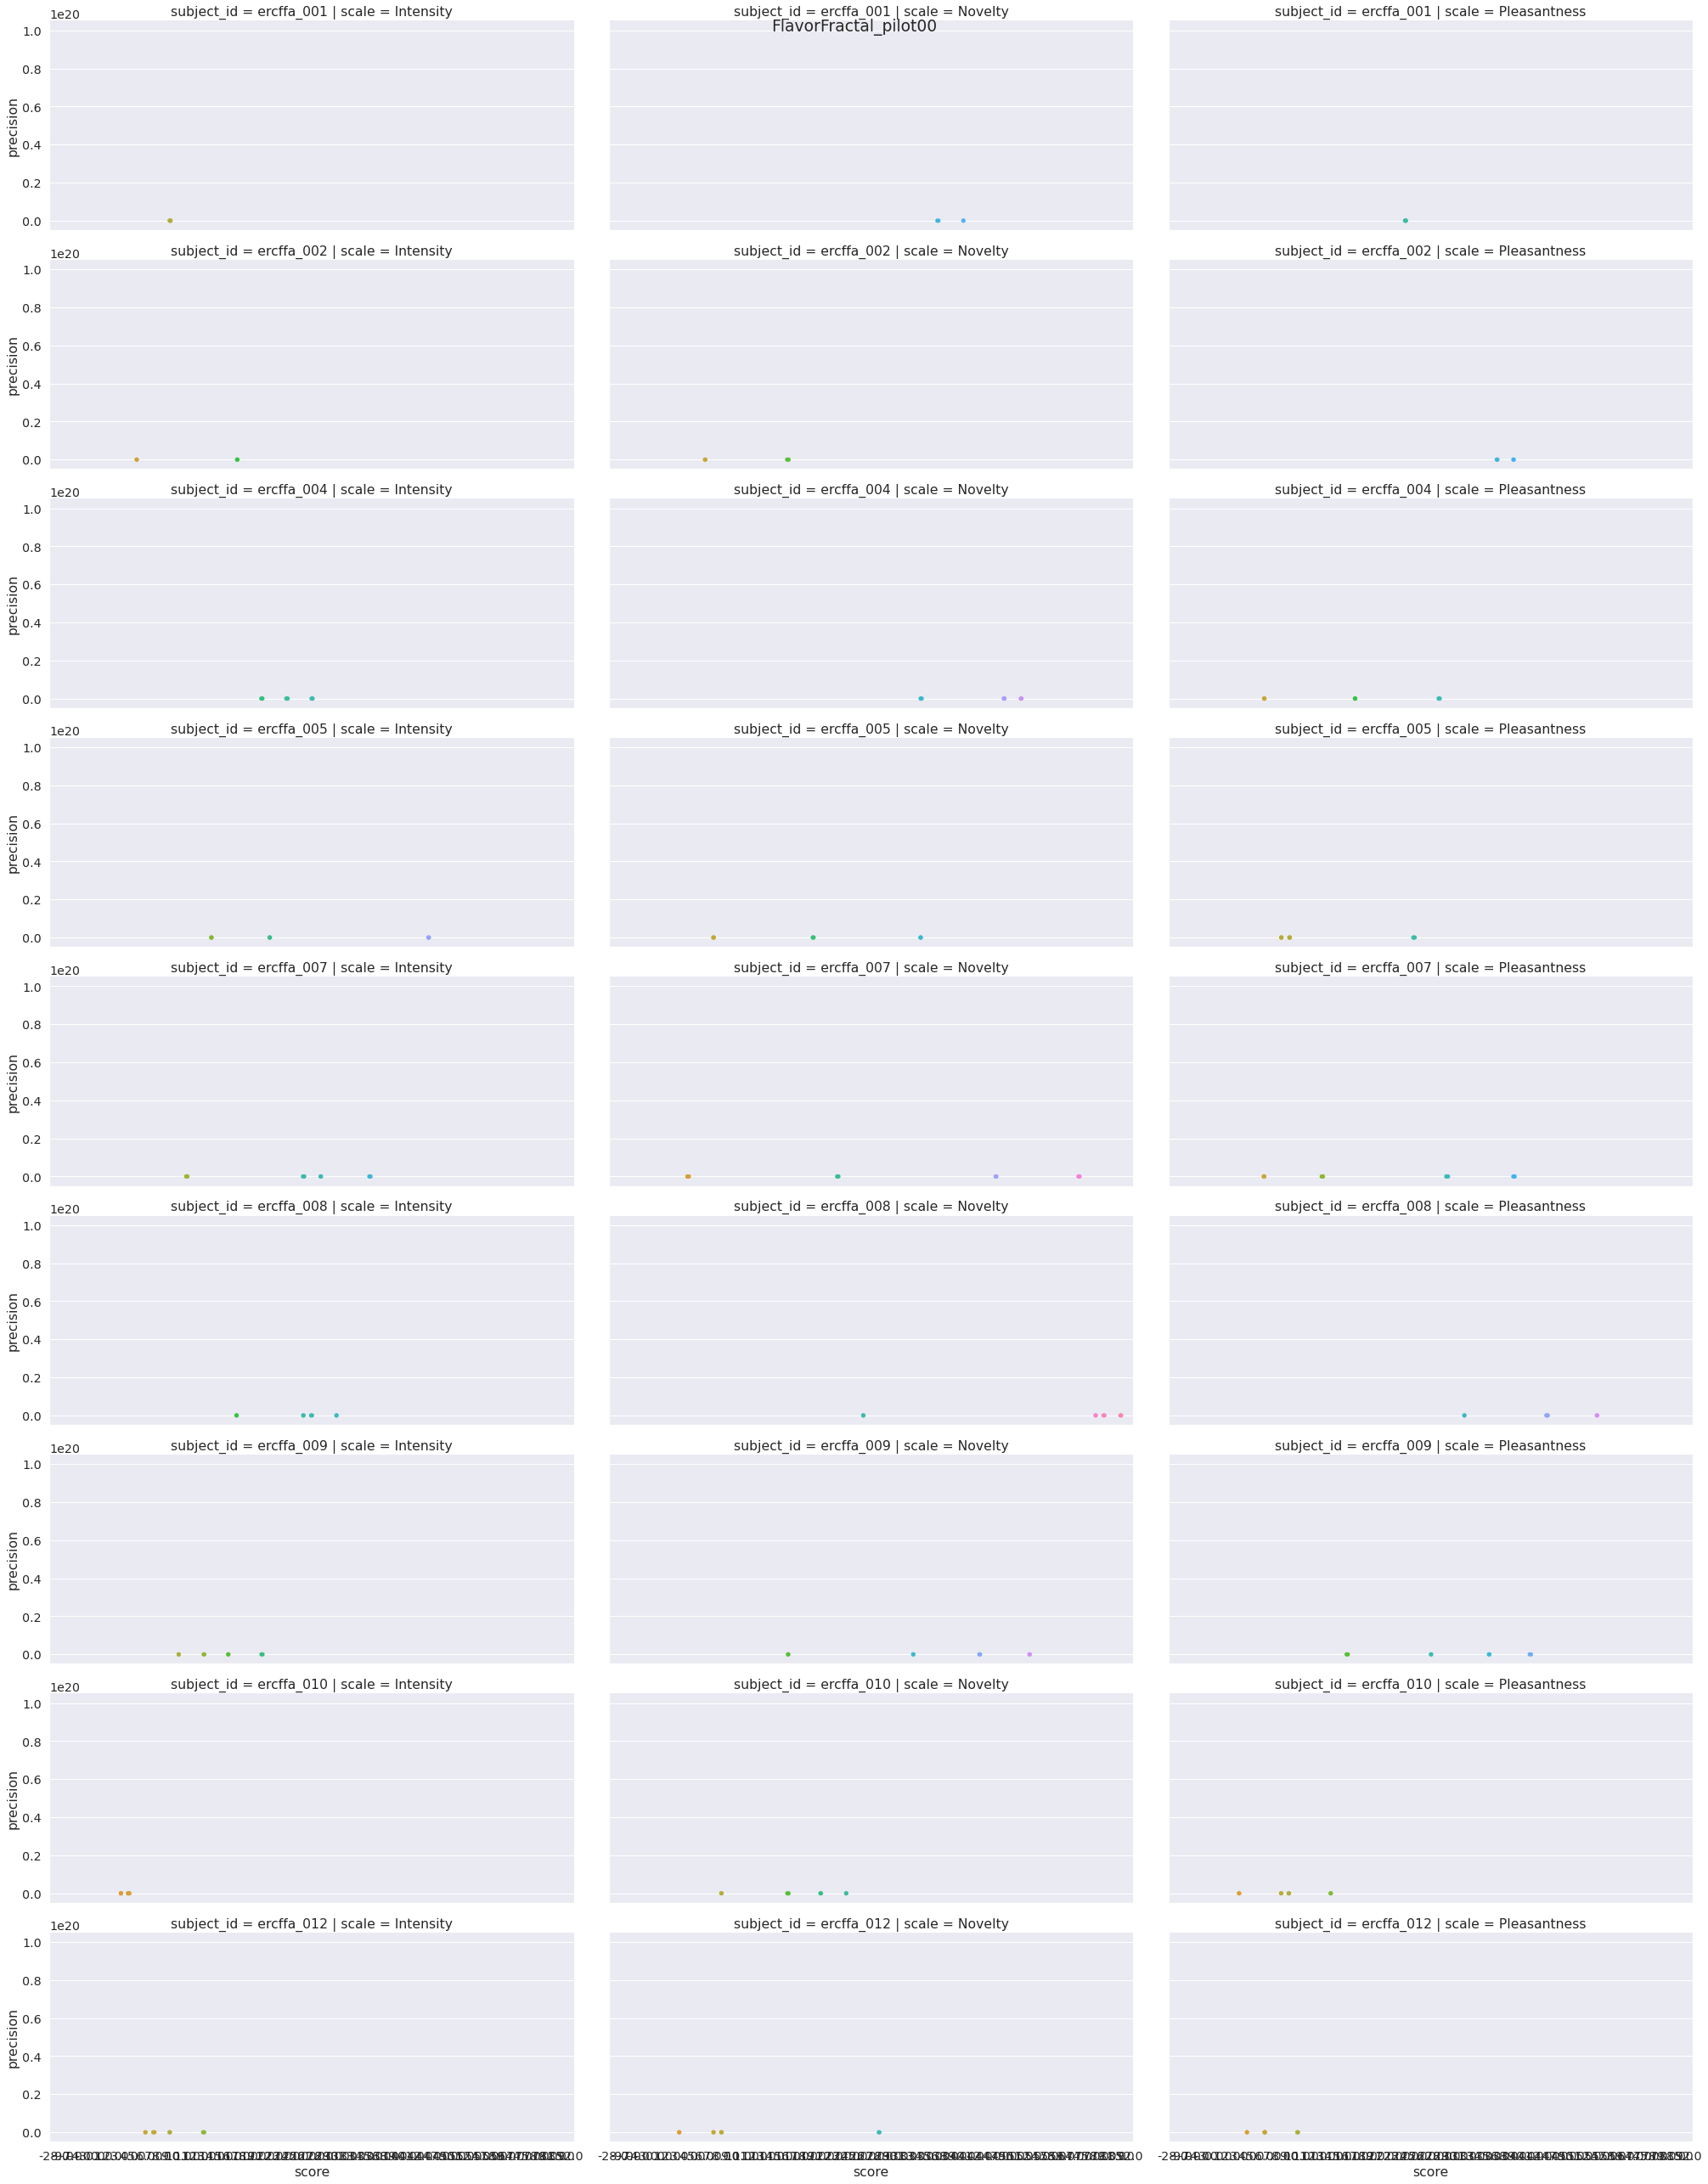

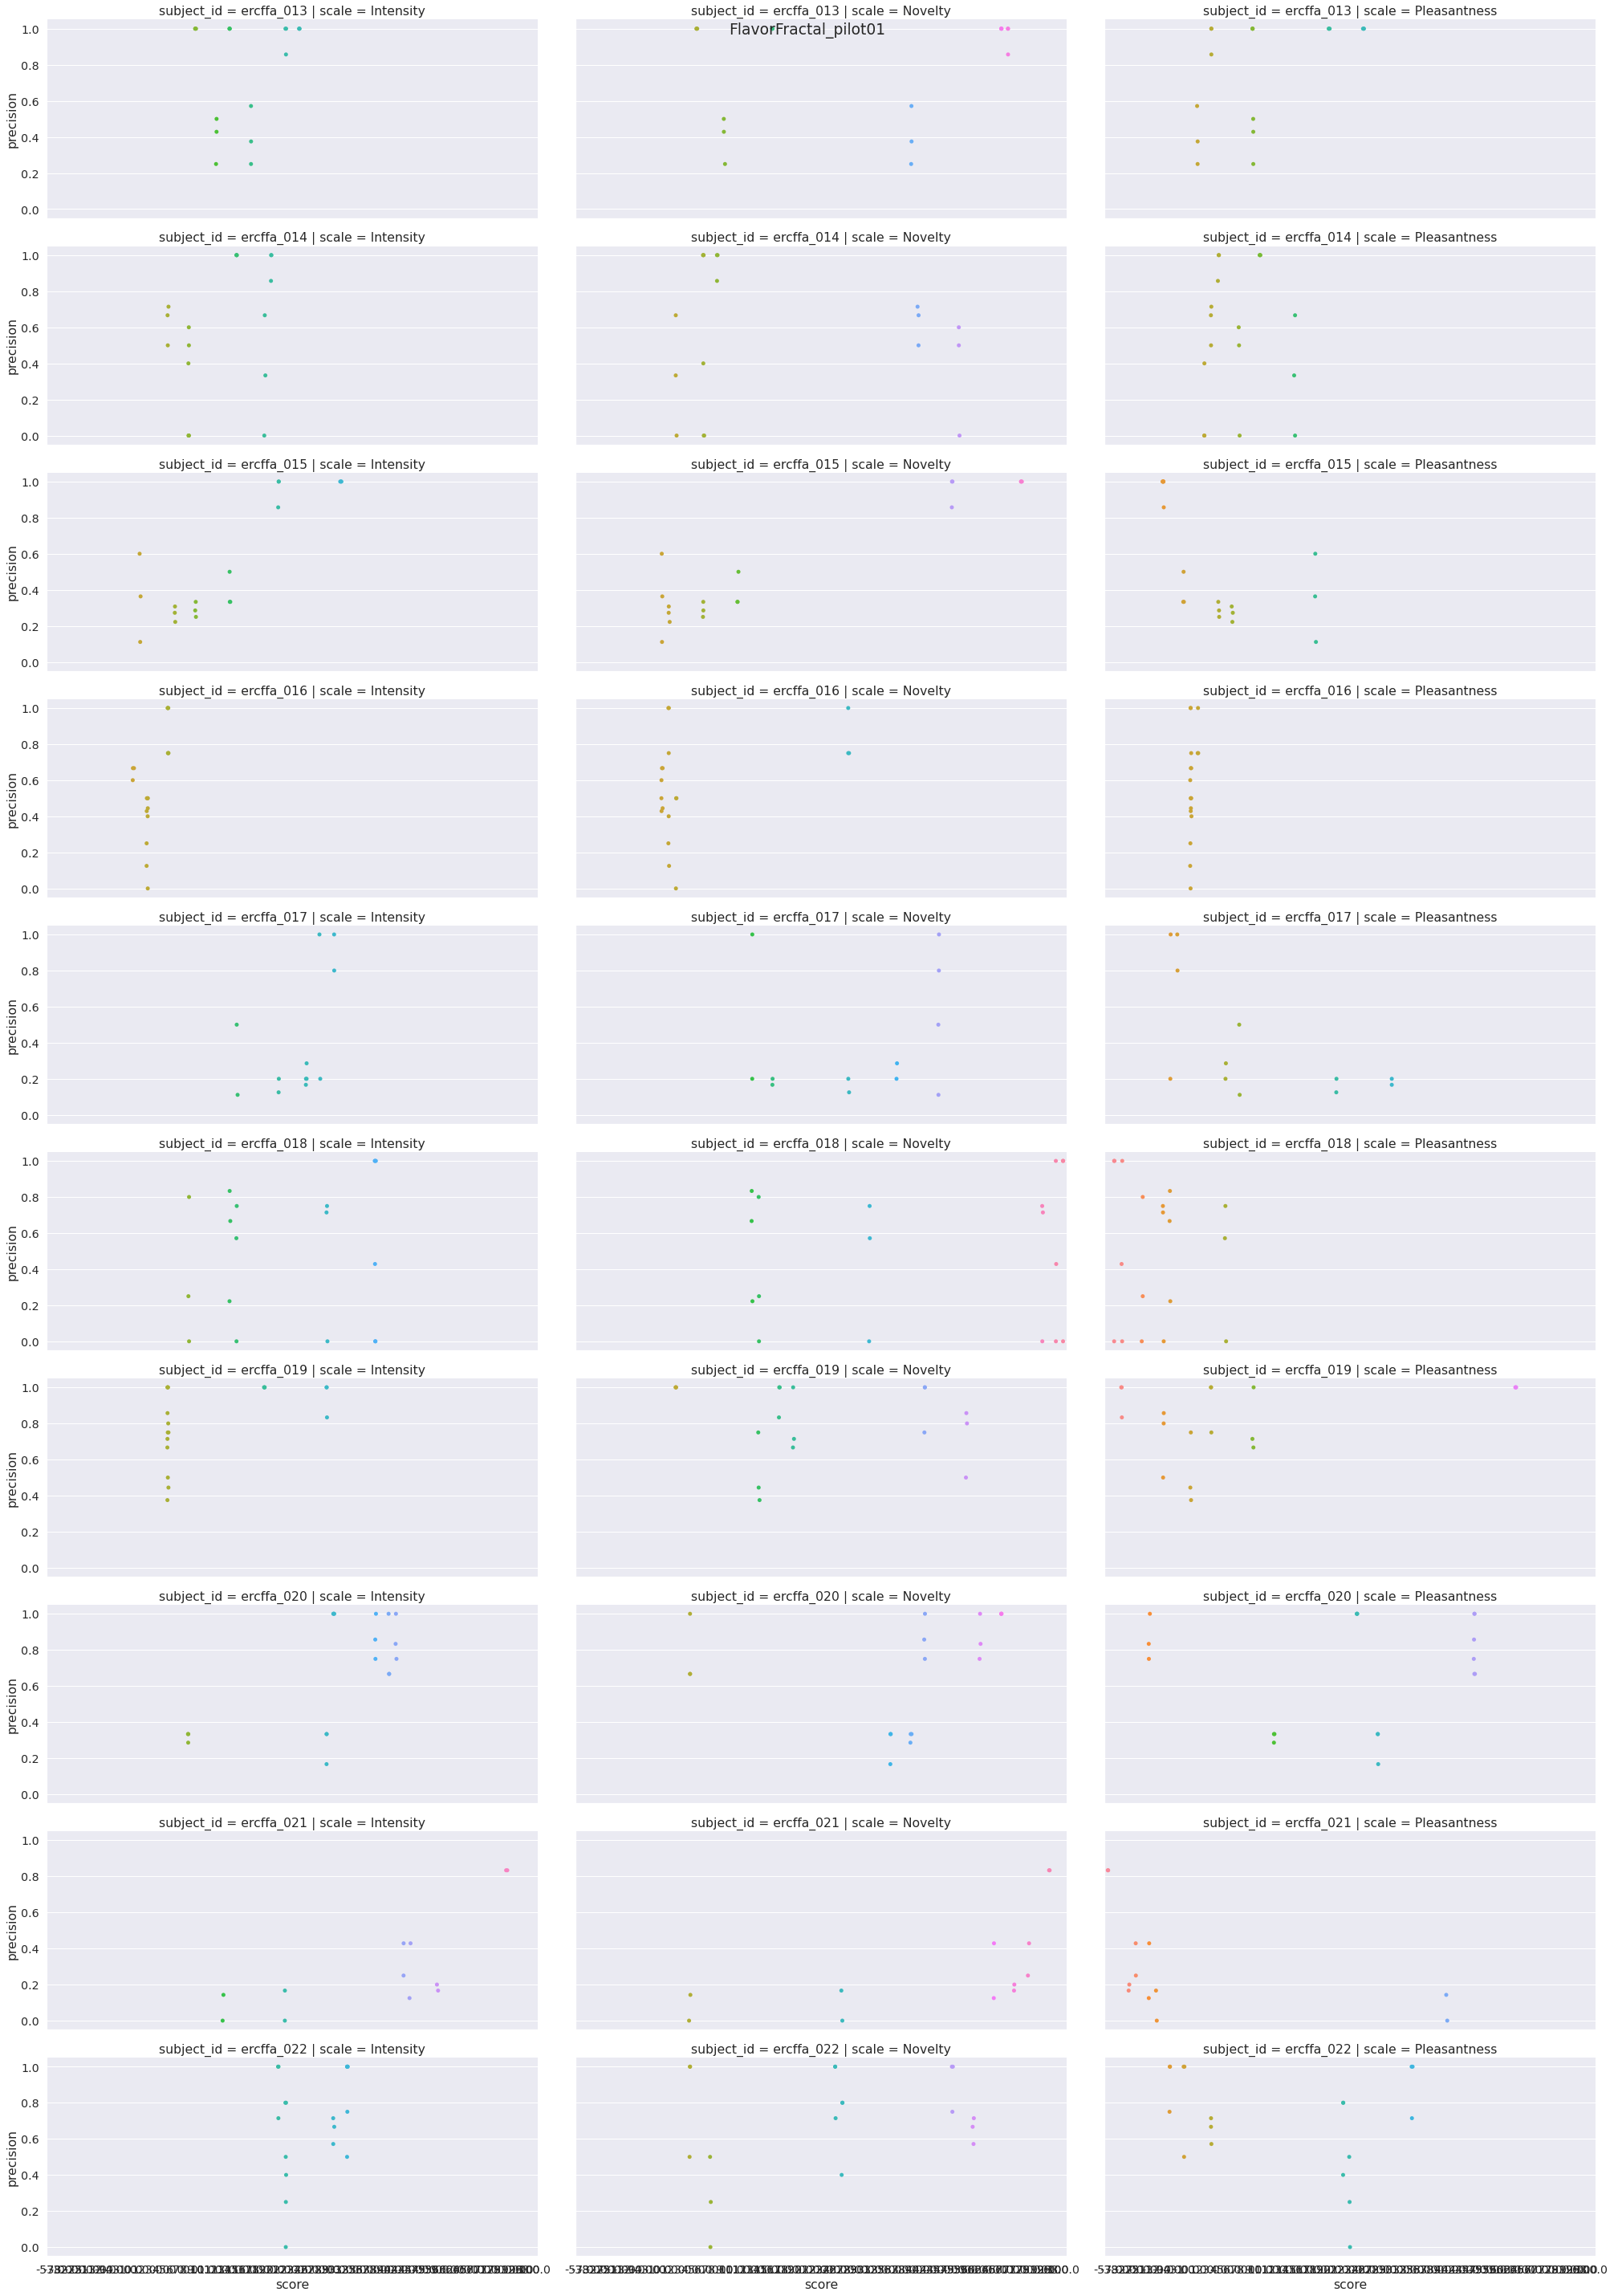

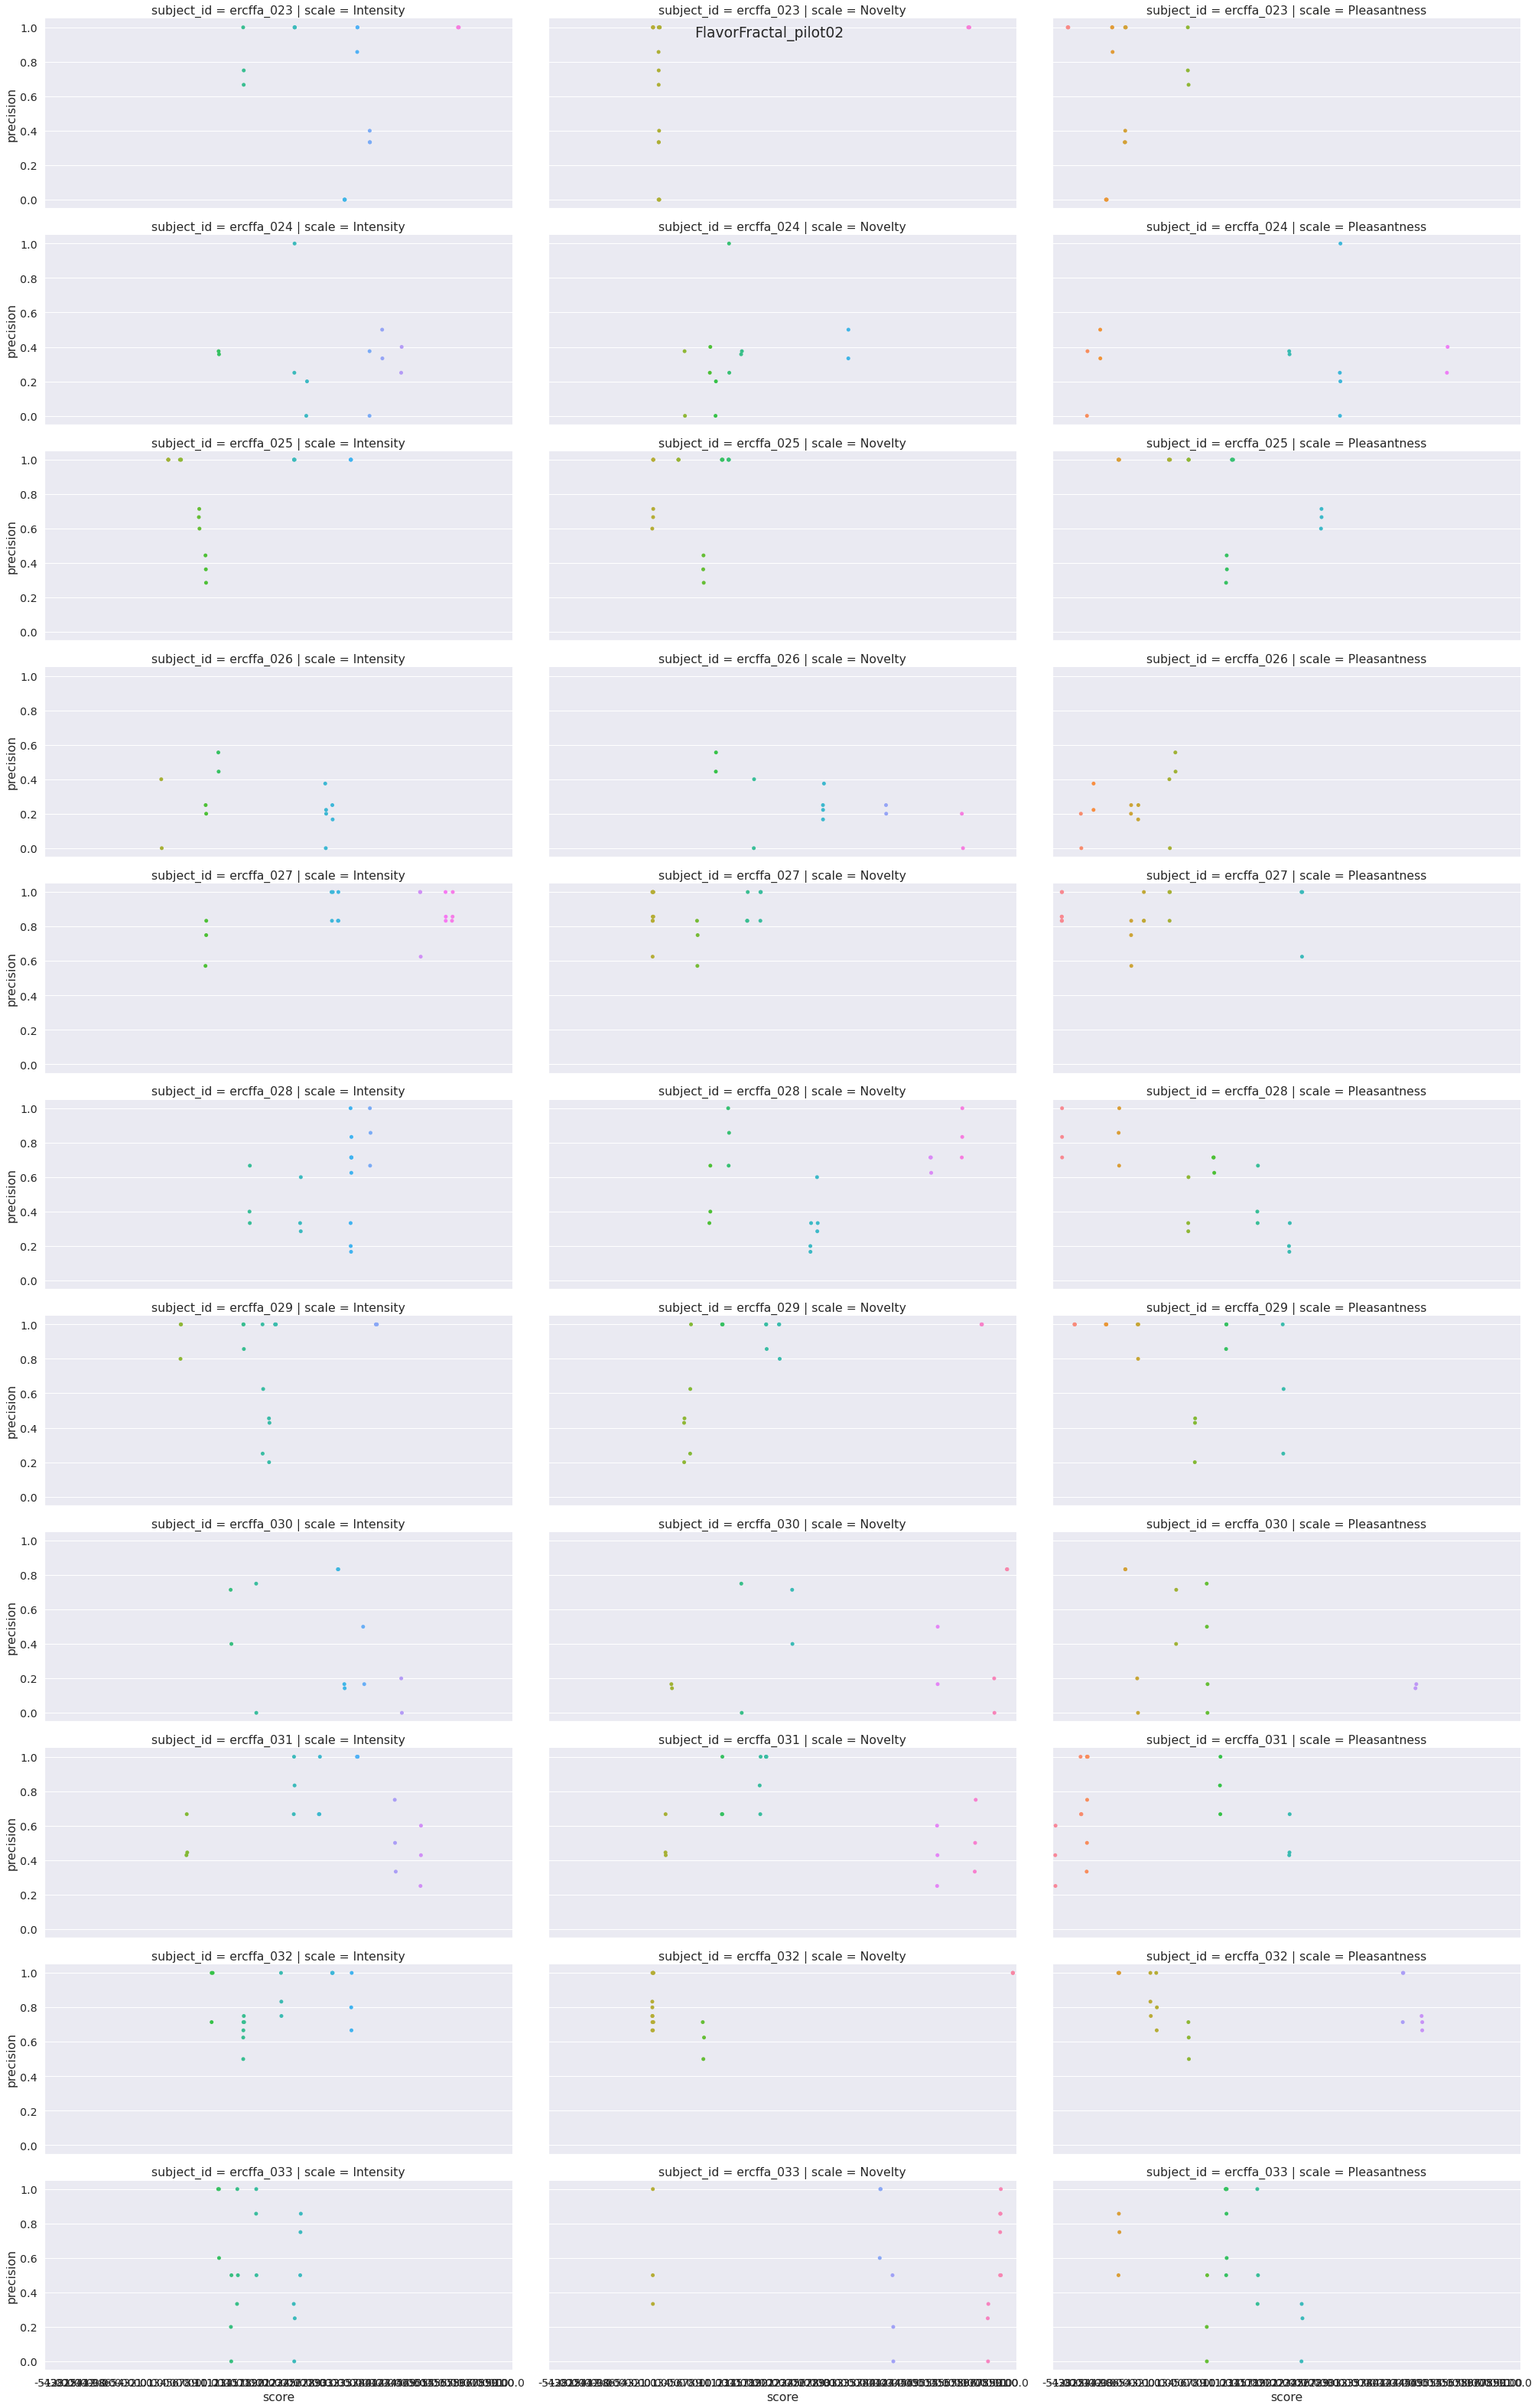

In [107]:
df_ = pd.melt(FlavorFractalAccuracy_df[FlavorFractalAccuracy_df['Flavor'] != 'Plain'], 
              id_vars=set(FlavorFractalAccuracy_df.columns) - set(scale_vars), var_name = 'scale', value_name = 'score')
for experiment_id in FlavorFractalAccuracy_df['experiment_id'].dropna().unique():
  df = df_[df_['experiment_id'] == experiment_id].drop_duplicates(subset=['subject_id', 'Flavor', 'Association test','scale'])
  g = sns.catplot(data = df, row = 'subject_id', col= 'scale', x='score', y = 'precision', height = 4, aspect = 2.35)
  g.fig.suptitle(experiment_id, va = 'bottom')
  plt.tight_layout()
  #g.fig.savefig('{}performanceBarplots_flavor_subjectLevel_{}.pdf'.format(figureFolder_path,experiment_id), bbox_inches='tight')

In [96]:
scale_vars = ['Intensity',	'Novelty',	'Pleasantness']
set(df_.columns) - set(scale_vars)

{'Association test',
 'Flavor',
 'Fractal',
 'Order',
 'accuracy',
 'correct_responses',
 'experiment_id',
 'f1-score',
 'precision',
 'sensitivity',
 'specificity',
 'subject_id'}

In [97]:
pd.melt(df_, id_vars=set(df_.columns) - set(scale_vars), var_name = 'scale', value_name = 'score')

precision         Flavor  accuracy f1-score sensitivity Fractal  Order  \
0          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
1          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
2          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
3          NaN    Apple Cider  0.250000      NaN         NaN     NaN    NaN   
4          NaN    Apple Cider  0.083333      NaN         NaN     NaN    NaN   
...        ...            ...       ...      ...         ...     ...    ...   
1771       NaN  Black Currant       NaN      NaN         NaN     NaN    NaN   
1772       NaN         Cashew       NaN      NaN         NaN     NaN    NaN   
1773       NaN         Lychee       NaN      NaN         NaN     NaN    NaN   
1774       NaN    Pomegranate       NaN      NaN         NaN     NaN    NaN   
1775       NaN       Tamarind       NaN      NaN         NaN     NaN    NaN   

     correct_responses specificity          experiment_id Association test  \
0                  NaN         NaN  FlavorFractal_pilot00           Test 1   
1                  NaN         NaN  FlavorFractal_pilot00           Test 1   
2                  NaN         NaN  FlavorFractal_pilot00           Test 1   
3                  NaN         NaN  FlavorFractal_pilot00           Test 1   
4                  NaN         NaN  FlavorFractal_pilot00           Test 2   
...                ...         ...                    ...              ...   
1771               NaN         NaN                    NaN              NaN   
1772               NaN         NaN                    NaN              NaN   
1773               NaN         NaN                    NaN              NaN   
1774               NaN         NaN                    NaN              NaN   
1775               NaN         NaN                    NaN              NaN   

      subject_id         scale  score  
0     ercffa_001     Intensity    6.0  
1     ercffa_001     Intensity    6.0  
2     ercffa_001     Intensity    6.0  
3     ercffa_001     Intensity    6.0  
4     ercffa_001     Intensity    6.0  
...          ...           ...    ...  
1771  ercffa_006  Pleasantness    0.0  
1772  ercffa_006  Pleasantness  -11.0  
1773  ercffa_006  Pleasantness   -3.0  
1774  ercffa_006  Pleasantness   -3.0  
1775  ercffa_006  Pleasantness    0.0  

[1776 rows x 14 columns]

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False};
sns.set_theme(style="whitegrid", rc=custom_params, palette = 'pastel');
sns.set(font_scale=1.3);

g = sns.FacetGrid(FlavorFractalAccuracy_Longdf, col="scale", col_order = ['Novelty', 'Intensity', 'Pleasantness'],
                  row = 'subject_id', sharey = False,sharex = False,  height = 3, aspect = 2);
g.map_dataframe(sns.scatterplot, x="correct_responses", y="score", hue = 'Flavor');

for ax in g.axes[:,0]:
  ax.set_ylim([-5,105]);
  ax.set_xlim([-0.30000000000000004, 6.3]);
for ax in g.axes[:,1]:
  ax.set_ylim([-5,105]);
  ax.set_xlim([-0.30000000000000004, 6.3]);
for ax in g.axes[:,2]:
  ax.set_ylim([-78,78]);
  ax.set_xlim([-0.30000000000000004, 6.3]);
  ax.axhline(0, ls = '--', c = 'black');
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))